#**CHURN PREDICTION**

# **DATASET CREATION**

In [ ]:
# Melakukan import library yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import gc
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set_theme(color_codes=True)

In [ ]:
!jupyter notebook --NotebookApp.iopub_data_rate_limit=5000000.0

|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/usr/local/etc/jupyter/jupyter_notebook_config.d/panel-client-jupyter.json
    	/usr/local/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/usr/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/root/.local/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/root/.jupyter/jupyter_notebook_config.json
|INFO|google.colab serverextension initialized.
|INFO|Serving notebooks from local directory: /content
|INFO|Jupyter Notebook 6.4.8 is running at:
|INFO|http://localhost:8888/?token=08f7c85c91e7edff55bdfcdb8522688eef011cafea77bc2f
|INFO| or http://127.0.0.1:8888/?token=08f7c85c91e7edff55bdfcdb8522688eef011cafea77bc2f
|INFO|Use Con

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.0 MB/s eta 0:00:00


In [ ]:
!gdown 1-v7TAgulgRWajU-CPnQSC1Di8N696xSw

Downloading...
From: https://drive.google.com/uc?id=1-v7TAgulgRWajU-CPnQSC1Di8N696xSw
To: /content/data_fixx_pake_banget.csv
100% 216M/216M [00:01<00:00, 116MB/s]


In [ ]:
data = pd.read_csv('data_fixx_pake_banget.csv')
data.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100004       0      Revolving loans           M            Y   
3      100006       0           Cash loans           F            N   
4      100007       0           Cash loans           M            N   
5      100008       0           Cash loans           M            N   
6      100009       0           Cash loans           F            Y   
7      100010       0           Cash loans           M            Y   
8      100011       0           Cash loans           F            N   
9      100012       0      Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               Y             0           67500.0      135000.0   
3               Y             0          135000.0      312682.5   
4               Y             0          121500.0      513000.0   
5               Y             0           99000.0      490495.5   
6               Y             1          171000.0     1560726.0   
7               Y             0          360000.0     1530000.0   
8               Y             0          112500.0     1019610.0   
9               Y             0          135000.0      405000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x      NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied               Working   
1        35698.5          1129500.0            Family         State servant   
2         6750.0           135000.0     Unaccompanied               Working   
3        29686.5           297000.0     Unaccompanied               Working   
4        21865.5           513000.0     Unaccompanied               Working   
5        27517.5           454500.0   Spouse, partner         State servant   
6        41301.0          1395000.0     Unaccompanied  Commercial associate   
7        42075.0          1530000.0     Unaccompanied         State servant   
8        33826.5           913500.0          Children             Pensioner   
9        20250.0           405000.0     Unaccompanied               Working   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   
6               Married  House / apartment                    0.035792   
7               Married  House / apartment                    0.003122   
8               Married  House / apartment                    0.018634   
9  Single / not married  House / apartment                    0.019689   

   DAYS_BIRTH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461        Laborers              1.0                     2   
1      -16765      Core staff              2.0                     1   
2      -19046        Laborers              1.0                     2   
3      -19005        Laborers              2.0                     2   
4      -19932      Core staff              1.0                     2   
5      -16941        Laborers              2.0                     2   
6      -13778     Accountants              3.0                     2   
7      -18850        Managers              2.0                     3   
8      -20099             NaN              2.0                     2   
9      -14469        Laborers              1.0                     2   

   RE

In [ ]:
data.shape

(307511, 136)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 136 entries, SK_ID_CURR to AMT_PAYMENT
dtypes: float64(79), int64(26), object(31)
memory usage: 319.1+ MB


In [ ]:
# Melakukan check missing value
check_missing = data.isnull().sum() * 100 / data.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

CNT_DRAWINGS_CURRENT            100.000000
AMT_RECIVABLE                   100.000000
AMT_DRAWINGS_ATM_CURRENT        100.000000
AMT_DRAWINGS_CURRENT            100.000000
AMT_DRAWINGS_OTHER_CURRENT      100.000000
AMT_DRAWINGS_POS_CURRENT        100.000000
AMT_PAYMENT_CURRENT             100.000000
AMT_PAYMENT_TOTAL_CURRENT       100.000000
AMT_RECEIVABLE_PRINCIPAL        100.000000
AMT_TOTAL_RECEIVABLE            100.000000
AMT_BALANCE                     100.000000
CNT_DRAWINGS_ATM_CURRENT        100.000000
CNT_DRAWINGS_OTHER_CURRENT      100.000000
CNT_DRAWINGS_POS_CURRENT        100.000000
CNT_INSTALMENT_MATURE_CUM       100.000000
NAME_CONTRACT_STATUS_y          100.000000
SK_DPD_y                        100.000000
SK_DPD_DEF_y                    100.000000
AMT_CREDIT_LIMIT_ACTUAL         100.000000
AMT_INST_MIN_REGULARITY         100.000000
RATE_INTEREST_PRIVILEGED         99.469938
RATE_INTEREST_PRIMARY            99.469938
AMT_CREDIT_MAX_OVERDUE           79.336024
MONTHS_BALA

In [ ]:
# # Melihat jumlah target yang churn dan tidak churn
# churn_count = data_train_fix['TARGET'].value_counts()
# print(churn_count)

In [ ]:
# # Mengatasi data imbalance
# from imblearn.under_sampling import RandomUnderSampler

# # Memisahkan fitur dan target
# X = data_train_fix.drop('TARGET', axis=1)
# y = data_train_fix['TARGET']

# # Menerapkan oversampling dengan SMOTE
# undersampler = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = undersampler.fit_resample(X, y)

# # Melihat jumlah sampel setelah oversampling
# print("Jumlah sampel setelah oversampling:")
# print(y_resampled.value_counts())


In [ ]:
# # Menggabungkan fitur dan target yang telah diundersample
# undersampled_df = pd.concat([X_resampled, y_resampled], axis=1)

# # Mengacak dataset yang telah diundersample
# data_train_final = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# # Menampilkan dataset setelah undersampling
# print("Dataset setelah undersampling:")
# data_train_final.head(50)


In [ ]:
# # Melihat jumlah target yang churn dan tidak churn
# churn_count = data_train_final['TARGET'].value_counts()
# print(churn_count)

In [ ]:
 data["SK_ID_BUREAU"].nunique()

263491

## **Application Train & Test**

Application_{train|test}.csv adalah tabel utama, dipecah menjadi dua dataset untuk Latih (dengan TARGET) dan Uji (tanpa TARGET).Dan merupakan data statis untuk semua aplikasi. Satu baris mewakili satu pinjaman dalam sampel data pada home credit.

In [ ]:
!gdown 1vL-IXNrdte05zhtE9qU1Pxp9jm41oNH2

Downloading...
From: https://drive.google.com/uc?id=1vL-IXNrdte05zhtE9qU1Pxp9jm41oNH2
To: /content/application_train.csv
100% 166M/166M [00:00<00:00, 213MB/s]


### Exploratory Data Analysis

In [ ]:
data_train = pd.read_csv('application_train.csv')
# membaca data application_train
print("Jumlah baris : ",data_train.shape[0])
print("Jumlah kolom : ",data_train.shape[1])
data_train.head()

Jumlah baris :  307511
Jumlah kolom :  122


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

<Axes: xlabel='TARGET', ylabel='count'>

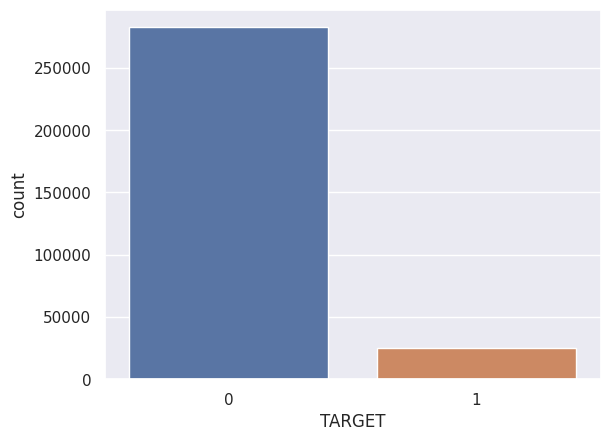

In [ ]:
sns.countplot(data=data_train, x="TARGET")

**Keterangan :**

1 = churn

0 = Tidak churn

 **Insight**

Orang yang tidak churn jauh lebih banyak dibandingkan orang yang churn.

<Axes: xlabel='TARGET', ylabel='count'>

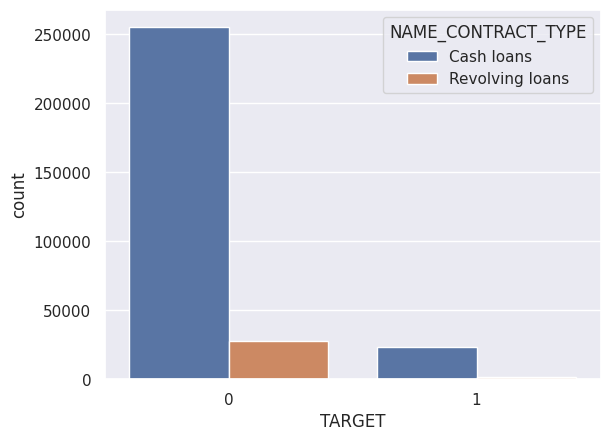

In [ ]:
sns.countplot(data=data_train, x="TARGET", hue="NAME_CONTRACT_TYPE")

**Insight**

- Orang yang tidak churn kebanyakan mempunyai pinjaman cash dari pada pinjaman kredit
- Orang yang churn hanya melakukan pinjaman cash

<Axes: xlabel='TARGET', ylabel='count'>

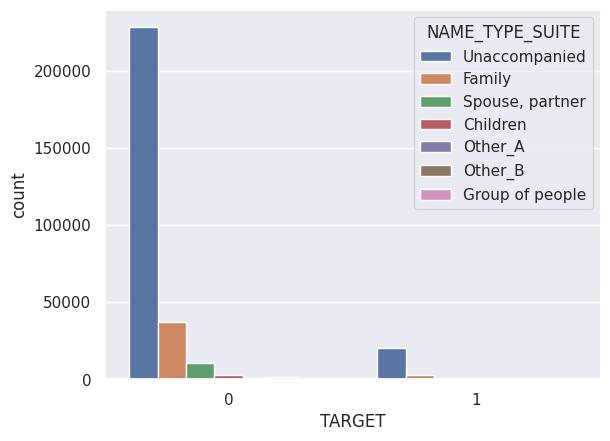

In [ ]:
sns.countplot(data=data_train, x="TARGET", hue="NAME_TYPE_SUITE")

<Axes: xlabel='TARGET', ylabel='EXT_SOURCE_2'>

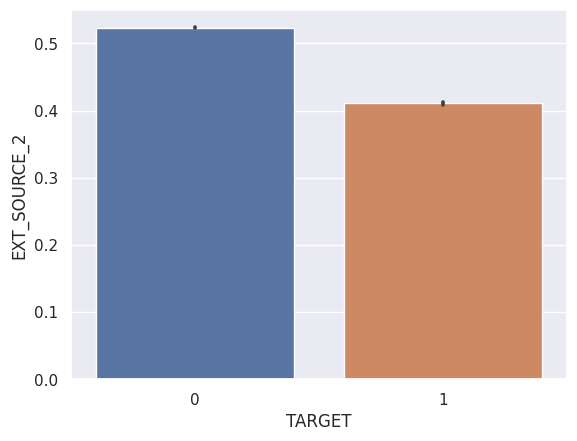

In [ ]:
sns.barplot(data=data_train, x="TARGET", y="EXT_SOURCE_2")

<Axes: xlabel='TARGET', ylabel='EXT_SOURCE_3'>

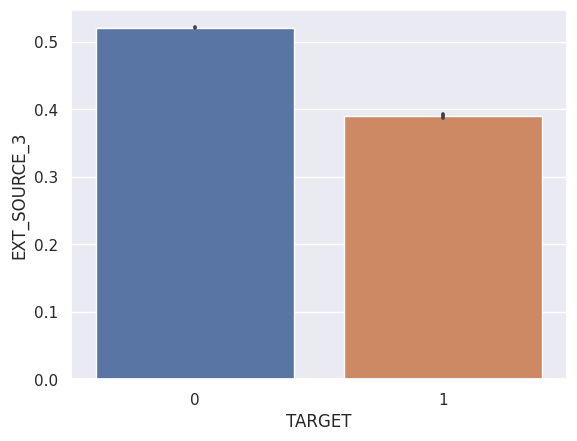

In [ ]:
sns.barplot(data=data_train, x="TARGET", y="EXT_SOURCE_3")

In [ ]:
sns.barplot(data=data_train, x="TARGET", y="DAYS_BIRTH")

In [ ]:
sns.barplot(data=data_train, x="TARGET", y="DAYS_EMPLOYED")

In [ ]:
sns.barplot(data=data_train, x="TARGET", y="AMT_CREDIT")

In [ ]:
sns.barplot(data=data_train, x="TARGET", y="DAYS_ID_PUBLISH")

In [ ]:
sns.barplot(data=data_train, x="TARGET", y="DAYS_LAST_PHONE_CHANGE")

### Data Cleansing and Preparation

In [ ]:
data_train.info()

### Missing Value Checking

In [ ]:
# Melakukan check missing value
check_missing = data_train.isnull().sum() * 100 / data_train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

### Feature Engineering

Remove Attributes that have missing Value more than 40%

In [ ]:
# Melakukan penghapusan fitur yang missing value > 40%
cols_to_drop = [
'OWN_CAR_AGE',
'APARTMENTS_AVG',
'BASEMENTAREA_AVG',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG',
'COMMONAREA_AVG',
'ELEVATORS_AVG',
'ENTRANCES_AVG',
'FLOORSMAX_AVG',
'FLOORSMIN_AVG',
'LANDAREA_AVG',
'LIVINGAPARTMENTS_AVG',
'LIVINGAREA_AVG',
'NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAREA_AVG',
'APARTMENTS_MODE',
'BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_MODE',
'ELEVATORS_MODE',
'FLOORSMAX_MODE',
'FLOORSMIN_MODE',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_MODE',
'APARTMENTS_MEDI',
'BASEMENTAREA_MEDI',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BUILD_MEDI',
'COMMONAREA_MEDI',
'ELEVATORS_MEDI',
'ENTRANCES_MEDI',
'FLOORSMAX_MEDI',
'FLOORSMIN_MEDI',
'LANDAREA_MEDI',
'LIVINGAPARTMENTS_MEDI',
'NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAREA_MEDI',
'FONDKAPREMONT_MODE',
'HOUSETYPE_MODE',
'TOTALAREA_MODE',
'WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE']

In [ ]:
data_train.drop(columns=cols_to_drop, inplace=True)
data_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

In [ ]:
data_train.shape

**Melakukan EDA Bisnis**

Berdasarkan EDA bisnis yang dilakukan, ada beberapa fitur yang tidak mempengaruhi hasil penerimaan atau penolakan dari pengajuan kredit di home kredit.

In [ ]:
drop_by_eda_bisnis = [
'DAYS_EMPLOYED',
'DAYS_REGISTRATION',
'DAYS_ID_PUBLISH',
'FLAG_MOBIL',
'FLAG_EMP_PHONE',
'FLAG_WORK_PHONE',
'FLAG_CONT_MOBILE',
'FLAG_PHONE',
'FLAG_EMAIL',
'HOUR_APPR_PROCESS_START',
'REG_REGION_NOT_LIVE_REGION',
'REG_REGION_NOT_WORK_REGION',
'LIVE_REGION_NOT_WORK_REGION',
'REG_CITY_NOT_LIVE_CITY',
'REG_CITY_NOT_WORK_CITY',
'LIVE_CITY_NOT_WORK_CITY',
'ORGANIZATION_TYPE',
'COMMONAREA_MODE',
'ENTRANCES_MODE',
'LIVINGAREA_MEDI',
'DAYS_LAST_PHONE_CHANGE',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR'
]

In [ ]:
data_train.drop(columns=drop_by_eda_bisnis, inplace=True)
data_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                    0.018801       -9461        Laborers              1.0   
1                    0.003541      -16765      Core staff              2.0   
2                    0.010032      -19046        Laborers              1.0   
3                    0.008019      -19005        Laborers              2.0   
4                    0.028663      -19932      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
0                  WEDNESDAY      0.083037      0.262949      0.139376   
1                     MONDAY      0.311267      0.622246           NaN   
2                     MONDAY           NaN      0.555912      0.729567   
3                  WEDNESDAY           NaN      0.650442           NaN   
4                   THURSDAY           NaN      0.322738           NaN   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_2  \
0                       2.0                       2.0                0   
1                       1.0                       0.0                0   
2                       0.0                       0.0                0   
3                       2.0                       0.0                0   
4                       0.0                       0.0                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0               

In [ ]:
data_train.columns

In [ ]:
data_train.shape

In [ ]:
# # Solusi mencari fitur yang sama pada dataset
# hapus = []
# for i in data :
#   if i in cols_to_drop :
#     hapus.append(i)

# for j in hapus :
#   print(j)


In [ ]:
# Melakukan cek missing value kembali
check_missing = data_train.isnull().sum() * 100 / data_train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

EXT_SOURCE_1                56.381073
OCCUPATION_TYPE             31.345545
EXT_SOURCE_3                19.825307
NAME_TYPE_SUITE              0.420148
OBS_30_CNT_SOCIAL_CIRCLE     0.332021
DEF_30_CNT_SOCIAL_CIRCLE     0.332021
OBS_60_CNT_SOCIAL_CIRCLE     0.332021
DEF_60_CNT_SOCIAL_CIRCLE     0.332021
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
dtype: float64

In [ ]:
# Melakukan handle missing value
data_train['EXT_SOURCE_1'].fillna(data_train['EXT_SOURCE_1'].mean(), inplace=True)
data_train['OCCUPATION_TYPE'].fillna('Data Not Available', inplace=True)
data_train['EXT_SOURCE_3'].fillna(data_train['EXT_SOURCE_3'].mean(), inplace=True)
data_train['NAME_TYPE_SUITE'].fillna('Data Not Available', inplace=True)
data_train['EXT_SOURCE_2'].fillna(data_train['EXT_SOURCE_2'].mean(), inplace=True)
data_train['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(data_train['OBS_30_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
data_train['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(data_train['DEF_30_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
data_train['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(data_train['OBS_60_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
data_train['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(data_train['DEF_60_CNT_SOCIAL_CIRCLE'].mean(), inplace=True)
data_train['AMT_GOODS_PRICE'].fillna(data_train['AMT_GOODS_PRICE'].mean(), inplace=True)
data_train['AMT_ANNUITY'].fillna(data_train['AMT_ANNUITY'].mean(), inplace=True)
data_train['CNT_FAM_MEMBERS'].fillna(0, inplace=True)


In [ ]:
# Melakukan cek missing value kembali
check_missing = data_train.isnull().sum() * 100 / data_train.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

**EDA Bisnis**

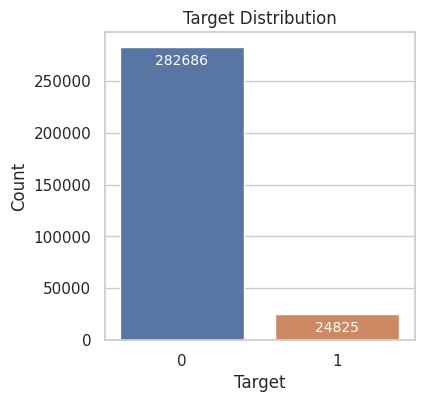

In [ ]:
# Menampilkan jumlah data per target class
sns.set_style('whitegrid')
fig = plt.figure(figsize = (4,4))
ax = sns.countplot(x=data_train['TARGET'])
ax.set(title="Target Distribution",
       xlabel="Target", ylabel="Count")

# add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='white', xytext=(0, -10),
                textcoords='offset points')

* Persebaran data pada application_train sangat imbalance antara kelas 0 dan 1

In [ ]:
# jumlah nasabah keseluruhan
print("Jumlah nasabah Home Credit: ", data_train['SK_ID_CURR'].nunique())

Jumlah nasabah Home Credit:  307511


In [ ]:
# fungsi untuk menghitung umur dari kolom DAYS_BIRTH
def usia(DAYS_BIRTH):
  age = DAYS_BIRTH / (-365)
  return round(age)

# mencari lokasi kolom DAYS_BIRTH
DAYS_BIRTH_loc = data_train.columns.get_loc(key='DAYS_BIRTH')

# menyisipkan kolom AGE setelah kolom DAYS_BIRTH
data_train.insert(
    DAYS_BIRTH_loc+1,
    "AGE",
    data_train['DAYS_BIRTH'].apply(usia)
)

data_train.head()[['DAYS_BIRTH','AGE']]

DAYS_BIRTH  AGE
0       -9461   26
1      -16765   46
2      -19046   52
3      -19005   52
4      -19932   55

In [ ]:
# mengkategorikan umur
def age_cat(age):
    if (age <= 10):
        return "Post Gen Z"
    elif (age >= 11 and age <= 26):
        return "Gen Z"
    elif (age >= 27 and age <= 42):
        return "Millenial"
    elif (age >= 43 and age <= 58):
        return "Gen X"
    elif (age >= 59 and age <= 77):
        return "Baby Boomer"
    elif (age >= 78):
        return "Pre-Boomer"

# mencari lokasi kolom age
age_loc = data_train.columns.get_loc(key='AGE')

# menyisipkan kolom kategori umur setelah kolom age
data_train.insert(
    age_loc+1,
    'AGE_CATEGORY',
    data_train['AGE'].apply(age_cat)
)

In [ ]:
num_age_cat = data_train.groupby(['AGE_CATEGORY']).count()[['TARGET']].rename(columns={'TARGET':'COUNTS'}).reset_index()
num_age_cat.sort_values(by=['COUNTS'],ascending=False)

AGE_CATEGORY  COUNTS
3    Millenial  129865
1        Gen X  113570
0  Baby Boomer   45499
2        Gen Z   18577

* Generasi millenial menjadi peminjam kredit terbanyak dibandingkan dengan generasi yang lain.

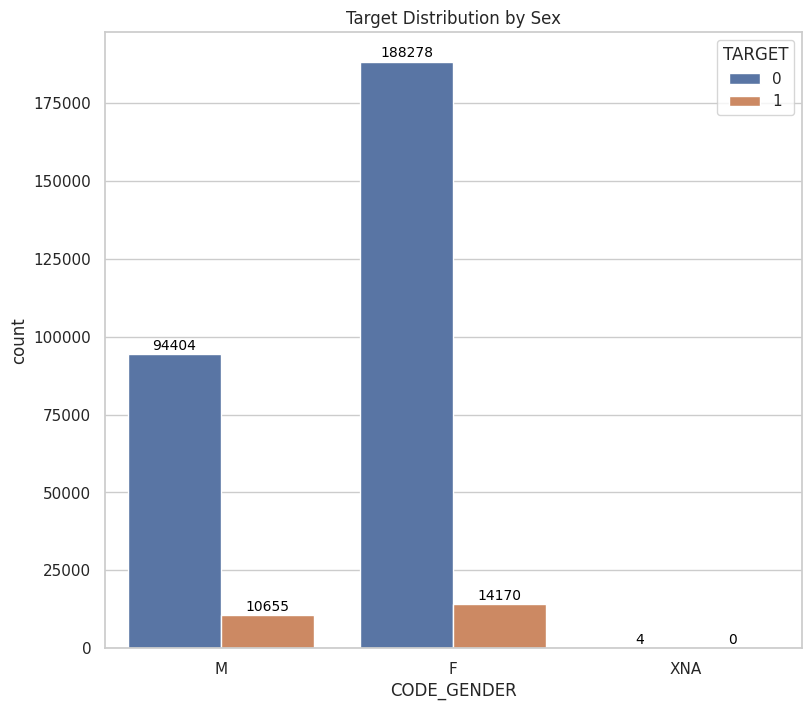

In [ ]:
# jumlah customer berdasarkan jenis kelamin
fig = plt.figure(figsize = (9,8))
ax = sns.countplot(x=data_train['CODE_GENDER'], hue='TARGET', data=data_train)
ax.set(title="Target Distribution by Sex")

# add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')

* Customer perempuan lebih banyak melakukan pinjaman kredit dibandingkan laki-laki

In [ ]:
# distribusi target berdasarkan pekerjaan
target_map = {0: 'Mampu Bayar', 1:'Sulit Bayar'}
data_train['TARGET_LABEL'] = data_train['TARGET'].map(target_map)

dist_occup = data_train.groupby(['TARGET_LABEL','OCCUPATION_TYPE'])[['TARGET']].count().sort_values(['TARGET_LABEL','TARGET'],ascending=[False,False])
dist_occup

TARGET
TARGET_LABEL OCCUPATION_TYPE              
Sulit Bayar  Data Not Available       6278
             Laborers                 5838
             Sales staff              3092
             Drivers                  2107
             Core staff               1738
             Managers                 1328
             Security staff            722
             High skill tech staff     701
             Cooking staff             621
             Medicine staff            572
             Accountants               474
             Cleaning staff            447
             Low-skill Laborers        359
             Private service staff     175
             Waiters/barmen staff      152
             Secretaries                92
             Realty agents              59
             HR staff                   36
             IT staff                   34
Mampu Bayar  Data Not Available      90113
             Laborers                49348
             Sales staff             29010
             Core staff              25832
             Managers                20043
             Drivers                 16496
             High skill tech staff   10679
             Accountants              9339
             Medicine staff           7965
             Security staff           5999
             Cooking staff            5325
             Cleaning staff           4206
             Private service staff    2477
             Low-skill Laborers       1734
             Secretaries              1213
             Waiters/barmen staff     1196
             Realty agents             692
             HR staff                  527
             IT staff                  492

* Nasabah dengan pekerjaan Laborers, Sales Staff, dan Drivers merupakan 3 pekerjaan dengan kesulitan bayar paling tinggi

In [ ]:
# distribusi jumlah tanggungan
cnt_child = data_train.groupby(['CNT_CHILDREN']).count()[['TARGET']].rename(columns={'TARGET':'COUNTS'}).reset_index()
cnt_child.sort_values(by=['COUNTS'],ascending=False)
cnt_child

CNT_CHILDREN  COUNTS
0              0  215371
1              1   61119
2              2   26749
3              3    3717
4              4     429
5              5      84
6              6      21
7              7       7
8              8       2
9              9       2
10            10       2
11            11       1
12            12       2
13            14       3
14            19       2

In [ ]:
# mengkategorikan jumlah anak
def num_child(child):
  if (child == 0):
    return "Tanggunan 0"
  if (child == 1):
      return "Tanggunan 1"
  if (child == 2):
      return "Tanggunan 2"
  elif (child >2):
      return "Tanggungan > 2"

# mencari lokasi kolom child
child_loc = data_train.columns.get_loc(key='CNT_CHILDREN')

# menyisipkan kolom kategori umur setelah kolom age
data_train.insert(
    child_loc+1,
    'NUM_CHILD_CATEGORY',
    data_train['CNT_CHILDREN'].apply(num_child)
)

In [ ]:
child_cat = data_train.groupby(['NUM_CHILD_CATEGORY'])[['TARGET']].count().sort_values(['TARGET'],ascending=[False])
child_cat

TARGET
NUM_CHILD_CATEGORY        
Tanggunan 0         215371
Tanggunan 1          61119
Tanggunan 2          26749
Tanggungan > 2        4272

- Nasabah yang memiliki anak kurang dari sama dengan 2 cenderung lebih banyak mengajukan pinjaman

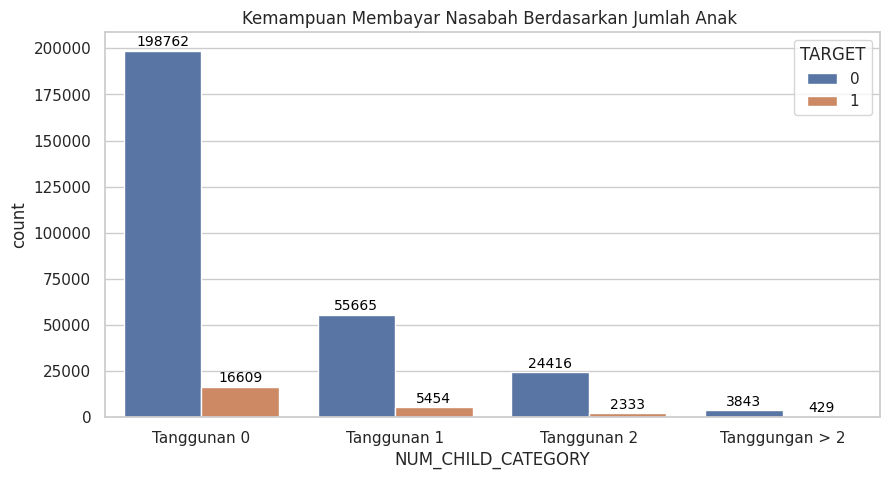

In [ ]:
#kemampuan bayar berdasarkan tanggungan anak
plt.figure(figsize=(10,5))
ax = sns.countplot(data=data_train, x='NUM_CHILD_CATEGORY', hue = 'TARGET')
ax.set(title='Kemampuan Membayar Nasabah Berdasarkan Jumlah Anak ')

# add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')

* Semakin sedikit jumlah anak, semakin sulit nasabah untuk membayar tepat waktu.

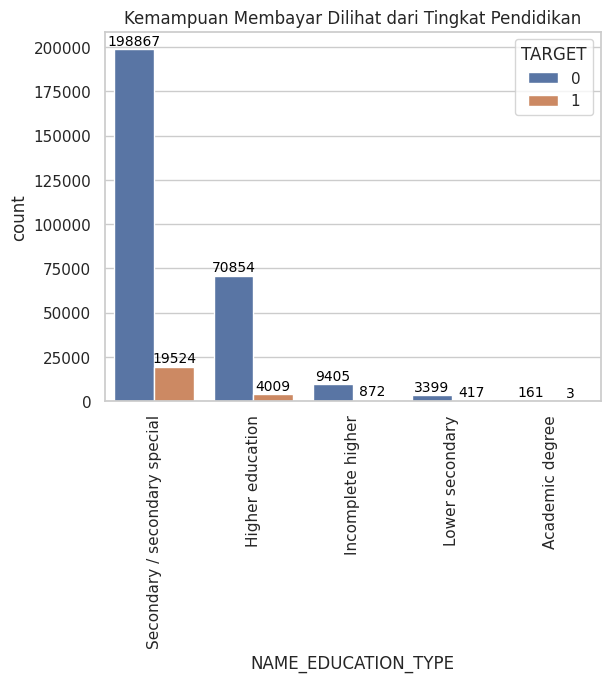

In [ ]:
#tingkat pendidikan
edu = sns.countplot(data=data_train, x='NAME_EDUCATION_TYPE', hue='TARGET');
edu.set_xticklabels(edu.get_xticklabels(),rotation = 90);
edu.set(title='Kemampuan Membayar Dilihat dari Tingkat Pendidikan')


# add data labels
for p in edu.patches:
    edu.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')

* Nasabah dengan tingkat pendidikan menengah yang paling banyak mengajukan pinjaman kredit dan paling banyak juga yang mengalami kesulitan membayar

In [ ]:
# tempat tinggal nasabah
house_type = data_train.groupby(['NAME_HOUSING_TYPE']).count()[['TARGET']].rename(columns={'TARGET':'COUNTS'}).reset_index()
house_type.sort_values(by=['COUNTS'],ascending=False)

NAME_HOUSING_TYPE  COUNTS
1    House / apartment  272868
5         With parents   14840
2  Municipal apartment   11183
4     Rented apartment    4881
3     Office apartment    2617
0      Co-op apartment    1122

* Nasabah lebih banyak yang tinggal di rumah/apartment sendiri

In [ ]:
# tipe pinjaman
contract_type = data_train.groupby(['NAME_CONTRACT_TYPE']).count()[['TARGET']].rename(columns={'TARGET':'COUNTS'}).reset_index()
contract_type.sort_values(by=['COUNTS'],ascending=False)

NAME_CONTRACT_TYPE  COUNTS
0         Cash loans  278232
1    Revolving loans   29279

* Nasabah lebih banyak membayar secara cash dibandingkan kredit

In [ ]:
# jenis pemasukan
income_type = data_train.groupby(['NAME_INCOME_TYPE']).count()[['TARGET']].rename(columns={'TARGET':'COUNTS'}).reset_index()
income_type.sort_values(by=['COUNTS'],ascending=False)

NAME_INCOME_TYPE  COUNTS
7               Working  158774
1  Commercial associate   71617
3             Pensioner   55362
4         State servant   21703
6            Unemployed      22
5               Student      18
0           Businessman      10
2       Maternity leave       5

In [ ]:
# mengkategorikan status pekerjaan nasabah
def occup_stat(occup):
  if occup == 'Working' or occup == 'Commercial associate' or occup == 'State servant' or  occup =='Businessman':
    return "Bekerja"
  else:
      return "Tidak Bekerja"

# mencari lokasi kolom child
occup_stat_loc = data_train.columns.get_loc(key='NAME_INCOME_TYPE')

# menyisipkan kolom kategori OCCUPATION_STATUS setelah kolom NAME_INCOME_TYPE
data_train.insert(
    occup_stat_loc+1,
    'OCCUPATION_STATUS',
    data_train['NAME_INCOME_TYPE'].apply(occup_stat)
)

In [ ]:
occup_stat = data_train['OCCUPATION_STATUS'].value_counts()
occup_stat

Bekerja          252104
Tidak Bekerja     55407
Name: OCCUPATION_STATUS, dtype: int64

* Nasabah lebih banyak yang bekerja daripada yang tidak

In [ ]:
# jumlah pendapatan nasabah
income = data_train.groupby(['AMT_INCOME_TOTAL']).count()[['TARGET']].rename(columns={'TARGET':'COUNTS'}).reset_index()
income.sort_values(by=['COUNTS'],ascending=False)

AMT_INCOME_TOTAL  COUNTS
1170      1.350000e+05   35750
904       1.125000e+05   31019
1407      1.575000e+05   26556
1598      1.800000e+05   24719
605       9.000000e+04   22483
1872      2.250000e+05   20698
1754      2.025000e+05   16341
338       6.750000e+04   11147
2064      2.700000e+05   10827
506       8.100000e+04    6001
2171      3.150000e+05    5862
1969      2.475000e+05    5344
1065      1.260000e+05    4668
2256      3.600000e+05    4115
1019      1.215000e+05    3848
719       9.900000e+04    3633
2116      2.925000e+05    3418
780       1.035000e+05    3330
440       7.650000e+04    3146
1284      1.440000e+05    3123
1519      1.710000e+05    2647
2354      4.500000e+05    2435
959       1.170000e+05    2390
213       5.400000e+04    2319
387       7.200000e+04    2187
1481      1.665000e+05    2053
126       4.500000e+04    2043
853       1.080000e+05    1946
2209      3.375000e+05    1790
665       9.450000e+04    1747
1449      1.620000e+05    1702
1659      1.890000e+05    1691
2314      4.050000e+05    1660
553       8.550000e+04    1514
1322      1.485000e+05    1486
1825      2.160000e+05    1406
1115      1.305000e+05    1256
252       5.850000e+04    1182
292       6.300000e+04    1145
1691      1.935000e+05    1061
1371      1.530000e+05    1012
1806      2.115000e+05     985
2284      3.825000e+05     966
1226      1.395000e+05     834
1564      1.755000e+05     800
2398      5.400000e+05     758
168       4.950000e+04     738
1914      2.340000e+05     666
2442      6.750000e+05     659
1778      2.070000e+05     637
1989      2.520000e+05     581
1627      1.845000e+05     534
2025      2.610000e+05     517
1943      2.385000e+05     470
2332      4.275000e+05     466
1956      2.430000e+05     410
2010      2.565000e+05     404
1727      1.980000e+05     386
1852      2.205000e+05     381
88        4.050000e+04     361
56        3.600000e+04     343
2153      3.060000e+05     319
2083      2.790000e+05     280
2381      4.950000e+05     271
1891      2.295000e+05     266
2093      2.835000e+05     252
2142      3.015000e+05     204
23        3.150000e+04     184
2418      5.850000e+05     175
2240      3.510000e+05     175
2489      9.000000e+05     174
2105      2.880000e+05     155
535       8.325000e+04     150
2187      3.240000e+05     143
2045      2.655000e+05     137
482       7.875000e+04     137
228       5.625000e+04     136
271       6.075000e+04     131
2428      6.300000e+05     122
2133      2.970000e+05     114
419       7.425000e+04     110
581       8.775000e+04     110
359       6.975000e+04     103
754       1.012500e+05     102
2074      2.745000e+05      99
320       6.525000e+04      98
151       4.725000e+04      95
2162      3.105000e+05      93
817       1.057500e+05      90
1042      1.237500e+05      90
2476      8.100000e+05      89
191       5.175000e+04      89
1090      1.282500e+05      87
2220      3.420000e+05      84
2347      4.410000e+05      83
2369      4.725000e+05      80
2290      3.870000e+05      80
2196      3.285000e+05      77
2293      3.915000e+05      77
878       1.102500e+05      76
689       9.675000e+04      73
991       1.192500e+05      71
2459      7.200000e+05      71
934       1.147500e+05      69
2505      1.125000e+06      68
2202      3.330000e+05      66
4         2.700000e+04      66
2267      3.690000e+05      65
2279      3.780000e+05      63
73        3.825000e+04      60
1539      1.732500e+05      59
2272      3.735000e+05      57
1498      1.687500e+05      57
1304      1.462500e+05      56
2230      3.465000e+05      55
633       9.225000e+04      55
106       4.275000e+04      52
2180      3.195000e+05      52
2517      1.350000e+06      52
2471      7.650000e+05      51
2409      5.625000e+05      49
2303      3.960000e+05      49
2306      4.005000e+05      48
1346      1.507500e+05      44
2390      5.175000e+05      42
43        3.375000e+04      42
2250      3.555000e+05      42
2353      4.455000e+05      40
1256   

In [ ]:
# mengkategorikan pendapatan
def income_cat(income):
    if (income < 15935):
        return "Low Income"
    elif (income >= 15935 and income <= 62450):
        return "Lower Middle Income"
    elif (income > 62450 and income <= 193764):
        return "Upper Middle Income"
    elif (income > 193764):
        return "High Income"

# mencari lokasi kolom income
income_loc = data_train.columns.get_loc(key='AMT_INCOME_TOTAL')

# menyisipkan kolom INCOME_CATEGORY setelah kolom AMT_INCOME_TOTAL
data_train.insert(
    income_loc+1,
    'INCOME_CATEGORY',
    data_train['AMT_INCOME_TOTAL'].apply(income_cat)
)

In [ ]:
# distribusi data berdasarkan kategori pendapatan
income = data_train.groupby(['INCOME_CATEGORY']).count()[['TARGET']].rename(columns={'TARGET':'COUNTS'}).reset_index()
income.sort_values(by=['COUNTS'],ascending=False)

INCOME_CATEGORY  COUNTS
2  Upper Middle Income  210348
0          High Income   88407
1  Lower Middle Income    8756

* Pendapatan nasabah paling banyak berada di kategori Upper Middle Income

In [ ]:
# melihat hubungan antara INCOME_CATEGORY, OCCUPATION_TYPE, dan NAME_CONTRACT_TYPE

dist_inc_job = data_train.groupby(['OCCUPATION_TYPE','INCOME_CATEGORY','NAME_CONTRACT_TYPE'])[['TARGET']].count()
dist_inc_job = dist_inc_job.sort_values(['OCCUPATION_TYPE','INCOME_CATEGORY','TARGET'],ascending=[True,True,False])
dist_inc_job

TARGET
OCCUPATION_TYPE       INCOME_CATEGORY     NAME_CONTRACT_TYPE        
Accountants           High Income         Cash loans            3529
                                          Revolving loans        409
                      Lower Middle Income Cash loans              63
                                          Revolving loans         11
                      Upper Middle Income Cash loans            5015
                                          Revolving loans        786
Cleaning staff        High Income         Cash loans             613
                                          Revolving loans         36
                      Lower Middle Income Cash loans             246
                                          Revolving loans         28
                      Upper Middle Income Cash loans            3376
                                          Revolving loans        354
Cooking staff         High Income         Cash loans             972
                                          Revolving loans         42
                      Lower Middle Income Cash loans             217
                                          Revolving loans         22
                      Upper Middle Income Cash loans            4248
                                          Revolving loans        445
Core staff            High Income         Cash loans            7516
                                          Revolving loans        803
                      Lower Middle Income Cash loans             455
                                          Revolving loans         75
                      Upper Middle Income Cash loans           16403
                                          Revolving loans       2318
Data Not Available    High Income         Cash loans           20655
                                          Revolving loans       1814
                      Lower Middle Income Cash loans            5071
                                          Revolving loans        350
                      Upper Middle Income Cash loans           63074
                                          Revolving loans       5427
Drivers               High Income         Cash loans            6726
                                          Revolving loans        380
                      Lower Middle Income Cash loans              86
                                          Revolving loans          7
                      Upper Middle Income Cash loans           10436
                                          Revolving loans        968
HR staff              High Income         Cash loans             181
                                          Revolving loans         25
                      Lower Middle Income Cash loans               3
                      Upper Middle Income Cash loans             294
                                          Revolving loans         60
High skill tech staff High Income         Cash loans            3606
                                          Revolving loans        397
                      Lower Middle Income Cash loans             104
                                          Revolving loans         22
                      Upper Middle Income Cash loans            6298
                                          Revolving loans        953
IT staff              High Income         Cash loans             178
                                          Revolving loans         47
                      Lower Middle Income Cash loans               2
                                          Revolving loans          1
                      Upper Middle Income Cash loans             240
                                          Revolving loans         58
Laborers              High Income         Cash loans           14017
                                          Revolving loans        988
                      Lower Middle Income Cash loans             587
                                          Revolving loans   

In [ ]:
# membuat dataframe untuk fitur kategorikal
df_cat = data_train.select_dtypes(include = [object])
cols = []
for col in list(df_cat.columns):
    df_cat[col].fillna(method = "ffill")
    cols.append(col)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# membuat objek label encoder
le = LabelEncoder()

# iterasi untuk seluruh kolom pada df_cat
for col in df_cat:
    if df_cat[col].dtype == 'object':
        # jika ada 2 atau kurang kategori unik
        if len(list(df_cat[col].unique())) <= 2:
            # train pada training data
            le.fit(df_cat[col])
            # Transform training dan testing data
            df_cat[col] = le.transform(df_cat[col])

In [ ]:
# membuat dummies untuk df_cat
df_cat = pd.get_dummies(df_cat)

# merge dengan data_train
data_train.drop(columns=cols, axis=1, inplace=True)
data_train = pd.merge(data_train, df_cat, left_index=True, right_index=True)
data_train.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  AGE  \
0      24700.5         351000.0                    0.018801       -9461   26   
1      35698.5        1129500.0                    0.003541      -16765   46   
2       6750.0         135000.0                    0.010032      -19046   52   
3      29686.5         297000.0                    0.008019      -19005   52   
4      21865.5         513000.0                    0.028663      -19932   55   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   

   EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.083037      0.262949      0.139376                       2.0   
1      0.311267      0.622246      0.510853                       1.0   
2      0.502130      0.555912      0.729567                       0.0   
3      0.502130      0.650442      0.510853                       2.0   
4      0.502130      0.322738      0.510853                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                       2.0                0                1   
1                       0.0                0                1   
2                       0.0                0                0   
3                       0.0                0                1   
4                       0.0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3                0                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   
3                0                0                 0                 0   
4                1                0                 0                 0   

   FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
0                 0                 0                 0          

In [ ]:
# mengurangi penggunaan memory
import sys

def convert_types(df, print_info = False):

    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    # Iterate through each column
    for c in df:

        # Convert ids and booleans to integers
        if ('SK_ID' in c):
            df[c] = df[c].fillna(0).astype(np.int32)

        # Convert objects to category
        elif (df[c].dtype == 'object') and (df[c].nunique() < df.shape[0]):
            df[c] = df[c].astype('category')

        # Booleans mapped to integers
        elif list(df[c].unique()) == [1, 0]:
            df[c] = df[c].astype(bool)

        # Float64 to float32
        elif df[c].dtype == float:
            df[c] = df[c].astype(np.float32)

        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
data_train_fix = convert_types(data_train, print_info = False)

Memory usage of dataframe is 126.98 MB
Memory usage after optimization is: 70.68 MB
Decreased by 44.3%


In [ ]:
# Menyimpan dataset yang sudah di cleaning dalam format CSV
data_train_fix.to_csv('new_data_train.csv', index=False)

In [ ]:
# # Melihat data berdasarkan id curr
# data_train_fix[data_train_fix['SK_ID_CURR']==343403]

In [ ]:
# # Melihat jumlah target yang churn dan tidak churn
# churn_count = data_train_fix['TARGET'].value_counts()
# print(churn_count)

In [ ]:
# # Mengatasi data imbalance
# from imblearn.under_sampling import RandomUnderSampler

# # Memisahkan fitur dan target
# X = data_train_fix.drop('TARGET', axis=1)
# y = data_train_fix['TARGET']

# # Menerapkan oversampling dengan SMOTE
# undersampler = RandomUnderSampler(random_state=42)
# X_resampled, y_resampled = undersampler.fit_resample(X, y)

# # Melihat jumlah sampel setelah oversampling
# print("Jumlah sampel setelah oversampling:")
# print(y_resampled.value_counts())


In [ ]:
# # Menggabungkan fitur dan target yang telah diundersample
# undersampled_df = pd.concat([X_resampled, y_resampled], axis=1)

# # Mengacak dataset yang telah diundersample
# data_train_final = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# # Menampilkan dataset setelah undersampling
# print("Dataset setelah undersampling:")
# data_train_final.head(50)


In [ ]:
# # Melihat jumlah target yang churn dan tidak churn
# churn_count = data_train_final['TARGET'].value_counts()
# print(churn_count)

In [ ]:
# data_train_final["SK_ID_CURR"].nunique()

## **Bureau Balance**

Bureau Balance adalah saldo bulanan kredit sebelumnya di Biro Kredit. Tabel ini memiliki satu baris untuk setiap bulan riwayat dari setiap kredit sebelumnya yang dilaporkan ke Biro Kredit yaitu tabel memiliki (pinjaman dalam sampel, kredit relatif sebelumnya, bulan di mana kami memiliki beberapa riwayat yang dapat diamati untuk kredit sebelumnya) baris .


In [ ]:
# Membaca dan menampilkan bureau_balance
!gdown 1XGauZhg26xTcOVL8rh3jI9AdSyCjhZSG

Downloading...
From: https://drive.google.com/uc?id=1XGauZhg26xTcOVL8rh3jI9AdSyCjhZSG
To: /content/bureau_balance.csv
100% 376M/376M [00:03<00:00, 110MB/s] 


In [ ]:
bb = pd.read_csv("bureau_balance.csv")
# membaca data
print("Jumlah baris : ",bb.shape[0])
print("Jumlah kolom : ",bb.shape[1])
bb.head()

Jumlah baris :  27299925
Jumlah kolom :  3


SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [ ]:
bb.describe().T

count          mean            std        min        25%  \
SK_ID_BUREAU    27299925.0  6.036297e+06  492348.856904  5001709.0  5730933.0   
MONTHS_BALANCE  27299925.0 -3.074169e+01      23.864509      -96.0      -46.0   

                      50%        75%        max  
SK_ID_BUREAU    6070821.0  6431951.0  6842888.0  
MONTHS_BALANCE      -25.0      -11.0        0.0

In [ ]:
# check null values
bb.isnull().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [ ]:
# jumlah transaksi pinjaman nasabah di tempat lain yang tercatat
bb['SK_ID_BUREAU'].nunique()

817395

In [ ]:
bb['MONTHS_BALANCE'].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60, -61, -62, -63, -64,
       -65, -66, -67, -68, -69, -70, -71, -72, -73, -74, -75, -76, -77,
       -78, -79, -80, -81, -82, -83, -84, -85, -86, -87, -88, -89, -90,
       -91, -92, -93, -94, -95, -96])

In [ ]:
bb['STATUS'].unique(), bb['STATUS'].value_counts()

(array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object),
 C    13646993
 0     7499507
 X     5810482
 1      242347
 5       62406
 2       23419
 3        8924
 4        5847
 Name: STATUS, dtype: int64)

### Feature Engineering

In [ ]:
# menghitung berapa bulan pinjaman dilakukan di setiap pinjaman yang ada
count_months = bb.groupby('SK_ID_BUREAU', as_index=False)['MONTHS_BALANCE'].count().rename(
    columns = {'MONTHS_BALANCE': 'COUNT_MONTHS'})

In [ ]:
# menghitung jumlah status dan persentasenya dari setiap SK_ID_BUREAU yang ada
def count_status(df, id, df_name):

    # mengambil kolom STATUS pada df yang bertipe object
    stat_col = pd.get_dummies(df.select_dtypes('object'))

    # mengambil kolom SK_ID_BUREAU dari df
    stat_col[id] = df[id]

    # melakukan groupby berdasarkan SK_ID_BUREAU dan melakukan agregasi sum & mean dari STATUS yang ada
    stat_col = stat_col.groupby(id).agg(['sum', 'mean'])

    column_names = []

    # iterasi kolom level 0
    for var in stat_col.columns.levels[0]:
        # iterasi stat level 1
        for stat in ['COUNT', 'PERCENTAGE']:
            # buat kolom baru
            column_names.append('%s_%s_%s' % (df_name, var, stat))

    stat_col.columns = column_names

    return stat_col

In [ ]:
count_stat = count_status(bb,'SK_ID_BUREAU','BB')
count_stat.head()

BB_STATUS_0_COUNT  BB_STATUS_0_PERCENTAGE  BB_STATUS_1_COUNT  \
SK_ID_BUREAU                                                                 
5001709                       0                0.000000                  0   
5001710                       5                0.060241                  0   
5001711                       3                0.750000                  0   
5001712                      10                0.526316                  0   
5001713                       0                0.000000                  0   

              BB_STATUS_1_PERCENTAGE  BB_STATUS_2_COUNT  \
SK_ID_BUREAU                                              
5001709                          0.0                  0   
5001710                          0.0                  0   
5001711                          0.0                  0   
5001712                          0.0                  0   
5001713                          0.0                  0   

              BB_STATUS_2_PERCENTAGE  BB_STATUS_3_COUNT  \
SK_ID_BUREAU                                              
5001709                          0.0                  0   
5001710                          0.0                  0   
5001711                          0.0                  0   
5001712                          0.0                  0   
5001713                          0.0                  0   

              BB_STATUS_3_PERCENTAGE  BB_STATUS_4_COUNT  \
SK_ID_BUREAU                                              
5001709                          0.0                  0   
5001710                          0.0                  0   
5001711                          0.0                  0   
5001712                          0.0                  0   
5001713                          0.0                  0   

              BB_STATUS_4_PERCENTAGE  BB_STATUS_5_COUNT  \
SK_ID_BUREAU                                              
5001709                          0.0                  0   
5001710                          0.0                  0   
5001711                          0.0                  0   
5001712                          0.0                  0   
5001713                          0.0                  0   

              BB_STATUS_5_PERCENTAGE  BB_STATUS_C_COUNT  \
SK_ID_BUREAU                                              
5001709                          0.0                 86   
5001710                          0.0                 48   
5001711                          0.0                  0   
5001712                          0.0                  9   
5001713                          0.0                  0   

              BB_STATUS_C_PERCENTAGE  BB_STATUS_X_COUNT  \
SK_ID_BUREAU                                              
5001709                     0.886598                 11   
5001710                     0.578313                 30   
5001711                     0.000000                  1   
5001712                     0.473684                  0   
5001713                     0.000000                 22   

              BB_STATUS_X_PERCENTAGE  
SK_ID_BUREAU                          
5001709                     0.113402  
5001710                     0.361446  
5001711                     0.250000  
5001712                     0.000000  
5001713                     1.000000

In [ ]:
# merging kolom count_months dan count_stat
bb_final = pd.merge(count_stat, count_months, on="SK_ID_BUREAU")

In [ ]:
# menambahkan kolom STATUS_RATE = total persentase status 1-5
bb_final['STATUS_RATE'] = bb_final['BB_STATUS_5_PERCENTAGE'] + bb_final['BB_STATUS_4_PERCENTAGE'] + bb_final[
    'BB_STATUS_3_PERCENTAGE'] + bb_final['BB_STATUS_2_PERCENTAGE'] + bb_final['BB_STATUS_1_PERCENTAGE']

In [ ]:
# mengurangi penggunaan memory
bb_fix = convert_types(bb_final, print_info = False)

Memory usage of dataframe is 81.07 MB
Memory usage after optimization is: 46.77 MB
Decreased by 42.3%


In [ ]:
print('ukuran dataset  bureau: ', bb_fix.shape)
print('duplikasi id bureau: ',bb_fix['SK_ID_BUREAU'].duplicated().any())

ukuran dataset  bureau:  (817395, 19)
duplikasi id bureau:  False


In [ ]:
bb_fix.to_csv('new_bureau_balance.csv', index=False)

### Exploratory Data Analysis

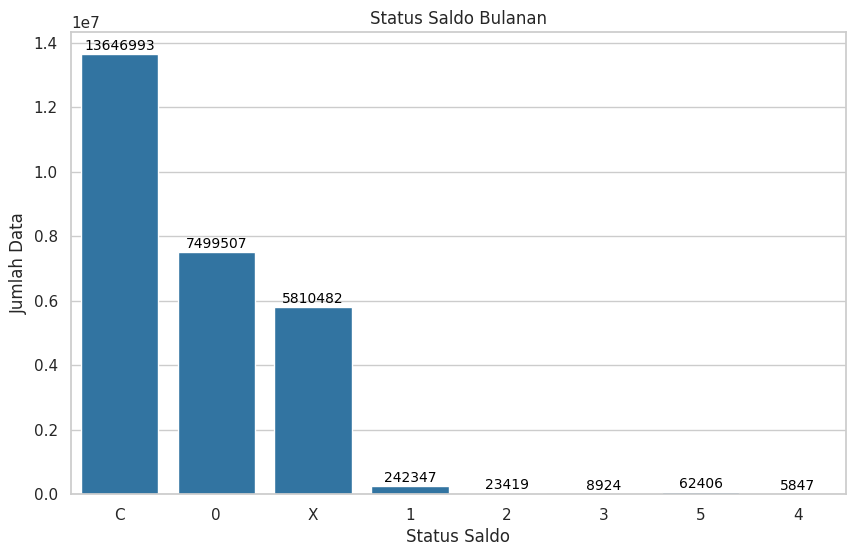

In [ ]:
# Melihat status saldo bulanan debitur
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='STATUS', data=bb, color='#1f77b4')
ax.set_xlabel('Status Saldo')
ax.set_ylabel('Jumlah Data')
ax.set_title('Status Saldo Bulanan')
# add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')
plt.show()

- C berarti tutup
- X berarti status tidak diketahui
- 0 berarti tidak ada DPD (Day Past Due=Jumlah hari yang tertunggak)
- 1 berarti maksimal dilakukan selama bulan antara 1-30
- 2 berarti DPD 31-60
- 3 berarti DPD 61-90
- 4 berarti DPD 91-120
- 5 berarti DPD 120+ atau dijual atau dihapuskan

**Insight :**

- Sebagian besar pinjaman telah ditutup kemudian yang memiliki tunggakan 0 dan status debitur yang tidak diketahui

## **Bureau**

Bureau adalah semua kredit klien sebelumnya yang diberikan oleh lembaga keuangan lain yang dilaporkan ke Biro Kredit (untuk klien yang memiliki pinjaman dalam home credit). Dan untuk setiap pinjaman dalam home credit, ada baris sebanyak jumlah kredit yang dimiliki klien di Biro Kredit sebelum tanggal aplikasi.

In [ ]:
# Membaca dan menampilkan data bureau
!gdown 1KEuUsRiZfKEqnScktQf_NAu2sm02BSMD
# read dataset bureau_balance (hasil fe)
!gdown 1LgSfCPiPVVdvuZKn-dJXxtDSLEFyqCYo
# read data train (hasil fe)
!gdown 1PU0CSQVHvTRZujc1ClwyOJWMTK3WYuCT

Downloading...
From: https://drive.google.com/uc?id=1KEuUsRiZfKEqnScktQf_NAu2sm02BSMD
To: /content/bureau.csv
100% 170M/170M [00:00<00:00, 186MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LgSfCPiPVVdvuZKn-dJXxtDSLEFyqCYo
To: /content/new_bureau_balance.csv
100% 61.5M/61.5M [00:00<00:00, 244MB/s]
Downloading...
From: https://drive.google.com/uc?id=1PU0CSQVHvTRZujc1ClwyOJWMTK3WYuCT
To: /content/new_data_train.csv
100% 114M/114M [00:00<00:00, 173MB/s]


In [ ]:
data_bureau = pd.read_csv('bureau.csv')
# membaca data bureau
print("Jumlah baris : ",data_bureau.shape[0])
print("Jumlah kolom : ",data_bureau.shape[1])
data_bureau.head()

Jumlah baris :  1716428
Jumlah kolom :  17


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [ ]:
bb_fe = pd.read_csv('new_bureau_balance.csv')

# merge bb_fe dengan bureau berdasarkan 'SK_ID_BUREAU
merge_bureau = pd.merge(data_bureau, bb_fe, how='inner', on="SK_ID_BUREAU")

In [ ]:
data_train_fix = pd.read_csv('new_data_train.csv')
# Mengambil data yang idnya ada di dataset data train
bureau = merge_bureau[merge_bureau['SK_ID_CURR'].isin(data_train_fix['SK_ID_CURR'])]

In [ ]:
# Melihat informasi dari dataset
def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    display(str.sort_values(by='Nulls', ascending=False))

In [ ]:
summary(bureau, pred=None)

Data shape: (523515, 35)
___________________________
Data Types:
float32    9
float64    8
uint8      8
int64      6
object     3
int32      1
Name: Types, dtype: int64
___________________________


Types  Counts  Uniques   Nulls  \
AMT_CREDIT_MAX_OVERDUE  float64  159552    23220  363963   
DAYS_ENDDATE_FACT       float64  328774     2885  194741   
AMT_CREDIT_SUM_LIMIT    float64  328806    15237  194709   
AMT_ANNUITY             float64  335010    30086  188505   
AMT_CREDIT_SUM_DEBT     float64  445726    98676   77789   
DAYS_CREDIT_ENDDATE     float64  489387    11238   34128   
AMT_CREDIT_SUM          float64  523514   103990       1   
SK_ID_BUREAU              int64  523515   523515       0   
SK_ID_CURR                int64  523515    92231       0   
DAYS_CREDIT_UPDATE        int64  523515     2871       0   
BB_STATUS_X_COUNT         uint8  523515       98       0   
DAYS_CREDIT               int64  523515     2923       0   
CREDIT_TYPE              object  523515       14       0   
CREDIT_DAY_OVERDUE        int64  523515      333       0   
CREDIT_CURRENCY          object  523515        4       0   
CREDIT_ACTIVE            object  523515        4       0   
COUNT_MONTHS              int32  523515       97       0   
CNT_CREDIT_PROLONG        int64  523515       10       0   
BB_STATUS_X_PERCENTAGE  float32  523515     2664       0   
BB_STATUS_5_PERCENTAGE  float32  523515     1042       0   
BB_STATUS_C_PERCENTAGE  float32  523515     2659       0   
BB_STATUS_C_COUNT         uint8  523515       97       0   
BB_STATUS_5_COUNT         uint8  523515       81       0   
BB_STATUS_4_PERCENTAGE  float32  523515      179       0   
BB_STATUS_4_COUNT         uint8  523515       10       0   
BB_STATUS_3_PERCENTAGE  float32  523515      225       0   
BB_STATUS_3_COUNT         uint8  523515       11       0   
BB_STATUS_2_PERCENTAGE  float32  523515      371       0   
BB_STATUS_2_COUNT         uint8  523515       17       0   
BB_STATUS_1_PERCENTAGE  float32  523515      982       0   
BB_STATUS_1_COUNT         uint8  523515       49       0   
BB_STATUS_0_PERCENTAGE  float32  523515     2657       0   
BB_STATUS_0_COUNT         uint8  523515       96       0   
AMT_CREDIT_SUM_OVERDUE  float64  523515      623       0   
STATUS_RATE             float32  523515     1498       0   

                                         Min                   Max  
AMT_CREDIT_MAX_OVERDUE                   0.0           115987185.0  
DAYS_ENDDATE_FACT                   -42023.0                   0.0  
AMT_CREDIT_SUM_LIMIT             -586406.115             4500000.0  
AMT_ANNUITY                              0.0            59586682.5  
AMT_CREDIT_SUM_DEBT             -2014753.455           170100000.0  
DAYS_CREDIT_ENDDATE                 -42060.0               31131.0  
AMT_CREDIT_SUM                           0.0           170100000.0  
SK_ID_BUREAU                         5008804               6842888  
SK_ID_CURR                            100002                456255  
DAYS_CREDIT_UPDATE                    -41947                   372  
BB_STATUS_X_COUNT                          0                    97  
DAYS_CREDIT                            -2922                     0  
CREDIT_TYPE             Another type of loan  Unknown type of loan  
CREDIT_DAY_OVERDUE                         0                  2792  
CREDIT_CURRENCY                   currency 1            currency 4  
CREDIT_ACTIVE                         Active                  Sold  
COUNT_MONTHS                               1                    97  
CNT_CREDIT_PROLONG                         0                     9  
BB_STATUS_X_PERCENTAGE                   0.0                   1.0  
BB_STATUS_5_PERCENTAGE                   0.0                   1.0  
BB_STATUS_C_PERCENTAGE                   0.0                   1.0  
BB_STATUS_C_COUNT                          0                    96  
BB_STATUS_5_COUNT                          0                    85  
BB_STATUS_4_PERCENTAGE                   0.0                   0.5  
BB_STATUS_4_COUNT                          0                    10  
BB_STATUS_3_PERCENTAGE                   0.0                   0.4  
BB

In [ ]:
bureau["SK_ID_CURR"].nunique()

92231

##### Handling Null Values

In [ ]:
# mengisi semua null pada bureau dengan 0
bureau.fillna(0,inplace=True)

<ipython-input-166-aaac9b4ea849>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# drop kolom CREDIT_CURRENCY
bureau = bureau.drop(['CREDIT_CURRENCY'], axis=1)

### Exploratory Data Analysis

<ipython-input-314-774480d4b26f>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



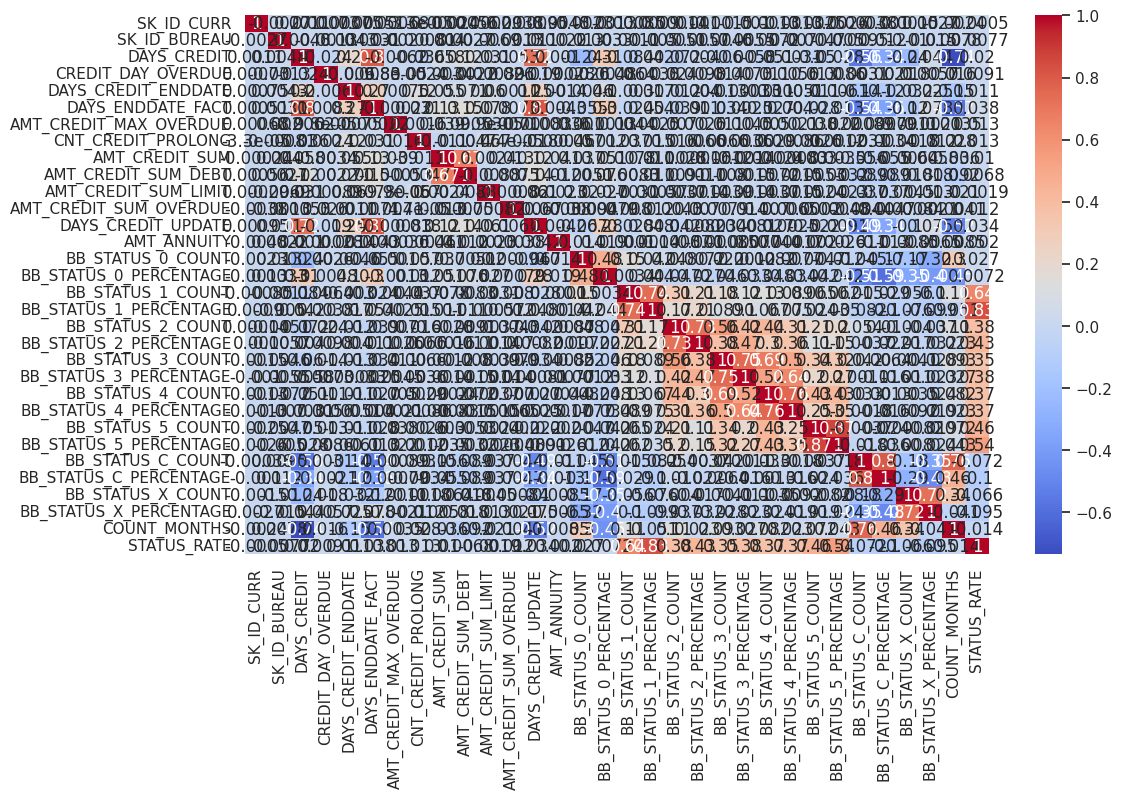

In [ ]:
#Memeriksa korelasi antar fitur menggunakan heatmap
corr = bureau.corr()
plt.figure(figsize=(12, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Analysis : CREDIT_ACTIVE**

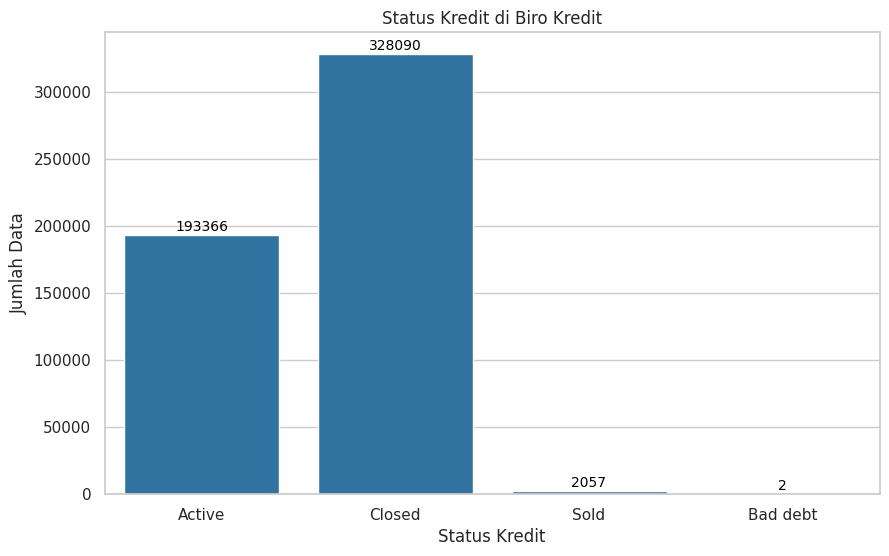

In [ ]:
# Menampilkan status kredit
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CREDIT_ACTIVE', data=bureau, color='#1f77b4')
ax.set_xlabel('Status Kredit')
ax.set_ylabel('Jumlah Data')
ax.set_title('Status Kredit di Biro Kredit')
# add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')
plt.show()

Insight :
- Sebagian besar data menunjukkan bahwa banyak data debitur yang memiliki status kredit yang sudah tertutup atau non-aktif
- Ada sebagian data juga memiliki status kredit yang masih aktif
- Ada sebgian kecil status kartu kredit yang 'sold' dan 'Bad debt'

**Analysis : DAYS_CREDIT**

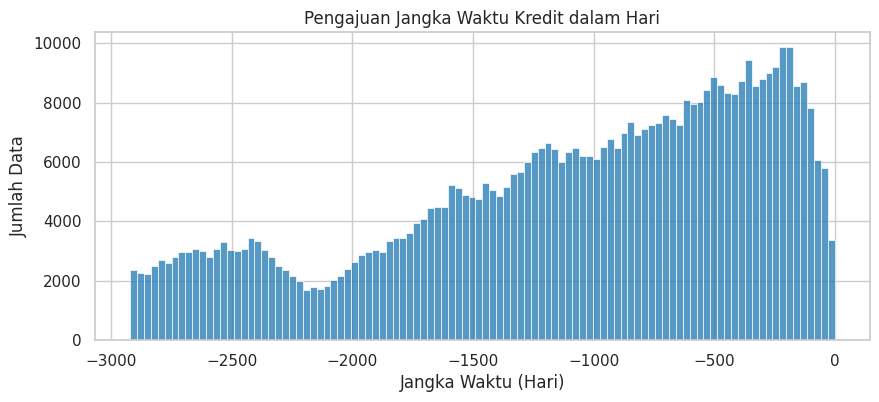

In [ ]:
# Melihat pengajuan jangka waktu kredit dalam hari
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))
ax = sns.histplot(data=bureau, x='DAYS_CREDIT', color='#1f77b4')
ax.set_xlabel('Jangka Waktu (Hari)')
ax.set_ylabel('Jumlah Data')
ax.set_title('Pengajuan Jangka Waktu Kredit dalam Hari')
plt.show()

Insight :
- Sebagian besar data menunjukkan bahwa debitur mengajukan jangka waktu kredit antara **500 hari(Lebih spesifik < 1 tahun)** hingga akhir waktu pelunasan. Semakin lama pengajuan jangka waktu menunjukkan semakin besar nilai kredit.

**Analysis : CREDIT_DAY_OVERDUE**

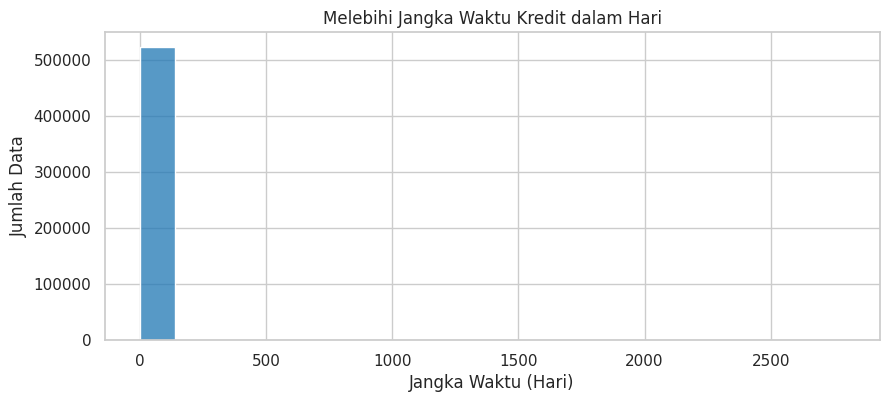

In [ ]:
# Melihat jumlah hari yang melebihi jangka waktu
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))
ax = sns.histplot(data=bureau, x='CREDIT_DAY_OVERDUE', color='#1f77b4')
ax.set_xlabel('Jangka Waktu (Hari)')
ax.set_ylabel('Jumlah Data')
ax.set_title('Melebihi Jangka Waktu Kredit dalam Hari')
plt.show()

In [ ]:
bureau['CREDIT_DAY_OVERDUE'].value_counts()

0       522213
30         127
60          52
8           46
13          39
9           38
7           35
11          34
14          32
17          26
12          26
20          25
15          25
5           23
22          22
29          22
10          20
4           20
6           20
21          19
18          16
90          15
19          15
120         15
32          15
23          14
26          14
16          12
31          12
24          11
25          11
150         11
28          11
3            8
37           8
35           8
33           7
43           7
41           7
68           6
34           6
73           6
38           6
27           6
39           5
52           5
42           5
44           5
40           5
65           5
36           5
76           4
99           4
69           4
54           4
66           4
56           4
79           4
2            4
84           3
55           3
48           3
75           3
49           3
46           3
67           3
93        

In [ ]:
# Menghitung jumlah data yang overdue
jumlah_overdue = 0
for i in bureau['CREDIT_DAY_OVERDUE']:
  if i > 0:
    jumlah_overdue += 1
print('Jumlah debitur yang melebihi jangka waktu adalah :',jumlah_overdue)

Jumlah debitur yang melebihi jangka waktu adalah : 1302


Insight :
- Sebagian besar debitur membayar tepat waktu, namun ada beberapa yang membayar melebihi kesepakatan yang ada yaitu sekitar 4217 data.


**Analysis : DAYS_CREDIT_ENDDATE**

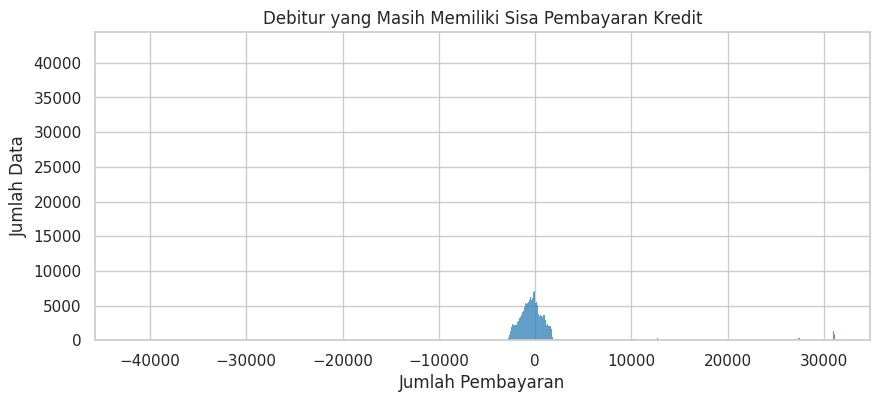

In [ ]:
# Melihat debitur yang masih memiliki sisa pembayaran
sns.set_style('whitegrid')
plt.figure(figsize=(10, 4))
ax = sns.histplot(data=bureau, x='DAYS_CREDIT_ENDDATE', color='#1f77b4')
ax.set_xlabel('Jumlah Pembayaran')
ax.set_ylabel('Jumlah Data')
ax.set_title('Debitur yang Masih Memiliki Sisa Pembayaran Kredit')
plt.show()

In [ ]:
# Mengisi missing value DAYS_CREDIT_ENDDATE & DAYS_ENDDATE_FACT dengan mean
bureau['DAYS_CREDIT_ENDDATE'].fillna(bureau['DAYS_CREDIT_ENDDATE'].mean(), inplace=True)
bureau['DAYS_ENDDATE_FACT'].fillna(bureau['DAYS_ENDDATE_FACT'].mean(), inplace=True)

Insight :
- Dapat dilihat bahwa ada beberapa debitur yang masih memiliki sisa pembayaran kredit saat mengajukan kredit di Home Credit

**Analysis : CNT_CREDIT_PROLONG**

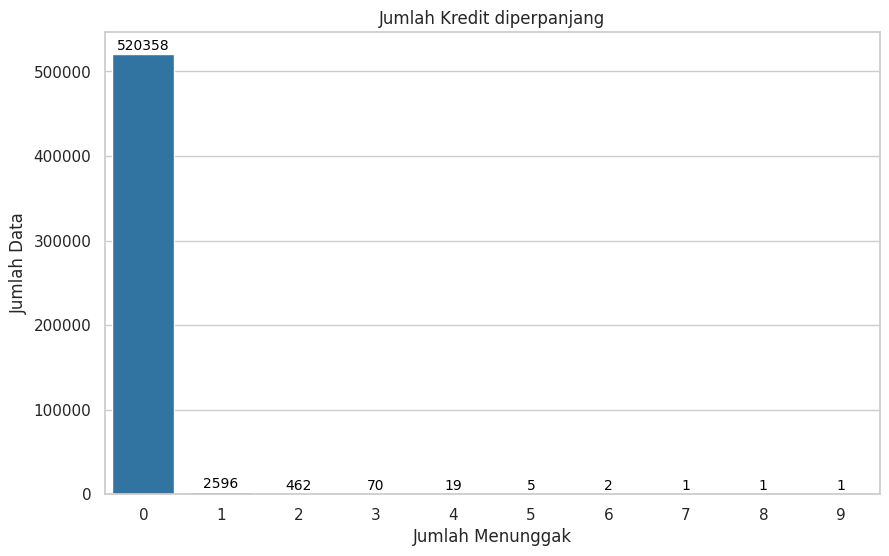

In [ ]:
# Melihat jumlah perpanjangan kredit
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CNT_CREDIT_PROLONG', data=bureau, color='#1f77b4')
ax.set_xlabel('Jumlah Menunggak')
ax.set_ylabel('Jumlah Data')
ax.set_title('Jumlah Kredit diperpanjang')
# add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')
plt.show()

Insight :
- Kebanyakan debitur tidak memperpanjang kredit. Namun ada ribuan debitur yang memperpanjang 1-2 kali, dan ada ratusan debitur yang memperpanjang hingga 3 kali.

**Analysis : CREDIT_TYPE**

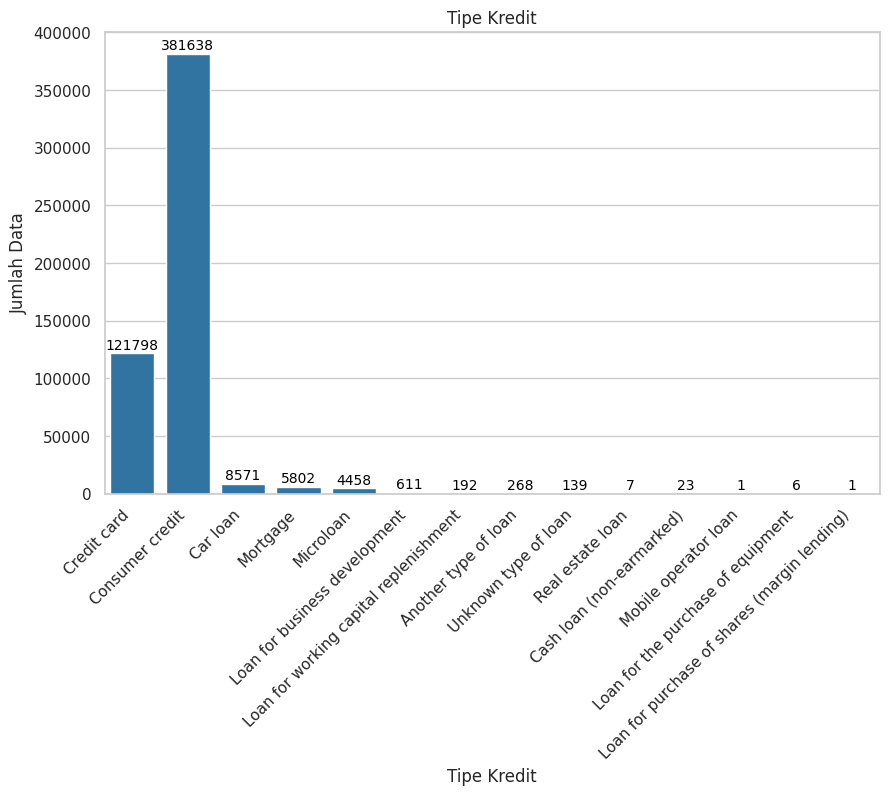

In [ ]:
# Melihat tipe kredit debitur
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='CREDIT_TYPE', data=bureau, color='#1f77b4')
ax.set_xlabel('Tipe Kredit')
plt.xticks(rotation=45, ha='right')
ax.set_ylabel('Jumlah Data')
ax.set_title('Tipe Kredit')
# add data labels
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 6),
                textcoords='offset points')
plt.show()

Insight :

- Customer credit dan credit card adalah jenis kredit yang paling banyak terdaftar di Biro Kredit.

**Analysis : CREDIT_ACTIVE vs DAYS_CREDIT**

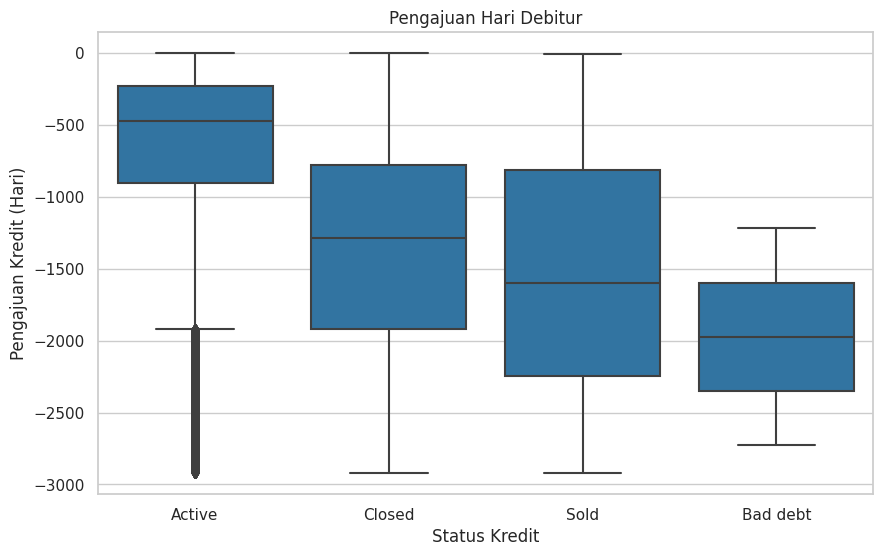

In [ ]:
# Melihat pengajuan kredit dalam hari pada status kredit yang aktif
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=bureau, x="CREDIT_ACTIVE", y="DAYS_CREDIT", color='#1f77b4')
ax.set_xlabel('Status Kredit')
ax.set_ylabel('Pengajuan Kredit (Hari)')
ax.set_title('Pengajuan Hari Debitur')
plt.show()

Insight :

- Kredit yang masih aktif memiliki median 500 artinya jumlah hari yang diajukan berpusat di angka 500 hari.

**Analysis : DAYS_CREDIT vs AMT_CREDIT_SUM**

In [ ]:
# Mengidentifikasi data AMT_CREDIT_SUM yang melebihi 200000000
urutan = 0
index_outlier = []
for i in bureau['AMT_CREDIT_SUM']:
  if i > 200000000:
    index_outlier.append(urutan)
  urutan += 1
print(index_outlier)

[]


In [ ]:
# Melihat baris data outlier berdasarkan index
bureau.iloc[index_outlier]

Empty DataFrame
Columns: [SK_ID_CURR, SK_ID_BUREAU, CREDIT_ACTIVE, DAYS_CREDIT, CREDIT_DAY_OVERDUE, DAYS_CREDIT_ENDDATE, DAYS_ENDDATE_FACT, AMT_CREDIT_MAX_OVERDUE, CNT_CREDIT_PROLONG, AMT_CREDIT_SUM, AMT_CREDIT_SUM_DEBT, AMT_CREDIT_SUM_LIMIT, AMT_CREDIT_SUM_OVERDUE, CREDIT_TYPE, DAYS_CREDIT_UPDATE, AMT_ANNUITY, BB_STATUS_0_COUNT, BB_STATUS_0_PERCENTAGE, BB_STATUS_1_COUNT, BB_STATUS_1_PERCENTAGE, BB_STATUS_2_COUNT, BB_STATUS_2_PERCENTAGE, BB_STATUS_3_COUNT, BB_STATUS_3_PERCENTAGE, BB_STATUS_4_COUNT, BB_STATUS_4_PERCENTAGE, BB_STATUS_5_COUNT, BB_STATUS_5_PERCENTAGE, BB_STATUS_C_COUNT, BB_STATUS_C_PERCENTAGE, BB_STATUS_X_COUNT, BB_STATUS_X_PERCENTAGE, COUNT_MONTHS, STATUS_RATE]
Index: []

In [ ]:
# Menghapus baris yang outlier
bureau.drop(index_outlier, inplace=True)

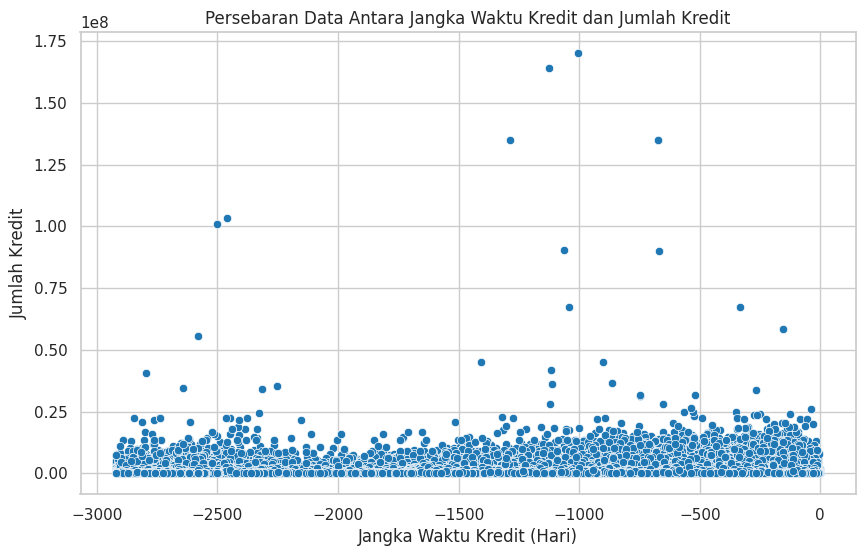

In [ ]:
# Melihat pada jangka waktu kredit dan jumlah kredit yang diambil
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=bureau, x="DAYS_CREDIT", y="AMT_CREDIT_SUM", color='#1f77b4')
ax.set_xlabel('Jangka Waktu Kredit (Hari)')
ax.set_ylabel('Jumlah Kredit')
ax.set_title('Persebaran Data Antara Jangka Waktu Kredit dan Jumlah Kredit')
plt.show()

Insight :

- Kebanyakan jumlah kredit dibawah 25.000.000 dengan jangka waktu yang beragam.

**Analysis : CREDIT_ACTIVE vs CREDIT_DAY_OVERDUE**

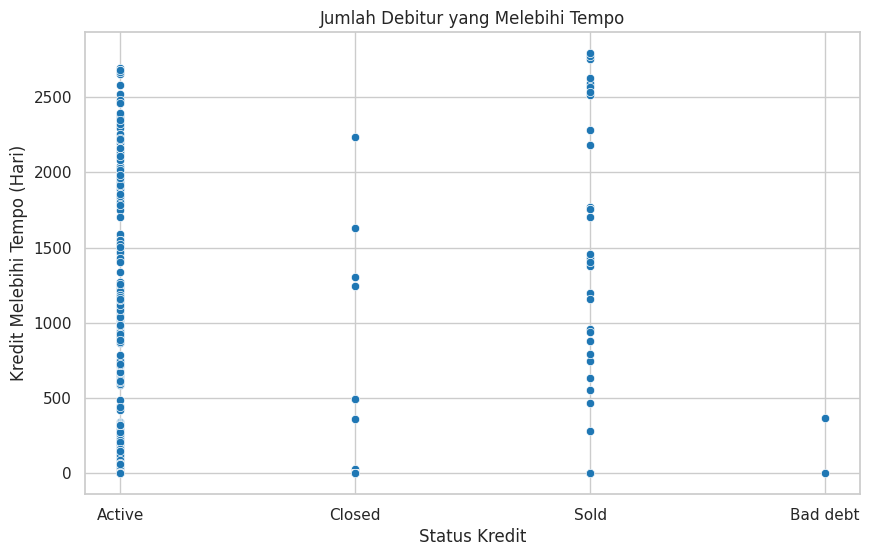

In [ ]:

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=bureau, x="CREDIT_ACTIVE", y="CREDIT_DAY_OVERDUE", color='#1f77b4')
ax.set_xlabel('Status Kredit')
ax.set_ylabel('Kredit Melebihi Tempo (Hari)')
ax.set_title('Jumlah Debitur yang Melebihi Tempo')
plt.show()

In [ ]:
# Menghitung jumlah data yang overdue
jumlah_overdue = 0
for i in bureau['CREDIT_DAY_OVERDUE']:
  if i > 0:
    jumlah_overdue += 1
print('Jumlah debitur yang melebihi jangka waktu adalah :',jumlah_overdue)

Jumlah debitur yang melebihi jangka waktu adalah : 1302


Insight :

- Masih banyak debitur yang dalam pembayarannya masih melebihi tempo yang ada

In [ ]:
urutan = 0
index_outlier = []
for i in bureau['DAYS_ENDDATE_FACT']:
  if i < -3000:
    index_outlier.append(urutan)
  urutan += 1
print(index_outlier)

[50746, 476070]


In [ ]:
# Melihat baris data outlier berdasarkan index
bureau.iloc[index_outlier]

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE  DAYS_CREDIT  \
87473       104463       6550986        Closed        -2340   
709457      394875       6638194        Closed        -1021   

        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
87473                    0              -1836.0           -42023.0   
709457                   0                 74.0            -3042.0   

        AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
87473                      0.0                   0        225000.0   
709457                     0.0                   0        711450.0   

        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
87473                   0.0              225000.0                     0.0   
709457                  0.0                   0.0                     0.0   

            CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  BB_STATUS_0_COUNT  \
87473       Credit card               -2196          0.0                 12   
709457  Consumer credit                 -16          0.0                  3   

        BB_STATUS_0_PERCENTAGE  BB_STATUS_1_COUNT  BB_STATUS_1_PERCENTAGE  \
87473                 0.155844                  0                     0.0   
709457                0.088235                  0                     0.0   

        BB_STATUS_2_COUNT  BB_STATUS_2_PERCENTAGE  BB_STATUS_3_COUNT  \
87473                   0                     0.0                  0   
709457                  0                     0.0                  0   

        BB_STATUS_3_PERCENTAGE  BB_STATUS_4_COUNT  BB_STATUS_4_PERCENTAGE  \
87473                      0.0                  0                     0.0   
709457                     0.0                  0                     0.0   

        BB_STATUS_5_COUNT  BB_STATUS_5_PERCENTAGE  BB_STATUS_C_COUNT  \
87473                   0                     0.0                 65   
709457                  0                     0.0                  0   

        BB_STATUS_C_PERCENTAGE  BB_STATUS_X_COUNT  BB_STATUS_X_PERCENTAGE  \
87473                 0.844156                  0                0.000000   
709457                0.000000                 31                0.911765   

        COUNT_MONTHS  STATUS_RATE  
87473             77          0.0  
709457            34          0.0

In [ ]:
# Menghapus baris yang outlier
bureau.drop(index_outlier, inplace=True)

Indight :

- Banyak debitur yang menyelesaikan waktu kredit sesuai dengan pengajuan kredit di awal.

**Analysis : CREDIT_ACTIVE vs AMT_CREDIT_SUM_OVERDUE**

Jumlah debitur yang masih memiliki tunggakan kredit =  1314


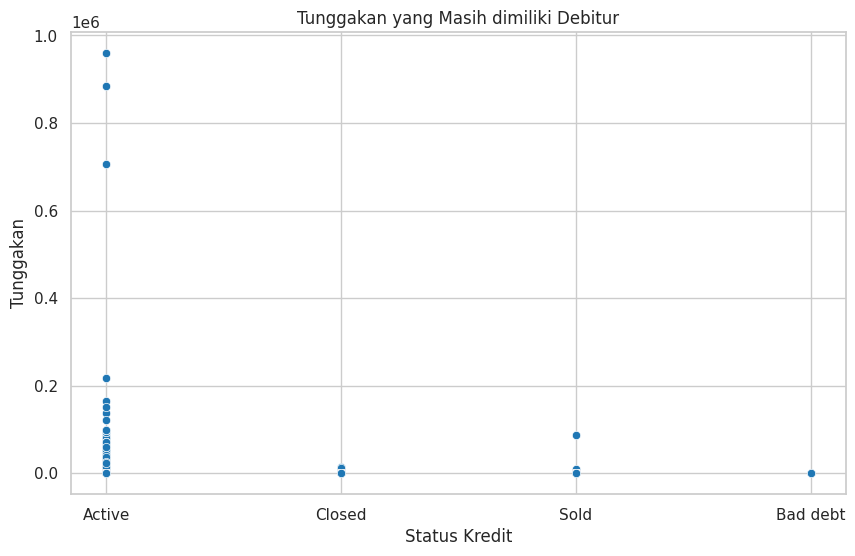

In [ ]:
# Melihat jumlah debitur yang memiliki tunggakan
total_kredit = 0
for i in bureau['AMT_CREDIT_SUM_OVERDUE']:
  if (i > 0):
    total_kredit += 1
  elif (i == None):
    total_kredit += 0
print('Jumlah debitur yang masih memiliki tunggakan kredit = ', total_kredit)

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=bureau, x="CREDIT_ACTIVE", y="AMT_CREDIT_SUM_OVERDUE", color='#1f77b4')
ax.set_xlabel('Status Kredit')
ax.set_ylabel('Tunggakan')
ax.set_title('Tunggakan yang Masih dimiliki Debitur')
plt.show()

In [ ]:
urutan = 0
index_outlier = []
for i in bureau['AMT_CREDIT_SUM_DEBT']:
  if i > 75000000:
    index_outlier.append(urutan)
  urutan += 1
print(index_outlier)

[154684, 156233]


In [ ]:
# Melihat baris data outlier berdasarkan index
bureau.iloc[index_outlier]

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE  DAYS_CREDIT  \
239543      363076       5089138        Active        -1127   
241092      363076       5090928        Active        -1006   

        CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
239543                   0               -675.0                0.0   
241092                   0               -675.0                0.0   

        AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
239543                     0.0                   0     164032200.0   
241092                     0.0                   0     170100000.0   

        AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
239543          164032200.0                   0.0                     0.0   
241092          170100000.0                   0.0                     0.0   

            CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  BB_STATUS_0_COUNT  \
239543  Consumer credit                -473          0.0                  0   
241092  Consumer credit                -473          0.0                  0   

        BB_STATUS_0_PERCENTAGE  BB_STATUS_1_COUNT  BB_STATUS_1_PERCENTAGE  \
239543                     0.0                  0                     0.0   
241092                     0.0                  0                     0.0   

        BB_STATUS_2_COUNT  BB_STATUS_2_PERCENTAGE  BB_STATUS_3_COUNT  \
239543                  0                     0.0                  0   
241092                  0                     0.0                  0   

        BB_STATUS_3_PERCENTAGE  BB_STATUS_4_COUNT  BB_STATUS_4_PERCENTAGE  \
239543                     0.0                  0                     0.0   
241092                     0.0                  0                     0.0   

        BB_STATUS_5_COUNT  BB_STATUS_5_PERCENTAGE  BB_STATUS_C_COUNT  \
239543                  0                     0.0                  0   
241092                  0                     0.0                  0   

        BB_STATUS_C_PERCENTAGE  BB_STATUS_X_COUNT  BB_STATUS_X_PERCENTAGE  \
239543                     0.0                 37                     1.0   
241092                     0.0                 34                     1.0   

        COUNT_MONTHS  STATUS_RATE  
239543            37          0.0  
241092            34          0.0

In [ ]:
# Menghapus baris yang outlier
bureau.drop(index_outlier, inplace=True)

KeyError: ignored

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=bureau, x="AMT_CREDIT_SUM_DEBT", y="AMT_CREDIT_SUM", color='#1f77b4')
ax.set_xlabel('Total Tunggakan')
ax.set_ylabel('Total Kredit')
ax.set_title('Jumlah Tunggakan Dari Total Kredit')
plt.show()

Insight :

- Jumlah debitur yang masih memiliki tunggakan masih banyak yaitu ada sekitar 4000 data

In [ ]:
# menghitung jumlah jenis pinjaman yang ada
bureau['CREDIT_TYPE'].value_counts()

* Terdapat 15 jenis pinjaman, dengan Consumer credit adalah pinjaman yang paling banyak dibeli nasabah

In [ ]:
# jumlah perpanjangan kredit
bureau['CNT_CREDIT_PROLONG'].value_counts()

* lebih banyak customer yang tidak diperpanjang kreditnya
* perpanjang kredit paling banyak adalah sebanyak 7 kali

### Feature Engineering

#### Feature Creation

In [ ]:
# FEATURE 1
# Durasi kredit (dalam hari)

bureau['NEW_BUREAU_DURATION'] = bureau['DAYS_CREDIT_ENDDATE']-bureau['DAYS_CREDIT']

In [ ]:
# FEATURE 2
# menghitung pinjaman yang pernah dilakukan tiap customer (CUSTOMER_LOAN_COUNT)
no_loans_per_customer = bureau[['SK_ID_CURR', 'SK_ID_BUREAU']].groupby(by = ['SK_ID_CURR'])['SK_ID_BUREAU'].count()\
  .reset_index().rename(columns={'SK_ID_BUREAU': 'CUSTOMER_LOAN_COUNT'})

# merge hasil ke bureau
bureau = bureau.merge(no_loans_per_customer, on='SK_ID_CURR', how='left')

In [ ]:
# FEATURE 3
# menghitung jumlah tipe kredit yang pernah dibeli tiap customer (NEW_LOAN_TYPES_COUNT)
credit_types_per_customer = bureau[['SK_ID_CURR','CREDIT_TYPE']].groupby(by=['SK_ID_CURR'])['CREDIT_TYPE'].nunique()\
    .reset_index().rename(columns={'CREDIT_TYPE':'NEW_LOAN_TYPES_COUNT'})

# merge hasil ke bureau
bureau = bureau.merge(credit_types_per_customer, on='SK_ID_CURR',how='left')

In [ ]:
# FEATURE 4
# % pinjaman kredit yang masih aktif tiap customer (NEW_ACTIVE_LOANS_PERCENTAGE)
# dummy kolom untuk mengelompokkan credit yang ACTIVE atau CLOSED
bureau['CREDIT_ACTIVE_BINARY'] = bureau['CREDIT_ACTIVE']

def f(x):
    if x == 'Closed':
        y = 0
    else:
        y = 1
    return y

bureau['CREDIT_ACTIVE_BINARY'] = bureau.apply(lambda x: f(x.CREDIT_ACTIVE), axis = 1)

# menghitung rata-rata pinjaman yang masih aktif aktif dari tiap nasabah
grp = bureau.groupby(by = ['SK_ID_CURR'])['CREDIT_ACTIVE_BINARY'].mean().reset_index()\
  .rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'NEW_ACTIVE_LOANS_PERCENTAGE'})

# menggabungkan hasil ke bureau
bureau = bureau.merge(grp, on = ['SK_ID_CURR'], how = 'left')
del bureau['CREDIT_ACTIVE_BINARY']
gc.collect()

773

In [ ]:
# FEATURE 5
# % pinjaman per customer di mana tgl akhir kredit sudah lewat (NEW_CREDIT_ENDDATE_PERCENTAGE)
# hasil negatif = tgl akhir kredit sudah berakhir ketika apply di Home Credit (Potential Red Flag)
# hasil positif = tgl akhir kredit masih di masa depan ketika apply di Home Credit (Potential Good Sign)
# NOTE : This is not the same as % of Active loans since Active loans can have Negative and Positive values for DAYS_CREDIT_ENDDATE

# membuat dummy kolom binary
bureau['CREDIT_ENDDATE_BINARY'] = bureau['DAYS_CREDIT_ENDDATE']

def f(x):
    if x<0:
        y = 0
    else:
        y = 1
    return y

bureau['CREDIT_ENDDATE_BINARY'] = bureau.apply(lambda x: f(x.DAYS_CREDIT_ENDDATE), axis = 1)

grp = bureau.groupby(by = ['SK_ID_CURR'])['CREDIT_ENDDATE_BINARY'].mean()\
    .reset_index().rename(index=str, columns={'CREDIT_ENDDATE_BINARY': 'NEW_CREDIT_ENDDATE_PERCENTAGE'})

#menggabungkan hasil kolom ke bureau
bureau = bureau.merge(grp, on = ['SK_ID_CURR'], how = 'left')

del bureau['CREDIT_ENDDATE_BINARY']

* Kredit = jumlah pinjaman yang diberikan ke nasabah
* Debt / hutang = jumlah yang dipinjam nasabah dan yang harus dikembalikan dengan membayar sejumlah bunga

In [ ]:
# FEATURE 6
# rasio antara total debt & total kredit tiap customer (DEBT_CREDIT_RATIO)
# semakin tinggi persentase, semakin tinggi potensi gagal bayar

grp1 = bureau[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum()\
    .reset_index().rename(index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = bureau[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum()\
    .reset_index().rename(index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

bureau = bureau.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
bureau = bureau.merge(grp2, on = ['SK_ID_CURR'], how = 'left')

# menghitung rasio debt & kredit
bureau['NEW_DEBT_CREDIT_RATIO'] = bureau['TOTAL_CUSTOMER_DEBT']/bureau['TOTAL_CUSTOMER_CREDIT']

del grp1, grp2
del bureau['TOTAL_CUSTOMER_DEBT'],bureau['TOTAL_CUSTOMER_CREDIT']
gc.collect()

0

In [ ]:
# FEATURE 7
# menghitung rata-rata perpanjangan kredit tiap nasabah (NEW_AVG_CREDITDAYS_PROLONGED)
grp = bureau[['SK_ID_CURR', 'CNT_CREDIT_PROLONG']].groupby(by = ['SK_ID_CURR'])['CNT_CREDIT_PROLONG'].mean()\
    .reset_index().rename( index = str, columns = { 'CNT_CREDIT_PROLONG': 'NEW_AVG_CREDITDAYS_PROLONGED'})
bureau = bureau.merge(grp, on = ['SK_ID_CURR'], how = 'left')

del grp
gc.collect()

0

In [ ]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0      380361       5715448        Active         -820                   0   
1      380361       5715449        Active         -357                   0   
2      380361       5715451        Closed         -917                   0   
3      380361       5715452        Closed         -993                   0   
4      380361       5715453        Closed        -1146                   0   

   DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
0              31069.0                0.0                     0.0   
1               1119.0                0.0                     0.0   
2               -187.0             -759.0                     0.0   
3              31039.0             -831.0                     0.0   
4                681.0             -780.0                     0.0   

   CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0                   0         67500.0                  0.0   
1                   0         45000.0                  0.0   
2                   0         74439.0                  0.0   
3                   0        315000.0                  0.0   
4                   0       2025000.0                  0.0   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
0               67500.0                     0.0      Credit card   
1               45000.0                     0.0      Credit card   
2                   0.0                     0.0  Consumer credit   
3                   0.0                     0.0      Credit card   
4                   0.0                     0.0  Consumer credit   

   DAYS_CREDIT_UPDATE  AMT_ANNUITY  BB_STATUS_0_COUNT  BB_STATUS_0_PERCENTAGE  \
0                -183          0.0                  8                0.296296   
1                -130       2691.0                  5                0.416667   
2                -748          0.0                 17                0.653846   
3                -818          0.0                  8                0.242424   
4                -769          0.0                  8                0.210526   

   BB_STATUS_1_COUNT  BB_STATUS_1_PERCENTAGE  BB_STATUS_2_COUNT  \
0                  0                     0.0                  0   
1                  0                     0.0                  0   
2                  0                     0.0                  0   
3                  0                     0.0                  0   
4                  0                     0.0                  0   

   BB_STATUS_2_PERCENTAGE  BB_STATUS_3_COUNT  BB_STATUS_3_PERCENTAGE  \
0                     0.0                  0                     0.0   
1                     0.0                  0                     0.0   
2                     0.0                  0                     0.0   
3                     0.0                  0                     0.0   
4                     0.0                  0                     0.0   

   BB_STATUS_4_COUNT  BB_STATUS_4_PERCENTAGE  BB_STATUS_5_COUNT  \
0                  0                     0.0                  0   
1                  0                     0.0                  0   
2                  0                     0.0                  0   
3                  0                     0.0                  0   
4                  0                     0.0                  0   

   BB_STATUS_5_PERCENTAGE  BB_STATUS_C_COUNT  BB_STATUS_C_PERCENTAGE  \
0                     0.0                  9                0.333333   
1                     0.0                  6                0.500000   
2                     0.0                  5                0.192308   
3                     0.0                 15                0.454545   
4                     0.0                 20                0.526316   

   BB_STATUS_X_COUNT  BB_STATUS_X_PERCENTAGE  COUNT_MONTHS  STATUS_RATE  \
0                 10                0.370370            27          0.0   
1                  1        

In [ ]:
bureau['SK_ID_CURR'].nunique()

92231

#### Feature Aggregation

In [ ]:
# aggregat + encode kolom kategorikal
def agg_categorical(df, parent_var, df_name):
    # memilih kolom kategorikal
    categorical = pd.get_dummies(df[['CREDIT_ACTIVE', 'CREDIT_TYPE']])
    categorical[parent_var] = df[parent_var]

    # Groupby menggunakan group var and menghitung mean
    categorical = categorical.groupby(parent_var).agg(['mean'])

    # print(categorical)
    column_names = []

    # iterasi melalui kolom pada level 0
    for var in categorical.columns.levels[0]:
        # iterasi melalui stats pada level 1
        for stat in ['mean']:
            # membuat nama kolom baru
            column_names.append('%s_%s_%s' % (df_name, var, stat))

    categorical.columns = column_names

    # menghapus kolom duplikat berdasarkan value
    _, idx = np.unique(categorical, axis = 1, return_index = True)
    categorical = categorical.iloc[:, idx]

    df = df.merge(categorical, how='left', on=parent_var)
    return df

In [ ]:
bureau = agg_categorical(bureau, 'SK_ID_CURR', 'BUREAU')
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE  DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
0      380361       5715448        Active         -820                   0   
1      380361       5715449        Active         -357                   0   
2      380361       5715451        Closed         -917                   0   
3      380361       5715452        Closed         -993                   0   
4      380361       5715453        Closed        -1146                   0   

   DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
0              31069.0                0.0                     0.0   
1               1119.0                0.0                     0.0   
2               -187.0             -759.0                     0.0   
3              31039.0             -831.0                     0.0   
4                681.0             -780.0                     0.0   

   CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
0                   0         67500.0                  0.0   
1                   0         45000.0                  0.0   
2                   0         74439.0                  0.0   
3                   0        315000.0                  0.0   
4                   0       2025000.0                  0.0   

   AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  \
0               67500.0                     0.0      Credit card   
1               45000.0                     0.0      Credit card   
2                   0.0                     0.0  Consumer credit   
3                   0.0                     0.0      Credit card   
4                   0.0                     0.0  Consumer credit   

   DAYS_CREDIT_UPDATE  AMT_ANNUITY  BB_STATUS_0_COUNT  BB_STATUS_0_PERCENTAGE  \
0                -183          0.0                  8                0.296296   
1                -130       2691.0                  5                0.416667   
2                -748          0.0                 17                0.653846   
3                -818          0.0                  8                0.242424   
4                -769          0.0                  8                0.210526   

   BB_STATUS_1_COUNT  BB_STATUS_1_PERCENTAGE  BB_STATUS_2_COUNT  \
0                  0                     0.0                  0   
1                  0                     0.0                  0   
2                  0                     0.0                  0   
3                  0                     0.0                  0   
4                  0                     0.0                  0   

   BB_STATUS_2_PERCENTAGE  BB_STATUS_3_COUNT  BB_STATUS_3_PERCENTAGE  \
0                     0.0                  0                     0.0   
1                     0.0                  0                     0.0   
2                     0.0                  0                     0.0   
3                     0.0                  0                     0.0   
4                     0.0                  0                     0.0   

   BB_STATUS_4_COUNT  BB_STATUS_4_PERCENTAGE  BB_STATUS_5_COUNT  \
0                  0                     0.0                  0   
1                  0                     0.0                  0   
2                  0                     0.0                  0   
3                  0                     0.0                  0   
4                  0                     0.0                  0   

   BB_STATUS_5_PERCENTAGE  BB_STATUS_C_COUNT  BB_STATUS_C_PERCENTAGE  \
0                     0.0                  9                0.333333   
1                     0.0                  6                0.500000   
2                     0.0                  5                0.192308   
3                     0.0                 15                0.454545   
4                     0.0                 20                0.526316   

   BB_STATUS_X_COUNT  BB_STATUS_X_PERCENTAGE  COUNT_MONTHS  STATUS_RATE  \
0                 10                0.370370            27          0.0   
1                  1        

In [ ]:
bureau = bureau.drop(columns=['CREDIT_ACTIVE','CREDIT_TYPE'],axis=1)

In [ ]:
# aggregations bureau numerical columns

num_aggregations = {
      'DAYS_CREDIT': 'mean',
      'CREDIT_DAY_OVERDUE': 'mean',
      'DAYS_CREDIT_ENDDATE': 'mean',
      'DAYS_ENDDATE_FACT': 'mean',
      'AMT_CREDIT_MAX_OVERDUE': 'mean',
      'AMT_CREDIT_SUM': 'mean',
      'AMT_CREDIT_SUM_DEBT': 'mean',
      'AMT_CREDIT_SUM_LIMIT': 'mean',
      'AMT_CREDIT_SUM_OVERDUE': 'mean',
      'DAYS_CREDIT_UPDATE': 'mean',
      'AMT_ANNUITY': 'mean',
      'BB_STATUS_0_COUNT': 'sum',
      'BB_STATUS_0_PERCENTAGE': 'mean',
      'BB_STATUS_1_COUNT': 'sum',
      'BB_STATUS_1_PERCENTAGE': 'mean',
      'BB_STATUS_2_COUNT':'sum',
      'BB_STATUS_2_PERCENTAGE': 'mean',
      'BB_STATUS_3_COUNT':'sum',
      'BB_STATUS_3_PERCENTAGE': 'mean',
      'BB_STATUS_4_COUNT':'sum',
      'BB_STATUS_4_PERCENTAGE': 'mean',
      'BB_STATUS_5_COUNT':'sum',
      'BB_STATUS_5_PERCENTAGE': 'mean',
      'BB_STATUS_C_COUNT':'sum',
      'BB_STATUS_C_PERCENTAGE': 'mean',
      'BB_STATUS_X_COUNT':'sum',
      'BB_STATUS_X_PERCENTAGE': 'mean',
      'COUNT_MONTHS': 'mean',
      'STATUS_RATE':'mean',
      'NEW_BUREAU_DURATION':'mean',
      'CUSTOMER_LOAN_COUNT': 'mean',
      'NEW_LOAN_TYPES_COUNT':'mean',
      'NEW_ACTIVE_LOANS_PERCENTAGE':'mean',
      'NEW_CREDIT_ENDDATE_PERCENTAGE':'mean',
      'NEW_DEBT_CREDIT_RATIO':'mean',
      'NEW_AVG_CREDITDAYS_PROLONGED':'mean',
  }

In [ ]:
bureau_agg = bureau.groupby('SK_ID_CURR').agg(num_aggregations)

In [ ]:
bureau_agg.reset_index(inplace=True)
bureau_agg = bureau_agg.rename(columns = {'SK_ID_CURR':'SK_ID_CURR'})

In [ ]:
bureau_agg['SK_ID_CURR'].duplicated().any()

False

#### Final

In [ ]:
cols = ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY',
       'BB_STATUS_0_COUNT', 'BB_STATUS_0_PERCENTAGE', 'BB_STATUS_1_COUNT',
       'BB_STATUS_1_PERCENTAGE', 'BB_STATUS_2_COUNT', 'BB_STATUS_2_PERCENTAGE',
       'BB_STATUS_3_COUNT', 'BB_STATUS_3_PERCENTAGE', 'BB_STATUS_4_COUNT',
       'BB_STATUS_4_PERCENTAGE', 'BB_STATUS_5_COUNT', 'BB_STATUS_5_PERCENTAGE',
       'BB_STATUS_C_COUNT', 'BB_STATUS_C_PERCENTAGE', 'BB_STATUS_X_COUNT',
       'BB_STATUS_X_PERCENTAGE', 'COUNT_MONTHS', 'STATUS_RATE',
       'NEW_BUREAU_DURATION', 'CUSTOMER_LOAN_COUNT', 'NEW_LOAN_TYPES_COUNT',
       'NEW_ACTIVE_LOANS_PERCENTAGE', 'NEW_CREDIT_ENDDATE_PERCENTAGE',
       'NEW_DEBT_CREDIT_RATIO', 'NEW_AVG_CREDITDAYS_PROLONGED']
bureau.drop(columns=cols, axis=1, inplace=True)


In [ ]:
bureau_final = bureau.merge(bureau_agg, on='SK_ID_CURR', how='left')
bureau_final.head()

SK_ID_CURR  SK_ID_BUREAU  CNT_CREDIT_PROLONG  \
0      380361       5715448                   0   
1      380361       5715449                   0   
2      380361       5715451                   0   
3      380361       5715452                   0   
4      380361       5715453                   0   

   BUREAU_CREDIT_TYPE_Loan for purchase of shares (margin lending)_mean  \
0                                                0.0                      
1                                                0.0                      
2                                                0.0                      
3                                                0.0                      
4                                                0.0                      

   BUREAU_CREDIT_TYPE_Mobile operator loan_mean  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   BUREAU_CREDIT_TYPE_Loan for the purchase of equipment_mean  \
0                                                0.0            
1                                                0.0            
2                                                0.0            
3                                                0.0            
4                                                0.0            

   BUREAU_CREDIT_ACTIVE_Bad debt_mean  \
0                                 0.0   
1                                 0.0   
2                                 0.0   
3                                 0.0   
4                                 0.0   

   BUREAU_CREDIT_TYPE_Real estate loan_mean  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   

   BUREAU_CREDIT_TYPE_Cash loan (non-earmarked)_mean  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   

   BUREAU_CREDIT_TYPE_Unknown type of loan_mean  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   BUREAU_CREDIT_TYPE_Another type of loan_mean  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   

   BUREAU_CREDIT_TYPE_Loan for working capital replenishment_mean  \
0                                                0.0                
1                                                0.0                
2                                                0.0                
3                                                0.0                
4                                                0.0                

   BUREAU_CREDIT_ACTIVE_Sold_mean  BUREAU_CREDIT_TYPE_Mortgage_mean  \
0                             0.0                               0.0   
1                             0.0                               0.0   
2                             0.0                               0.0   
3                             0.0                               0.0   
4                             0.0                               0.0   

   BUREAU_CREDIT_TYPE_Car loan_mean  BUREAU_CREDIT_TYPE_Microloan_mean  \
0                          0.058824                                0.0   
1                          0.058824                                0.0   
2 

In [ ]:
bureau_final.drop(columns= 'SK_ID_BUREAU', axis=1, inplace=True)

In [ ]:
bureau_final['SK_ID_CURR'].duplicated().any()

True

In [ ]:
# mengurangi penggunaan memory
bureau_final = convert_types(bureau_final, print_info = False)

Memory usage of dataframe is 227.66 MB
Memory usage after optimization is: 115.83 MB
Decreased by 49.1%


In [ ]:
bureau_final.to_csv('new_bureau.csv', index=False)

## **Credit Card Balance**

Credit Card Balance adalah saldo bulanan kartu kredit sebelumnya yang dimiliki pemohon dengan Home Credit.
Tabel ini memiliki satu baris untuk setiap bulan riwayat setiap kredit sebelumnya di Home Credit (kredit konsumen dan pinjaman tunai) yang terkait dengan pinjaman yaitu tabel memiliki pinjaman dalam sampel, kartu kredit relatif sebelumnya, dari bulan di mana kami memiliki beberapa riwayat yang dapat diamati untuk baris kartu kredit sebelumnya.



1. SK_ID_PREV = ID kredit sebelumnya dalam kredit rumah terkait dengan pinjaman dalam sampel kami. (Satu pinjaman dalam sampel kami dapat memiliki 0,1,2 atau lebih pinjaman sebelumnya dalam kredit rumah)
2. SK_ID_CURR = ID pinjaman dalam sampel kami
3. MONTHS_BALANCE = Bulan saldo relatif terhadap tanggal aplikasi (-1 berarti tanggal saldo paling segar)
4. AMT_BALANCE = Saldo selama bulan kredit sebelumnya
5. AMT_CREDIT_LIMIT_ACTUAL = Batas kartu kredit selama bulan kredit sebelumnya
6. AMT_DRAWINGS_ATM_CURRENT = Jumlah menggambar di ATM selama bulan kredit sebelumnya
7. AMT_DRAWINGS_CURRENT = Jumlah menggambar selama bulan kredit sebelumnya
8. AMT_DRAWINGS_OTHER_CURRENT = Jumlah gambar lainnya selama bulan kredit sebelumnya
9. AMT_DRAWINGS_POS_CURRENT = Jumlah menggambar atau membeli barang selama bulan kredit sebelumnya
10. AMT_INST_MIN_REGULARITY = Angsuran minimal untuk bulan ini dari kredit sebelumnya
11. AMT_PAYMENT_CURRENT = Berapa yang dibayar klien selama bulan pada kredit sebelumnya
12. AMT_PAYMENT_TOTAL_CURRENT = Berapa yang dibayar klien selama sebulan secara total pada kredit sebelumnya
13. AMT_RECEIVABLE_PRINCIPAL = Jumlah piutang untuk kepala sekolah pada kredit sebelumnya
14. AMT_RECIVABLE = Jumlah piutang pada kredit sebelumnya
15. AMT_TOTAL_RECEIVABLE = Jumlah total piutang pada kredit sebelumnya
16. CNT_DRAWINGS_ATM_CURRENT = Jumlah gambar di ATM selama bulan ini pada kredit sebelumnya
17. CNT_DRAWINGS_CURRENT = Jumlah gambar selama bulan ini pada kredit sebelumnya
18. CNT_DRAWINGS_OTHER_CURRENT = Jumlah gambar lainnya selama bulan ini pada kredit sebelumnya
19. CNT_DRAWINGS_POS_CURRENT = Jumlah gambar untuk barang selama bulan ini pada kredit sebelumnya
20. CNT_INSTALMENT_MATURE_CUM = Jumlah angsuran berbayar pada kredit sebelumnya
21. NAME_CONTRACT_STATUS = Status kontrak (ditandatangani aktif, ...) pada kredit sebelumnya
22. SK_DPD = DPD (hari -hari yang lalu) selama sebulan di kredit sebelumnya
23. SK_DPD_DEF = DPD (hari yang lalu) selama sebulan dengan toleransi (hutang dengan jumlah pinjaman rendah diabaikan) dari kredit sebelumnya

In [ ]:
!gdown 1ZJlmvdpXP47Eh_ws8p5qBvfZfgt3hFGb

Downloading...
From: https://drive.google.com/uc?id=1ZJlmvdpXP47Eh_ws8p5qBvfZfgt3hFGb
To: /content/credit_card_balance.csv
100% 425M/425M [00:06<00:00, 66.6MB/s]


### Exploratory Data Analysis

#### Data Understanding

In [ ]:
# Membaca dan menampilkan credit card balance
data_credit = pd.read_csv('credit_card_balance.csv')
print("Jumlah baris : ",data_credit.shape[0])
print("Jumlah kolom : ",data_credit.shape[1])
data_credit.head()

Jumlah baris :  3840312
Jumlah kolom :  23


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [ ]:
# mengambil data yang idnya ada di dataset data train
credit_card = data_credit[data_credit['SK_ID_CURR'].isin(data_train_fix['SK_ID_CURR'])]

In [ ]:
# cek informasi dasar dataset
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [ ]:
# melihat deksripsi statistik
credit_card.describe().T

count          mean            std  \
SK_ID_PREV                  3840312.0  1.904504e+06  536469.470563   
SK_ID_CURR                  3840312.0  2.783242e+05  102704.475133   
MONTHS_BALANCE              3840312.0 -3.452192e+01      26.667751   
AMT_BALANCE                 3840312.0  5.830016e+04  106307.031024   
AMT_CREDIT_LIMIT_ACTUAL     3840312.0  1.538080e+05  165145.699525   
AMT_DRAWINGS_ATM_CURRENT    3090496.0  5.961325e+03   28225.688578   
AMT_DRAWINGS_CURRENT        3840312.0  7.433388e+03   33846.077333   
AMT_DRAWINGS_OTHER_CURRENT  3090496.0  2.881696e+02    8201.989345   
AMT_DRAWINGS_POS_CURRENT    3090496.0  2.968805e+03   20796.887047   
AMT_INST_MIN_REGULARITY     3535076.0  3.540204e+03    5600.154122   
AMT_PAYMENT_CURRENT         3072324.0  1.028054e+04   36078.084953   
AMT_PAYMENT_TOTAL_CURRENT   3840312.0  7.588857e+03   32005.987768   
AMT_RECEIVABLE_PRINCIPAL    3840312.0  5.596588e+04  102533.616846   
AMT_RECIVABLE               3840312.0  5.808881e+04  105965.369908   
AMT_TOTAL_RECEIVABLE        3840312.0  5.809829e+04  105971.801104   
CNT_DRAWINGS_ATM_CURRENT    3090496.0  3.094490e-01       1.100401   
CNT_DRAWINGS_CURRENT        3840312.0  7.031439e-01       3.190347   
CNT_DRAWINGS_OTHER_CURRENT  3090496.0  4.812496e-03       0.082639   
CNT_DRAWINGS_POS_CURRENT    3090496.0  5.594791e-01       3.240649   
CNT_INSTALMENT_MATURE_CUM   3535076.0  2.082508e+01      20.051494   
SK_DPD                      3840312.0  9.283667e+00      97.515700   
SK_DPD_DEF                  3840312.0  3.316220e-01      21.479231   

                                    min         25%        50%           75%  \
SK_ID_PREV                  1000018.000  1434385.00  1897122.0  2.369328e+06   
SK_ID_CURR                   100006.000   189517.00   278396.0  3.675800e+05   
MONTHS_BALANCE                  -96.000      -55.00      -28.0 -1.100000e+01   
AMT_BALANCE                 -420250.185        0.00        0.0  8.904669e+04   
AMT_CREDIT_LIMIT_ACTUAL           0.000    45000.00   112500.0  1.800000e+05   
AMT_DRAWINGS_ATM_CURRENT      -6827.310        0.00        0.0  0.000000e+00   
AMT_DRAWINGS_CURRENT          -6211.620        0.00        0.0  0.000000e+00   
AMT_DRAWINGS_OTHER_CURRENT        0.000        0.00        0.0  0.000000e+00   
AMT_DRAWINGS_POS_CURRENT          0.000        0.00        0.0  0.000000e+00   
AMT_INST_MIN_REGULARITY           0.000        0.00        0.0  6.633911e+03   
AMT_PAYMENT_CURRENT               0.000      152.37     2702.7  9.000000e+03   
AMT_PAYMENT_TOTAL_CURRENT         0.000        0.00        0.0  6.750000e+03   
AMT_RECEIVABLE_PRINCIPAL    -423305.820        0.00        0.0  8.535924e+04   
AMT_RECIVABLE               -420250.185        0.00        0.0  8.889949e+04   
AMT_TOTAL_RECEIVABLE        -420250.185        0.00        0.0  8.891451e+04   
CNT_DRAWINGS_ATM_CURRENT          0.000        0.00        0.0  0.000000e+00   
CNT_DRAWINGS_CURRENT              0.000        0.00        0.0  0.000000e+00   
CNT_DRAWINGS_OTHER_CURRENT        0.000        0.00        0.0  0.000000e+00   
CNT_DRAWINGS_POS_CURRENT          0.000        0.00        0.0  0.000000e+00   
CNT_INSTALMENT_MATURE_CUM         0.000        4.00       15.0  3.200000e+01   
SK_DPD                            0.000        0.00        0.0  0.000000e+00   
SK_DPD_DEF                        0.000        0.00        0.0  0.000000e+00   

                                    max  
SK_ID_PREV                  2843496.000  
SK_ID_CURR                   456250.000  
MONTHS_BALANCE                   -1.000  
AMT_BALANCE                 1505902.185  
AMT_CREDIT_LIMIT_ACTUAL     1350000.000  
AMT_DRAWINGS_ATM_CURRENT    2115000.000  
AMT_DRAWINGS_CURRENT        2287098.315  
AMT_DRAWINGS_OTHER_CURRENT  1529847.000  
AMT_DRAWINGS_POS_CURRENT    2239274.160  
AMT_INST_MIN_REGULARITY      202882.005  
AMT_PAYMENT_CURRENT         4289207.445  
AMT_PAYMENT_TOTAL_CURRENT   4278315.690  
AMT_RECEIVABLE_PRINCIPAL    147231

In [ ]:
# menghitung nilai unik dari tiap kolom
credit_card.nunique()

SK_ID_PREV                     104307
SK_ID_CURR                     103558
MONTHS_BALANCE                     96
AMT_BALANCE                   1347904
AMT_CREDIT_LIMIT_ACTUAL           181
AMT_DRAWINGS_ATM_CURRENT         2267
AMT_DRAWINGS_CURRENT           187005
AMT_DRAWINGS_OTHER_CURRENT       1832
AMT_DRAWINGS_POS_CURRENT       168748
AMT_INST_MIN_REGULARITY        312266
AMT_PAYMENT_CURRENT            163209
AMT_PAYMENT_TOTAL_CURRENT      182957
AMT_RECEIVABLE_PRINCIPAL      1195839
AMT_RECIVABLE                 1338878
AMT_TOTAL_RECEIVABLE          1339008
CNT_DRAWINGS_ATM_CURRENT           44
CNT_DRAWINGS_CURRENT              129
CNT_DRAWINGS_OTHER_CURRENT         11
CNT_DRAWINGS_POS_CURRENT          133
CNT_INSTALMENT_MATURE_CUM         121
NAME_CONTRACT_STATUS                7
SK_DPD                            917
SK_DPD_DEF                        378
dtype: int64

* setiap nasabah memiliki 1 kartu kredit dan beberapa nasabah memiliki > 1 kartu kredit

#### Analyse Null Values

In [ ]:
# menghitung null values
null_count = credit_card.isnull().sum()
total_count = credit_card.isnull().count()
null_percent = (null_count/total_count) * 100
null_df = pd.concat([null_count, null_percent], axis=1, keys=['# Missing Values', '% Missing Values'])
null_df

# Missing Values  % Missing Values
SK_ID_PREV                                 0          0.000000
SK_ID_CURR                                 0          0.000000
MONTHS_BALANCE                             0          0.000000
AMT_BALANCE                                0          0.000000
AMT_CREDIT_LIMIT_ACTUAL                    0          0.000000
AMT_DRAWINGS_ATM_CURRENT              749816         19.524872
AMT_DRAWINGS_CURRENT                       0          0.000000
AMT_DRAWINGS_OTHER_CURRENT            749816         19.524872
AMT_DRAWINGS_POS_CURRENT              749816         19.524872
AMT_INST_MIN_REGULARITY               305236          7.948208
AMT_PAYMENT_CURRENT                   767988         19.998063
AMT_PAYMENT_TOTAL_CURRENT                  0          0.000000
AMT_RECEIVABLE_PRINCIPAL                   0          0.000000
AMT_RECIVABLE                              0          0.000000
AMT_TOTAL_RECEIVABLE                       0          0.000000
CNT_DRAWINGS_ATM_CURRENT              749816         19.524872
CNT_DRAWINGS_CURRENT                       0          0.000000
CNT_DRAWINGS_OTHER_CURRENT            749816         19.524872
CNT_DRAWINGS_POS_CURRENT              749816         19.524872
CNT_INSTALMENT_MATURE_CUM             305236          7.948208
NAME_CONTRACT_STATUS                       0          0.000000
SK_DPD                                     0          0.000000
SK_DPD_DEF                                 0          0.000000

* tidak terlalu banyak nilai null pada dataset credit card

#### Sample Transaction

In [ ]:
# melihat contoh transaksi kartu kredit sebelumnya dengan SK_ID_PREV = 2843414 oleh SK_ID_CURR = 316704
credit_card[credit_card["SK_ID_PREV"]==2843414].sort_values("MONTHS_BALANCE", ascending=False).tail()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
860100      2843414      316704             -92    68752.440   
466796      2843414      316704             -93    69410.655   
2388846     2843414      316704             -94    68256.720   
1040621     2843414      316704             -95    68526.090   
2366424     2843414      316704             -96    67388.625   

         AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
860100                    135000                     450.0   
466796                    135000                    2250.0   
2388846                   135000                     900.0   
1040621                   135000                    2250.0   
2366424                   135000                       0.0   

         AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
860100                  450.0                         0.0   
466796                 2250.0                         0.0   
2388846                 900.0                         0.0   
1040621                2250.0                         0.0   
2366424                   0.0                         0.0   

         AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  \
860100                        0.0                   4050.0   
466796                        0.0                   4050.0   
2388846                       0.0                   4050.0   
1040621                       0.0                   4050.0   
2366424                       0.0                   4050.0   

         AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
860100                4500.0                     4500.0   
466796                4500.0                     4500.0   
2388846               4500.0                     4500.0   
1040621               4500.0                     4500.0   
2366424               4500.0                     4500.0   

         AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
860100                  65360.655      68752.440             68752.440   
466796                  66006.720      69410.655             69410.655   
2388846                 64926.090      68256.720             68256.720   
1040621                 65138.625      68526.090             68526.090   
2366424                 64093.500      67388.625             67388.625   

         CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
860100                        1.0                     1   
466796                        1.0                     1   
2388846                       1.0                     1   
1040621                       1.0                     1   
2366424                       0.0                     0   

         CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
860100                          0.0                       0.0   
466796                          0.0                       0.0   
2388846                         0.0                       0.0   
1040621                         0.0                       0.0   
2366424                         0.0                       0.0   

         CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
860100                        11.0               Active       0           0  
466796                        10.0               Active       0           0  
2388846                        9.0               Active       0           0  
1040621                        8.0               Active       0           0  
2366424                        7.0               Active       0           0

In [ ]:
# melihat history pinjaman dengan SK_ID_CURR = 111784
credit_card[credit_card['SK_ID_CURR'] == 111784].sort_values('SK_ID_PREV')

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
869072      1368810      111784              -5        0.000   
2699004     1368810      111784              -6        0.000   
2226890     1368810      111784              -3        0.000   
339184      1368810      111784              -4        0.000   
1536815     1368810      111784              -2        0.000   
2695222     2054348      111784             -87        0.000   
2649954     2054348      111784              -4        0.000   
2646708     2054348      111784             -37        0.000   
2627077     2054348      111784             -33        0.000   
2621372     2054348      111784             -61        0.000   
2602165     2054348      111784             -67        0.000   
2589671     2054348      111784             -43        0.000   
2555781     2054348      111784             -22        0.000   
58858       2054348      111784             -29        0.000   
2798551     2054348      111784             -36        0.000   
2413077     2054348      111784             -69        0.000   
2410754     2054348      111784             -62        0.000   
2406864     2054348      111784             -18        0.000   
2363276     2054348      111784             -83        0.000   
2308358     2054348      111784             -66        0.000   
2253445     2054348      111784              -9        0.000   
2244174     2054348      111784             -68        0.000   
2216232     2054348      111784             -53        0.000   
2505811     2054348      111784             -34        0.000   
2482748     2054348      111784             -59        0.000   
2832623     2054348      111784             -82        0.000   
2867816     2054348      111784             -85        0.000   
3751839     2054348      111784             -92        0.000   
3719999     2054348      111784             -25        0.000   
3674355     2054348      111784             -45        0.000   
3656655     2054348      111784             -80        0.000   
3630464     2054348      111784             -17        0.000   
3616934     2054348      111784             -73        0.000   
3593907     2054348      111784             -57        0.000   
3579435     2054348      111784             -65        0.000   
3439559     2054348      111784             -89        0.000   
3386936     2054348      111784             -75        0.000   
2046228     2054348      111784             -38        0.000   
3384611     2054348      111784             -41        0.000   
3331997     2054348      111784             -32        0.000   
3171656     2054348      111784             -56        0.000   
3125961     2054348      111784             -50        0.000   
3073312     2054348      111784             -52        0.000   
3062987     2054348      111784             -90        0.000   
3030904     2054348      111784             -39        0.000   
2962949     2054348      111784             -20        0.000   
2921464     2054348      111784             -84        0.000   
2905564     2054348      111784             -21        0.000   
2876852     2054348      111784             -55        0.000   
3338496     2054348      111784             -47        0.000   
2032232     2054348      111784             -70        0.000   
1940590     2054348      111784              -8        0.000   
3770359     2054348      111784             -27        0.000   
762961      2054348      111784             -86        0.000   
709985      2054348      111784             -23        0.000   
687644      2054348      111784             -54        0.000   
634040      2054348      111784             -81        0.000   
604192      2054348      111784             -19        0.000   
561090      2054348      111784             -30        0.000   
556116      2054348      111784             -28        0.000   
535304      2054348      111784             -31        0.000   
522168      2054348      111784          

* Nasabah dengan SK_ID_CURR = 111784 pernah melakukan pinjaman sebelumnya sebanyak 2x dengan SK_ID_PREV = 1368810 dan 2054348

#### Univariate Analysis

In [ ]:
# melihat status kontrak dari kredit sebelumnya
contract_status = credit_card['NAME_CONTRACT_STATUS'].value_counts()
contract_status

Active           3698436
Completed         128918
Signed             11058
Demand              1365
Sent proposal        513
Refused               17
Approved               5
Name: NAME_CONTRACT_STATUS, dtype: int64

### Data Preparation

#### Feature Engineering

In [ ]:
# FEATURE 1
# menghitung jumlah pinjaman credit card yg pernah dilakukan tiap SK_ID_CURR
ccb = credit_card[0:]
no_loans = ccb.groupby(by = ['SK_ID_CURR'])['SK_ID_PREV'].nunique().reset_index()\
    .rename(index = str, columns = {'SK_ID_PREV': 'NO_LOANS'})

# menggabungkan hasil ke dataframe ccb
ccb = ccb.merge(no_loans, on = ['SK_ID_CURR'], how = 'left')

In [ ]:
# jumlah pinjaman credit card yang pernah dilakukan sebelumnya
ccb['NO_LOANS'].value_counts()

1    3188156
2      39622
3        161
4         26
Name: NO_LOANS, dtype: int64

* nasabah yang saat ini mengajukan pinjaman di Home Credit, sebelumnya pernah melakukan pinjaman crerdit card juga minimal 1x dan maksimal 4x

In [ ]:
# FEATURE 2
# Rata-rata cicilan (instalments) yang dibayar per pinjaman per customer

# CNT_INSTALMENT_MATURE_CUM = jumlah cicilan yang dibayar di bulan tertentu
# The Max of this column shows the total number of installments made for that loan

# jumlah pinjaman per customer

no_loans = ccb['NO_LOANS']

# jumlah instalments yang dibayar per pinjaman per customer

no_instalments = ccb.groupby(by = ['SK_ID_CURR', 'SK_ID_PREV'])['CNT_INSTALMENT_MATURE_CUM'].max().reset_index()\
    .rename(index = str, columns = {'CNT_INSTALMENT_MATURE_CUM': 'NO_INSTALMENTS'})
total_instalments = no_instalments.groupby(by = ['SK_ID_CURR'])['NO_INSTALMENTS'].sum().reset_index()\
    .rename(index = str, columns = {'NO_INSTALMENTS': 'TOTAL_INSTALMENTS'})
ccb = ccb.merge(total_instalments, on = ['SK_ID_CURR'], how = 'left')

# rata-rata instalment yang dibayar per pinjaman

ccb['INSTALMENTS_PER_LOAN'] = (ccb['TOTAL_INSTALMENTS']/ccb['NO_LOANS']).astype('uint32')

In [ ]:
no_instalments[no_instalments['SK_ID_CURR']==100267]

SK_ID_CURR  SK_ID_PREV  NO_INSTALMENTS
69      100267     1903401             9.0
70      100267     1915321             1.0

In [ ]:
total_instalments[total_instalments['SK_ID_CURR']==100267]

SK_ID_CURR  TOTAL_INSTALMENTS
68      100267               10.0

In [ ]:
del ccb['TOTAL_INSTALMENTS']
gc.collect()

13

In [ ]:
# FEATURE 3
# berapa kali rata-rata customer melakukan pembayaran yang melewati jatuh tempo (DPD)

def f(DPD):

    """DPD = series dari kolom SK_DPD.
    Lalu mengkonversi nilainya menjadi list untuk mengambil SK_DPD yang tidak bernilai 0
    """

    x = DPD.tolist()
    c = 0
    for i,j in enumerate(x):
        if j != 0:
            c += 1

    return c

no_dpd = ccb.groupby(by = ['SK_ID_CURR', 'SK_ID_PREV']).apply(lambda x: f(x.SK_DPD)).reset_index()\
    .rename(index = str, columns = {0: 'NO_DPD'})
dpd_count = no_dpd.groupby(by = ['SK_ID_CURR'])['NO_DPD'].mean().reset_index()\
    .rename(index = str, columns = {'NO_DPD' : 'DPD_COUNT'})

ccb = ccb.merge(dpd_count, on = ['SK_ID_CURR'], how = 'left')

In [ ]:
# FEATURE 4
# rata-rata customer melakukan pembayaran yang melewati jatuh tempo (DPD) (dalam hari)
avg_dpd = ccb.groupby(by= ['SK_ID_CURR'])['SK_DPD'].mean().reset_index()\
    .rename(index = str, columns = {'SK_DPD': 'AVG_DPD'})
ccb = ccb.merge(avg_dpd, on = ['SK_ID_CURR'], how = 'left')

In [ ]:
# FEATURE 5
# % pembayaran yang kurang dari batas minimum
# semakin tinggi persentase, semakin rendah kepatuhan customer terhadap pembayaran yg harus dilakukan

def f(min_pay, total_pay):

    M = min_pay.tolist()
    T = total_pay.tolist()
    P = len(M)
    c = 0

    # menghitung jumlah transaksi dengan pembayaran kurang dari batas minimum
    for i in range(len(M)):
        if T[i] < M[i]:
            c += 1
    return (100*c)/P

perc_missed_pay = ccb.groupby(by = ['SK_ID_CURR']).apply(lambda x: f(x.AMT_INST_MIN_REGULARITY, x.AMT_PAYMENT_CURRENT))\
    .reset_index().rename(index = str, columns = { 0 : 'PERCENTAGE_MISSED_PAYMENTS'})

# menggabungkan hasil ke dataframe ccb
ccb = ccb.merge(perc_missed_pay, on = ['SK_ID_CURR'], how = 'left')

In [ ]:
# Feature 6
# menghitung rasio balance (AMT_BALANCE) dengan total limit (AMT_CREDIT_LIMIT_ACTUAL) pada kredit aktif
# untuk melihat balance terakhir melewati batas limit atau tidak

# mengambil baris tiap SK_ID_PREV dengan MONTH_BALANCE terkini
ccb_lastmonth = ccb.loc[ccb.groupby('SK_ID_PREV')['MONTHS_BALANCE'].idxmax()]

ccb_lastmonth['CREDIT_USAGE'] = ccb_lastmonth['AMT_BALANCE']/ccb_lastmonth['AMT_CREDIT_LIMIT_ACTUAL']
ccb_lastmonth['CREDIT_USAGE'].fillna(0, inplace=True)

In [ ]:
# Feature 7
# Dummies for "NAME_CONTRACT_STATUS"
ccb_lastmonth = pd.get_dummies(ccb_lastmonth, prefix='NAME_CONTRACT_STATUS')

#### Handling Null Values

In [ ]:
ccb_lastmonth['AMT_DRAWINGS_ATM_CURRENT'].fillna(0, inplace=True)
ccb_lastmonth['AMT_DRAWINGS_OTHER_CURRENT'].fillna(0, inplace=True)
ccb_lastmonth['AMT_DRAWINGS_POS_CURRENT'].fillna(0, inplace=True)
ccb_lastmonth['AMT_PAYMENT_CURRENT'].fillna(0, inplace=True)
ccb_lastmonth['CNT_DRAWINGS_ATM_CURRENT'].fillna(0, inplace=True)
ccb_lastmonth['CNT_DRAWINGS_OTHER_CURRENT'].fillna(0, inplace=True)
ccb_lastmonth['CNT_DRAWINGS_POS_CURRENT'].fillna(0, inplace=True)

In [ ]:
# grouping by 'SK_ID_CURR
ccb_final = ccb_lastmonth.groupby("SK_ID_CURR")

agg_dict = {
    'MONTHS_BALANCE': 'mean',
    'AMT_BALANCE': 'sum',
    'AMT_CREDIT_LIMIT_ACTUAL': 'sum',
    'AMT_DRAWINGS_ATM_CURRENT': 'sum',
    'AMT_DRAWINGS_CURRENT': 'sum',
    'AMT_DRAWINGS_OTHER_CURRENT': 'sum',
    'AMT_DRAWINGS_POS_CURRENT': 'sum',
    'AMT_INST_MIN_REGULARITY': 'sum',
    'AMT_PAYMENT_CURRENT': 'sum',
    'AMT_PAYMENT_TOTAL_CURRENT': 'sum',
    'AMT_RECEIVABLE_PRINCIPAL': 'sum',
    'AMT_RECIVABLE': 'sum',
    'AMT_TOTAL_RECEIVABLE': 'sum',
    'CNT_DRAWINGS_ATM_CURRENT': 'sum',
    'CNT_DRAWINGS_CURRENT': 'sum',
    'CNT_DRAWINGS_OTHER_CURRENT': 'sum',
    'CNT_DRAWINGS_POS_CURRENT': 'sum',
    'CNT_INSTALMENT_MATURE_CUM': 'sum',
    'SK_DPD': 'sum',
    'SK_DPD_DEF': 'sum',
    'CREDIT_USAGE': 'sum',
    'NAME_CONTRACT_STATUS_Active': 'sum',
    'NAME_CONTRACT_STATUS_Completed': 'sum',
    'NAME_CONTRACT_STATUS_Demand': 'sum',
    'NAME_CONTRACT_STATUS_Signed': 'sum'
    }
ccb_final = ccb_final.aggregate(agg_dict)
ccb_final.reset_index(inplace=True)
ccb_final = ccb_final.rename(columns = {'SK_ID_CURR':'SK_ID_CURR'})

In [ ]:
# membuat df baru untuk memisahkan hasil fe feature 1-5
ccb_fe_result = ccb[['SK_ID_CURR','NO_LOANS','INSTALMENTS_PER_LOAN','DPD_COUNT','AVG_DPD','PERCENTAGE_MISSED_PAYMENTS']]
ccb_fe_result.drop_duplicates(keep='first', inplace=True)

<ipython-input-108-9374be75ef7e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# menggabungkan ccb_fe_result dengan hasil aggregat df ccb_final
ccb_final = ccb_final.reset_index(drop=True)
ccb_fe_result = ccb_fe_result.reset_index(drop=True)

ccb_final = ccb_final.merge(ccb_fe_result[['SK_ID_CURR', 'NO_LOANS', 'INSTALMENTS_PER_LOAN', 'DPD_COUNT', 'AVG_DPD', 'PERCENTAGE_MISSED_PAYMENTS']],
                            on='SK_ID_CURR', how='left')

In [ ]:
ccb_final.duplicated().any()

False

In [ ]:
ccb_final.columns

Index(['SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'SK_DPD', 'SK_DPD_DEF', 'CREDIT_USAGE',
       'NAME_CONTRACT_STATUS_Active', 'NAME_CONTRACT_STATUS_Completed',
       'NAME_CONTRACT_STATUS_Demand', 'NAME_CONTRACT_STATUS_Signed',
       'NO_LOANS', 'INSTALMENTS_PER_LOAN', 'DPD_COUNT', 'AVG_DPD',
       'PERCENTAGE_MISSED_PAYMENTS'],
      dtype='object')

In [ ]:
# mengurangi penggunaan memory
ccb_final = convert_types(ccb_final, print_info = False)

Memory usage of dataframe is 18.56 MB
Memory usage after optimization is: 9.95 MB
Decreased by 46.4%


In [ ]:
ccb_final.to_csv('new_credit_card_balance.csv', index=False)

## **Installments Payments**

Installments Payments adalah riwayat pembayaran untuk kredit yang dicairkan sebelumnya di Home Credit terkait dengan pinjaman.


In [ ]:
# Membaca dan menampilkan data installments payments
!gdown 1THaARBMR3_E4t0-CH7zpucp4fVCADAJh

Downloading...
From: https://drive.google.com/uc?id=1THaARBMR3_E4t0-CH7zpucp4fVCADAJh
To: /content/installments_payments.csv
100% 723M/723M [00:05<00:00, 135MB/s]


### Exploratory Data Analysis

#### Data Understanding

In [ ]:
# Membaca dan menampilkan data installments payments
data_ip = pd.read_csv('installments_payments.csv')
print("Jumlah baris : ",data_ip.shape[0])
print("Jumlah kolom : ",data_ip.shape[1])
data_ip.head()

Jumlah baris :  13605401
Jumlah kolom :  8


SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

In [ ]:
# mengambil data yang idnya ada di dataset data train
ip = data_ip[data_ip['SK_ID_CURR'].isin(data_train_fix['SK_ID_CURR'])]

In [ ]:
# cek informasi dasar dataset
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [ ]:
# melihat deksripsi statistik
ip.describe().T

count          mean            std        min  \
SK_ID_PREV              13605401.0  1.903365e+06  536202.905546  1000001.0   
SK_ID_CURR              13605401.0  2.784449e+05  102718.310411   100001.0   
NUM_INSTALMENT_VERSION  13605401.0  8.566373e-01       1.035216        0.0   
NUM_INSTALMENT_NUMBER   13605401.0  1.887090e+01      26.664067        1.0   
DAYS_INSTALMENT         13605401.0 -1.042270e+03     800.946284    -2922.0   
DAYS_ENTRY_PAYMENT      13602496.0 -1.051114e+03     800.585883    -4921.0   
AMT_INSTALMENT          13605401.0  1.705091e+04   50570.254429        0.0   
AMT_PAYMENT             13602496.0  1.723822e+04   54735.783981        0.0   

                                25%          50%          75%          max  
SK_ID_PREV              1434191.000  1896520.000  2369094.000  2843499.000  
SK_ID_CURR               189639.000   278685.000   367530.000   456255.000  
NUM_INSTALMENT_VERSION        0.000        1.000        1.000      178.000  
NUM_INSTALMENT_NUMBER         4.000        8.000       19.000      277.000  
DAYS_INSTALMENT           -1654.000     -818.000     -361.000       -1.000  
DAYS_ENTRY_PAYMENT        -1662.000     -827.000     -370.000       -1.000  
AMT_INSTALMENT             4226.085     8884.080    16710.210  3771487.845  
AMT_PAYMENT                3398.265     8125.515    16108.425  3771487.845

In [ ]:
# menghitung nilai unik dari tiap kolom
ip.nunique()

SK_ID_PREV                997752
SK_ID_CURR                339587
NUM_INSTALMENT_VERSION        65
NUM_INSTALMENT_NUMBER        277
DAYS_INSTALMENT             2922
DAYS_ENTRY_PAYMENT          3039
AMT_INSTALMENT            902539
AMT_PAYMENT               944235
dtype: int64

#### Analyse Null Values

In [ ]:
# menghitung null values
null_count = ip.isnull().sum()
total_count = ip.isnull().count()
null_percent = (null_count/total_count) * 100
null_df = pd.concat([null_count, null_percent], axis=1, keys=['# Missing Values', '% Missing Values'])
null_df

# Missing Values  % Missing Values
SK_ID_PREV                             0          0.000000
SK_ID_CURR                             0          0.000000
NUM_INSTALMENT_VERSION                 0          0.000000
NUM_INSTALMENT_NUMBER                  0          0.000000
DAYS_INSTALMENT                        0          0.000000
DAYS_ENTRY_PAYMENT                  2905          0.021352
AMT_INSTALMENT                         0          0.000000
AMT_PAYMENT                         2905          0.021352

* tidak terlalu banyak nilai null pada dataset installments payments

In [ ]:
# drop missing values
ip.dropna(inplace=True)

<ipython-input-117-59030ea11de2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Data Preparation

#### Feature Engineering

In [ ]:
# menghitung banyaknya previous installments untuk tiap client
cnt_inst = ip[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
ip['SK_ID_PREV'] = ip['SK_ID_CURR'].map(cnt_inst['SK_ID_PREV'])

# merata-ratakan nilai untuk fitur lainnya pada installments payments
ip_new = ip.groupby('SK_ID_CURR').mean()
ip_new.columns = ['ip_' + f_ for f_ in ip_new.columns]

<ipython-input-118-4385c40cf4fd>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ip_SK_ID_PREV  ip_NUM_INSTALMENT_VERSION  \
SK_ID_CURR                                             
100002               19.0                   1.052632   
100003               25.0                   1.040000   
100004                3.0                   1.333333   
100006               16.0                   1.125000   
100007               66.0                   1.166667   

            ip_NUM_INSTALMENT_NUMBER  ip_DAYS_INSTALMENT  \
SK_ID_CURR                                                 
100002                     10.000000         -295.000000   
100003                      5.080000        -1378.160000   
100004                      2.000000         -754.000000   
100006                      4.437500         -252.250000   
100007                      7.045455        -1028.606061   

            ip_DAYS_ENTRY_PAYMENT  ip_AMT_INSTALMENT  ip_AMT_PAYMENT  
SK_ID_CURR                                                            
100002                -315.421053       11559.247105    11559.247105  
100003               -1385.320000       64754.586000    64754.586000  
100004                -761.666667        7096.155000     7096.155000  
100006                -271.625000       62947.088438    62947.088438  
100007               -1032.242424       12666.444545    12214.060227

In [ ]:
ip_new.reset_index(inplace=True)
ip_new = ip_new.rename(columns = {'SK_ID_CURR':'SK_ID_CURR'})
ip_new.head()

SK_ID_CURR  ip_SK_ID_PREV  ip_NUM_INSTALMENT_VERSION  \
0      100002           19.0                   1.052632   
1      100003           25.0                   1.040000   
2      100004            3.0                   1.333333   
3      100006           16.0                   1.125000   
4      100007           66.0                   1.166667   

   ip_NUM_INSTALMENT_NUMBER  ip_DAYS_INSTALMENT  ip_DAYS_ENTRY_PAYMENT  \
0                 10.000000         -295.000000            -315.421053   
1                  5.080000        -1378.160000           -1385.320000   
2                  2.000000         -754.000000            -761.666667   
3                  4.437500         -252.250000            -271.625000   
4                  7.045455        -1028.606061           -1032.242424   

   ip_AMT_INSTALMENT  ip_AMT_PAYMENT  
0       11559.247105    11559.247105  
1       64754.586000    64754.586000  
2        7096.155000     7096.155000  
3       62947.088438    62947.088438  
4       12666.444545    12214.060227

In [ ]:
ip_new.to_csv('new_installments_payments.csv', index=False)

## **Previous Application**

Previous Application adalah semua aplikasi sebelumnya untuk pinjaman Home Credit dari klien yang memiliki pinjaman.

### Exploratory Data Analysis

#### Data Understanding

In [ ]:
!gdown 1MP4-6VNekWcl5Vp_nDIttxW9nTjWbCw1

Downloading...
From: https://drive.google.com/uc?id=1MP4-6VNekWcl5Vp_nDIttxW9nTjWbCw1
To: /content/previous_application.csv
100% 405M/405M [00:08<00:00, 49.5MB/s]


In [ ]:
# Membaca dan menampilkan data previous application
data_prev = pd.read_csv('previous_application.csv')
print("Jumlah baris : ", data_prev.shape[0])
print("Jumlah kolom : ", data_prev.shape[1])
data_prev.head()

Jumlah baris :  1670214
Jumlah kolom :  37


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [ ]:
# mengambil data yang idnya ada di dataset data train
prev_app = data_prev[data_prev['SK_ID_CURR'].isin(data_train_fix['SK_ID_CURR'])]

In [ ]:
# cek informasi dasar dataset
prev_app.info()

In [ ]:
# melihat deksripsi statistik
prev_app.describe().T

In [ ]:
# menghitung nilai unik dari tiap kolom
prev_app.nunique()

In [ ]:
# melihat unique values dari fitur kategorikal
cat_df = prev_app.select_dtypes('object')
print('Categorical columns:', cat_df.columns)
print()
for i in cat_df:
  print(i, ':\n', prev_app[i].unique(), '\n')

In [ ]:
# Distribusi Contract Status pada previous applications
t = prev_app['NAME_CONTRACT_STATUS'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Name Contract Status pada Previous Applications', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

* Sebagian besar klien memiliki previous application yang disetujui

In [ ]:
# Distribusi Suite Type pada previous application
t = prev_app['NAME_TYPE_SUITE'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Suite Type pada Previous Applications', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

* Sebagian besar applicant memiliki previous application dengan jenis suite unaccompanied (sekitar 60%) lalu diikuti dengan Family (sekitar 25%)

In [ ]:
# Distribusi Client Type pada previous application
t = prev_app['NAME_CLIENT_TYPE'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Client Type pada Previous Applications', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

Sebagian besar applicant memiliki jenis klien Repeater (sekitar 74%), sedangkan hanya 18% yang New

In [ ]:
# Distribusi Channel Type pada previous application
t = prev_app['CHANNEL_TYPE'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

layout = go.Layout(title='Channel Type pada Previous Applications', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

Sebagian besar applicant memiliki channel type credit and cash offices pada previous application

#### Analyse Null Values

In [ ]:
# menghitung null values
null_count =  prev_app.isnull().sum()
total_count = prev_app.isnull().count()
null_percent = (null_count/total_count) * 100
null_df = pd.concat([null_count, null_percent], axis=1, keys=['# Missing Values', '% Missing Values'])
null_df

Terlihat bahwa RATE_INTEREST_PRIMARY dan RATE_INTEREST_PRIVILEGED memiliki missing values sebesar 99% dari seluruh data

In [ ]:
# drop kolom RATE_INTEREST_PRIMARY dan RATE_INTEREST_PRIVILEGED
prev_app.drop(columns=['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)

In [ ]:
# berdasarkan deskriptif statistik terlihat bahwa 365243 merupakan outlier
# maka kita replace dengan nan pada beberapa kolom
prev_app['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
prev_app['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
prev_app['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
prev_app['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
prev_app['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

In [ ]:
# Replace missing values
prev_app['AMT_ANNUITY'].fillna(prev_app['AMT_ANNUITY'].mean(), inplace=True)
prev_app['AMT_GOODS_PRICE'].fillna(prev_app['AMT_GOODS_PRICE'].mean(), inplace=True)
prev_app['AMT_DOWN_PAYMENT'].fillna(prev_app['AMT_DOWN_PAYMENT'].mean(), inplace=True)
prev_app['CNT_PAYMENT'].fillna(prev_app['AMT_DOWN_PAYMENT'].mean(), inplace=True)
prev_app['RATE_DOWN_PAYMENT'].fillna(prev_app['RATE_DOWN_PAYMENT'].mean(), inplace=True)
prev_app['DAYS_FIRST_DRAWING'].fillna(prev_app['DAYS_FIRST_DRAWING'].mean(), inplace=True)
prev_app['DAYS_FIRST_DUE'].fillna(prev_app['DAYS_FIRST_DUE'].mean(), inplace=True)
prev_app['WEEKDAY_APPR_PROCESS_START'].fillna(prev_app['WEEKDAY_APPR_PROCESS_START'].mean(), inplace=True)
prev_app['HOUR_APPR_PROCESS_START'].fillna(prev_app['HOUR_APPR_PROCESS_START'].mean(), inplace=True)
prev_app['DAYS_LAST_DUE_1ST_VERSION'].fillna(prev_app['DAYS_LAST_DUE_1ST_VERSION'].mean(), inplace=True)
prev_app['DAYS_LAST_DUE'].fillna(prev_app['DAYS_LAST_DUE'].mean(), inplace=True)
prev_app['DAYS_DECISION'].fillna(prev_app['DAYS_DECISION'].mean(), inplace=True)
prev_app['DAYS_TERMINATION'].fillna(prev_app['DAYS_TERMINATION'].mean(), inplace=True)
prev_app['NFLAG_INSURED_ON_APPROVAL'].fillna(prev_app['NFLAG_INSURED_ON_APPROVAL'].mean(), inplace=True)
prev_app['FLAG_LAST_APPL_PER_CONTRACT'].fillna(prev_app['FLAG_LAST_APPL_PER_CONTRACT'].value_counts().idxmax(), inplace=True)
prev_app['NAME_CASH_LOAN_PURPOSE'].fillna(prev_app['NAME_CASH_LOAN_PURPOSE'].value_counts().idxmax(), inplace=True)
prev_app['NAME_PRODUCT_TYPE'].fillna(prev_app['NAME_PRODUCT_TYPE'].value_counts().idxmax(), inplace=True)
prev_app['CHANNEL_TYPE'].fillna(prev_app['CHANNEL_TYPE'].value_counts().idxmax(), inplace=True)

In [ ]:
prev_app.drop(columns=['NFLAG_LAST_APPL_IN_DAY','NAME_CONTRACT_STATUS', 'DAYS_DECISION',
                       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
                       'NAME_GOODS_CATEGORY', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
                       'PRODUCT_COMBINATION', 'NAME_PORTFOLIO'], axis=1, inplace=True)

In [ ]:
prev_app.head()

### Data Preparation

#### Feature Engineering

In [ ]:
def agg_categorical(df, parent_var, df_name):
    # memilih kolom kategorikal
    categorical = pd.get_dummies(df[['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'NAME_CASH_LOAN_PURPOSE',
                                     'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE']])

    categorical[parent_var] = df[parent_var]

    # Groupby menggunakan group var and menghitung sum and mean
    categorical = categorical.groupby(parent_var).agg(['mean'])

    column_names = []

    # iterasi melalui kolom pada level 0
    for var in categorical.columns.levels[0]:
        # iterasi melalui stats pada level 1
        for stat in ['mean']:
            # membuat nama kolom baru
            column_names.append('%s_%s_%s' % (df_name, var, stat))

    categorical.columns = column_names

    # menghapus kolom duplikat berdasarkan value
    _, idx = np.unique(categorical, axis = 1, return_index = True)
    categorical = categorical.iloc[:, idx]

    return categorical

In [ ]:
# meng-agregat fitur kategorikal
categ = agg_categorical(prev_app, 'SK_ID_CURR', 'pa')
categ.head()

In [ ]:
# menghitung banyaknya previous applications untuk seorang client
cnt_prev_app = prev_app[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
prev_app['SK_ID_PREV'] = prev_app['SK_ID_CURR'].map(cnt_prev_app['SK_ID_PREV'])

# merata-ratakan nilai untuk fitur lainnya pada previous applications
prev_app_avg = prev_app.groupby('SK_ID_CURR').mean()
prev_app_avg.columns = ['pa_' + col for col in prev_app_avg.columns]

prev_app_avg.reset_index(inplace=True)
prev_app_avg = prev_app_avg.rename(columns = {'SK_ID_CURR':'SK_ID_CURR'})
prev_app_avg.head()

In [ ]:
# menggabungkan dataframe hasil agregat kategorikal dan numerik
prev_app_fin = prev_app_avg.merge(categ, on='SK_ID_CURR', how='left')
prev_app_fin.head()

In [ ]:
prev_app_fin.to_csv('new_previous_application.csv', index=False)

## **Pos Cash Balance**

POS CASH balance adalah saldo bulanan dari POS (point of sales) sebelumnya dan pinjaman tunai yang dimiliki pemohon dengan Home Credit.
Tabel ini memiliki satu baris untuk setiap bulan riwayat setiap kredit sebelumnya di Home Credit (kredit konsumen dan pinjaman tunai) yang terkait dengan pinjaman yaitu tabel memiliki (pinjaman dalam sampel, kredit relatif sebelumnya, bulan di mana kami memiliki beberapa riwayat yang dapat diamati untuk kredit sebelumnya) baris.

In [ ]:
!gdown 1Kw6pCjFIFpqpINumJ6MLp1ygsB5TfmfF


Downloading...
From: https://drive.google.com/uc?id=1Kw6pCjFIFpqpINumJ6MLp1ygsB5TfmfF
To: /content/POS_CASH_balance.csv
100% 393M/393M [00:01<00:00, 201MB/s]


In [ ]:
data_pos = pd.read_csv('POS_CASH_balance.csv')
# membaca data pos cash balance
print("Jumlah baris : ",data_pos.shape[0])
print("Jumlah kolom : ",data_pos.shape[1])
data_pos.head()

Jumlah baris :  10001358
Jumlah kolom :  8


SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [ ]:
# mengambil data yang idnya ada di dataset data train
pos_cash = data_pos[data_pos['SK_ID_CURR'].isin(data_train_fix['SK_ID_CURR'])]

### EDA and Data Cleaning

In [ ]:
# Melihat informasi dari dataset
def summary(df, pred=None):
    obs = pos_cash.shape[0]
    Types = pos_cash.dtypes
    Counts = pos_cash.apply(lambda x: x.count())
    Min = pos_cash.min()
    Max = pos_cash.max()
    Uniques = pos_cash.apply(lambda x: x.unique().shape[0])
    Nulls = pos_cash.apply(lambda x: x.isnull().sum())
    print('Data shape:', pos_cash.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    display(str.sort_values(by='Nulls', ascending=False))

In [ ]:
# Menampilkan informasi
summary(pos_cash)

Data shape: (8543375, 8)
___________________________
Data Types:
int64      5
float64    2
object     1
Name: Types, dtype: int64
___________________________


Types   Counts  Uniques  Nulls      Min      Max
CNT_INSTALMENT_FUTURE  float64  8521497       79  21878      0.0     84.0
CNT_INSTALMENT         float64  8521512       73  21863      1.0     84.0
MONTHS_BALANCE           int64  8543375       96      0      -96       -1
NAME_CONTRACT_STATUS    object  8543375        9      0   Active      XNA
SK_DPD                   int64  8543375     3358      0        0     4231
SK_DPD_DEF               int64  8543375     1987      0        0     3373
SK_ID_CURR               int64  8543375   289444      0   100002   456255
SK_ID_PREV               int64  8543375   800337      0  1000001  2843499

In [ ]:
# Melakukan handle missing value dengan median
median = pos_cash['CNT_INSTALMENT'].median()
median1 = pos_cash['CNT_INSTALMENT_FUTURE'].median()

pos_cash['CNT_INSTALMENT'] = pos_cash['CNT_INSTALMENT'].fillna(median)
pos_cash['CNT_INSTALMENT_FUTURE'] = pos_cash['CNT_INSTALMENT_FUTURE'].fillna(median1)

<ipython-input-42-0591d559be0b>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-0591d559be0b>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# cek kembali
pos_cash.isna().sum()

SK_ID_PREV               0
SK_ID_CURR               0
MONTHS_BALANCE           0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
NAME_CONTRACT_STATUS     0
SK_DPD                   0
SK_DPD_DEF               0
dtype: int64

In [ ]:
# Melihat data yang duplicate dan outlier
from prettytable import PrettyTable

# Define the table headers
table = PrettyTable()
table.field_names = ["Variable Name", "Duplicates", "Outliers"]

# Loop through each column in the dataframe and add information to the table
for col in pos_cash.columns:
    # Count duplicates
    duplicates = pos_cash.duplicated().sum()

    # Check for outliers (assuming a normal distribution)
    if pos_cash[col].dtype in ['int64', 'float64']:
        mean = pos_cash[col].mean()
        std = pos_cash[col].std()
        outliers = ((pos_cash[col] - mean).abs() > 3 * std).sum()
    else:
        outliers = 'N/A'

    # Add a row to the table
    table.add_row([col, duplicates, outliers])

# Print the table
print(table)

+-----------------------+------------+----------+
|     Variable Name     | Duplicates | Outliers |
+-----------------------+------------+----------+
|       SK_ID_PREV      |     0      |    0     |
|       SK_ID_CURR      |     0      |    0     |
|     MONTHS_BALANCE    |     0      |    0     |
|     CNT_INSTALMENT    |     0      |  186044  |
| CNT_INSTALMENT_FUTURE |     0      |  222741  |
|  NAME_CONTRACT_STATUS |     0      |   N/A    |
|         SK_DPD        |     0      |  72771   |
|       SK_DPD_DEF      |     0      |   3615   |
+-----------------------+------------+----------+


In [ ]:
# Hapus outliers
q1 = pos_cash.quantile(0.25)
q3 = pos_cash.quantile(0.75)
IQR = q3 - q1
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR
outliers = (pos_cash < (q1 - 1.5 * IQR)) | (pos_cash > (q3 + 1.5 * IQR))
pos_cash = pos_cash[~outliers.any(axis=1)]

<ipython-input-44-1014f498c150>:2: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-44-1014f498c150>:3: FutureWarning:

The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-44-1014f498c150>:7: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`



In [ ]:
# Melihat data SK_ID_PREV yang duplikat
pos_cash[pos_cash["SK_ID_PREV"]==1851984]

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
1261679     1851984      100001             -96             4.0   
4928574     1851984      100001             -93             4.0   
8531326     1851984      100001             -94             4.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
1261679                    2.0               Active       0           0  
4928574                    0.0            Completed       0           0  
8531326                    0.0               Active       0           0

In [ ]:
# # Mengecek data duplikat pada kolom "SK_ID_CURR"
# duplicated_curr = pos_cash[pos_cash['SK_ID_CURR'].duplicated()]

# # Menampilkan data duplikat
# print(duplicated_curr)

In [ ]:
# Menampilkan dataset berdasarkan fitur "SK_ID_CURR" dan "MONTHS_BALANCE" dengan urutan menaik
PosCash = pos_cash.sort_values(['SK_ID_CURR', 'MONTHS_BALANCE'])
PosCash.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
8473918     1038818      100002             -19            24.0   
2012884     1038818      100002             -18            24.0   
5258607     1038818      100002             -17            24.0   
1216849     1038818      100002             -16            24.0   
9849444     1038818      100002             -15            24.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
8473918                   24.0               Active       0           0  
2012884                   23.0               Active       0           0  
5258607                   22.0               Active       0           0  
1216849                   21.0               Active       0           0  
9849444                   20.0               Active       0           0

In [ ]:
# Melihat data dan jumlahnya pada kolom "NAME_CONTRACT_STATUS"
pos_cash['NAME_CONTRACT_STATUS'].value_counts()

Active                   8114643
Completed                 734238
Signed                     82200
Returned to the store       5424
Approved                    4100
Demand                      3556
Amortized debt                44
Canceled                      15
XNA                            2
Name: NAME_CONTRACT_STATUS, dtype: int64

In [ ]:
# Melihat informasi tentang variasi nilai dalam setiap kolom yang terkait dengan kontrak yang telah selesai (completed).
pos_cash[pos_cash['NAME_CONTRACT_STATUS']=='Completed'].nunique()

SK_ID_PREV               698008
SK_ID_CURR               300131
MONTHS_BALANCE               96
CNT_INSTALMENT               45
CNT_INSTALMENT_FUTURE         3
NAME_CONTRACT_STATUS          1
SK_DPD                        1
SK_DPD_DEF                    1
dtype: int64

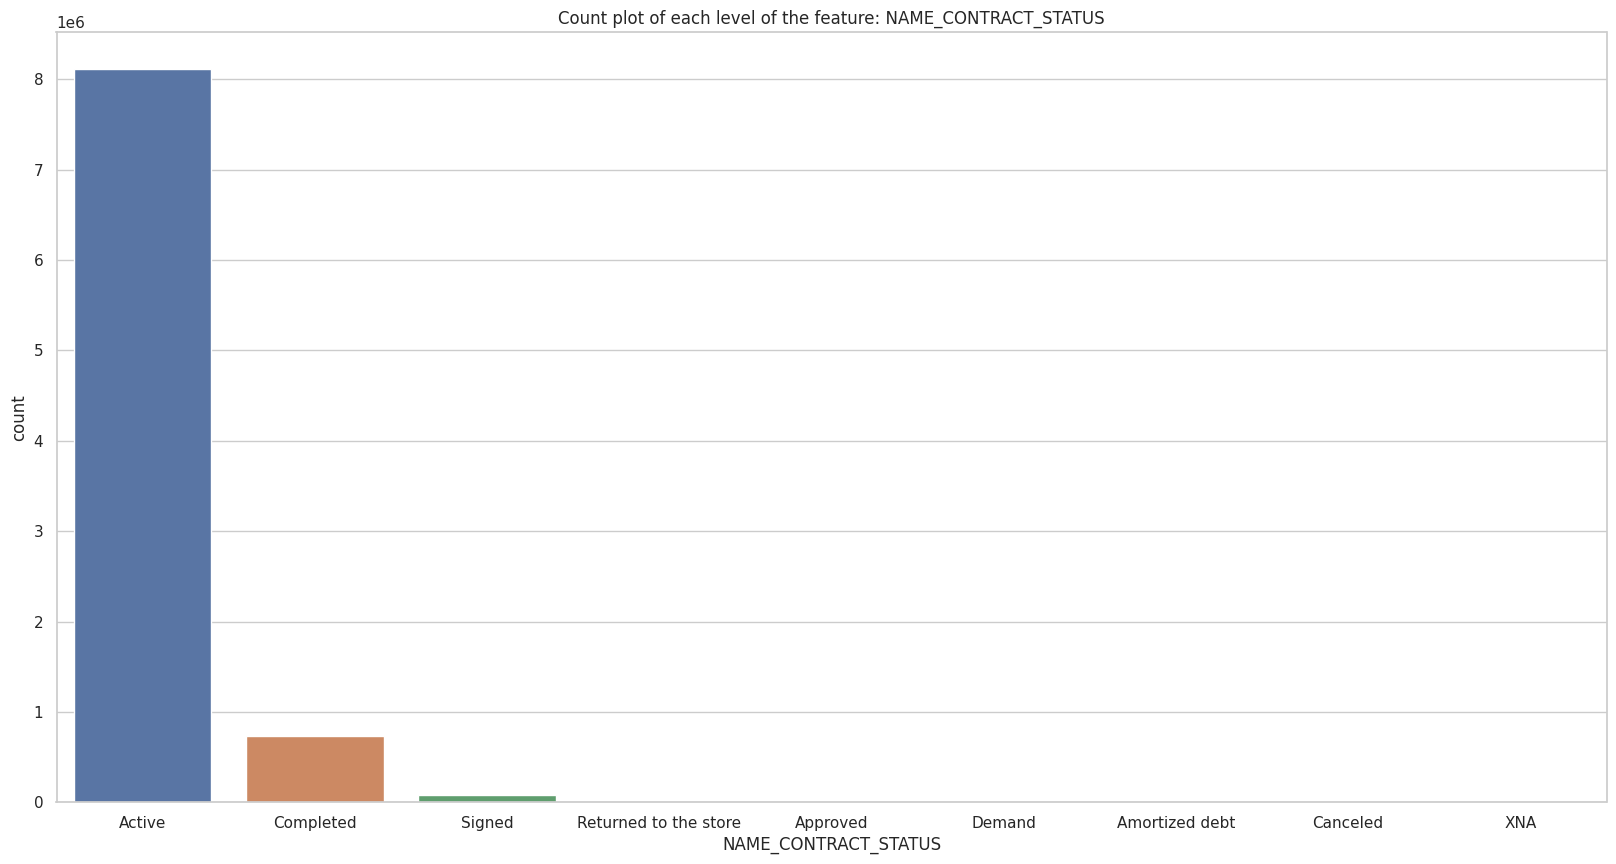

In [ ]:
# Melihat dataset yang berisikan fitur object
fitur_kategori = pos_cash.select_dtypes(["object"]).columns.tolist()

for feature in fitur_kategori:
    fig, ax = plt.subplots(1, 1, sharex = False, sharey = False, figsize = (20, 10))
    # Plot levels distribution
    if pos_cash[feature].nunique() < 10:
        sns.countplot(x = pos_cash[feature], ax = ax, order = pos_cash[feature].value_counts().index.tolist())
    else:
        sns.countplot(y = pos_cash[feature], ax = ax, order = pos_cash[feature].value_counts().index.tolist())
    ax.set_title("Count plot of each level of the feature: " + feature)


In [ ]:
# Melihat outlier menggunakan boxplot
# Membuat box plot
plt.boxplot(pos_cash)

# Menampilkan box plot
plt.show()

In [ ]:
# statistik deskriptif
pos_cash.describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
count  8.944222e+06  8.944222e+06    8.944222e+06    8.944222e+06   
mean   1.902708e+06  2.783527e+05   -3.584750e+01    1.463591e+01   
std    5.359334e+05  1.027671e+05    2.628137e+01    8.143429e+00   
min    1.000001e+06  1.000010e+05   -9.600000e+01    1.000000e+00   
25%    1.434160e+06  1.894470e+05   -5.500000e+01    1.000000e+01   
50%    1.896020e+06  2.785760e+05   -2.900000e+01    1.200000e+01   
75%    2.368641e+06  3.673820e+05   -1.400000e+01    1.800000e+01   
max    2.843499e+06  4.562550e+05   -1.000000e+00    4.500000e+01   

       CNT_INSTALMENT_FUTURE     SK_DPD  SK_DPD_DEF  
count           8.944222e+06  8944222.0   8944222.0  
mean            8.213817e+00        0.0         0.0  
std             6.999504e+00        0.0         0.0  
min             0.000000e+00        0.0         0.0  
25%             3.000000e+00        0.0         0.0  
50%             7.000000e+00        0.0         0.0  
75%             1.200000e+01        0.0         0.0  
max             3.000000e+01        0.0         0.0

<ipython-input-18-bfc3b1f9123f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(pos_cash.corr(), annot = True, square = True)


Text(0.5, 1.0, 'Correlation plot between numerical features')

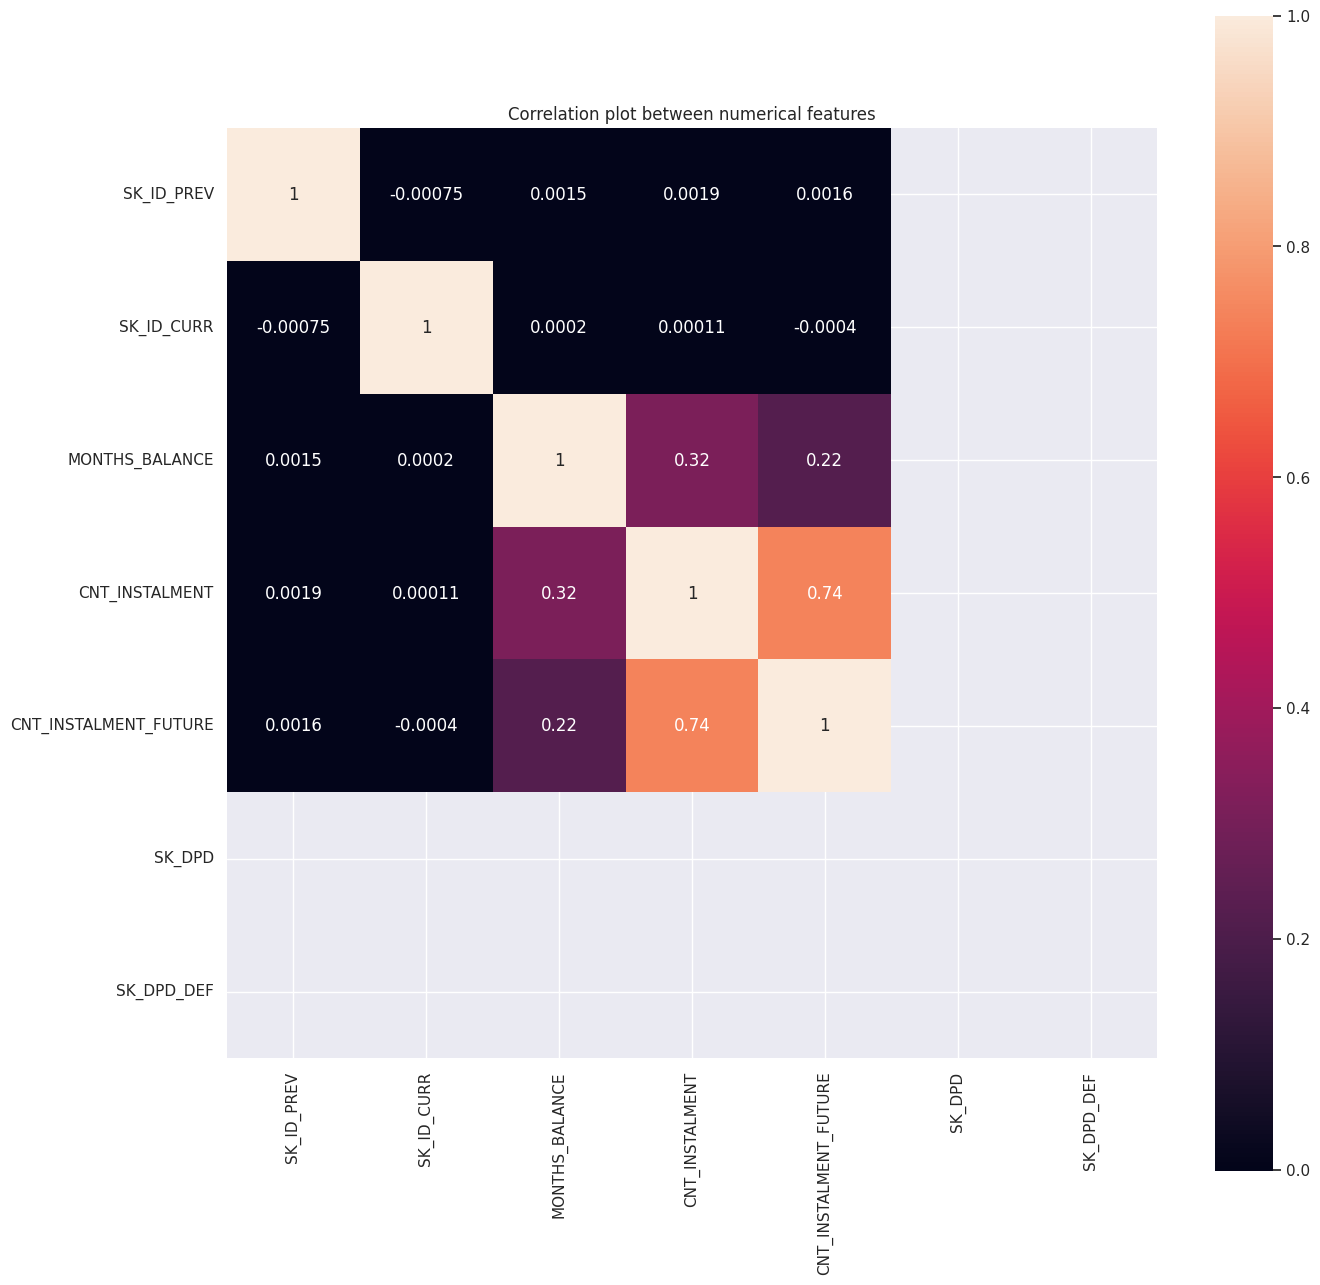

In [ ]:
plt.figure(figsize = (15, 15))
sns.heatmap(pos_cash.corr(), annot = True, square = True)
plt.title("Correlation plot between numerical features")

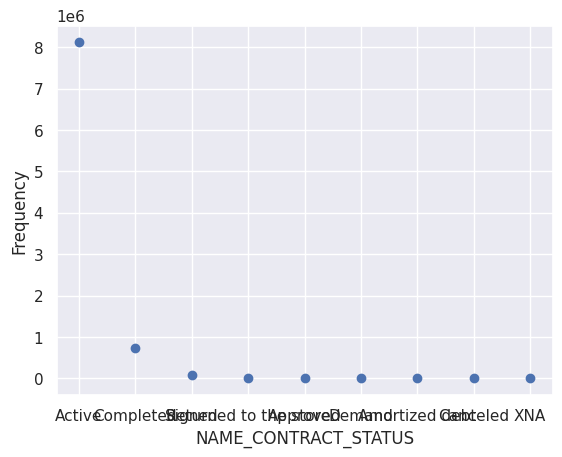

In [ ]:
# Melihat korelasi dengan scatter plot
# Menghitung frekuensi setiap kategori NAME_CONTRACT_STATUS
contract_status_counts = pos_cash['NAME_CONTRACT_STATUS'].value_counts()

# Menyiapkan variabel x dan y
x = contract_status_counts.index
y = contract_status_counts.values

# Membuat scatter plot
plt.scatter(x, y)

# Memberikan label sumbu x dan y
plt.xlabel('NAME_CONTRACT_STATUS')
plt.ylabel('Frequency')

# Menampilkan scatter plot
plt.show()

In [ ]:
# Melihat kembali informasi dari dataset
pos_cash.info(),pos_cash.shape,pos_cash.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8944222 entries, 2 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 614.2+ MB


(None,
 (8944222, 8),
 SK_ID_PREV               0
 SK_ID_CURR               0
 MONTHS_BALANCE           0
 CNT_INSTALMENT           0
 CNT_INSTALMENT_FUTURE    0
 NAME_CONTRACT_STATUS     0
 SK_DPD                   0
 SK_DPD_DEF               0
 dtype: int64)

### **Feature Engineering**

In [ ]:
pos_cash_lastmonth = pos_cash.loc[pos_cash.groupby('SK_ID_PREV')['MONTHS_BALANCE'].idxmax()]


In [ ]:
pos_cash_lastmonth.set_index('SK_ID_CURR')
pos_cash_lastmonth.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
45995       1000001      158271              -8             2.0   
7085917     1000003      252457              -1            12.0   
4078063     1000004      260094             -22             7.0   
7852623     1000005      176456             -46            10.0   
7452784     1000007      256657              -1             6.0   

         CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
45995                      0.0            Completed       0           0  
7085917                    9.0               Active       0           0  
4078063                    0.0            Completed       0           0  
7852623                    0.0            Completed       0           0  
7452784                    2.0               Active       0           0

In [ ]:
pos_cash_lastmonth[pos_cash_lastmonth["SK_ID_CURR"]==100001]

Empty DataFrame
Columns: [SK_ID_PREV, SK_ID_CURR, MONTHS_BALANCE, CNT_INSTALMENT, CNT_INSTALMENT_FUTURE, NAME_CONTRACT_STATUS, SK_DPD, SK_DPD_DEF]
Index: []

In [ ]:
# Feature2 Dummies for "pos_name contract"
pos_cash_lastmonth = pd.get_dummies(pos_cash_lastmonth, prefix='pos_name_contract')

# Feature3 Number of previous loans (SK_ID_PREV) for each SK_ID_CURR
num_prev_loan = pos_cash_lastmonth[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pos_cash_lastmonth['pos_prev_count'] = pos_cash_lastmonth['SK_ID_CURR'].map(num_prev_loan['SK_ID_PREV'])

In [ ]:
pos_cash_lastmonth['CNT_INSTALMENT_ACTIVE']= pos_cash_lastmonth['CNT_INSTALMENT']*pos_cash_lastmonth['pos_name_contract_Active']

In [ ]:
# Feature 4 at the time of application,  for active credits, ratio of future instalments (CNT_INSTALMENT_FUTURE) to total instalment (CNT_INSTALMENT)
pos_cash_lastmonth['Ratio_future_instal_to_total_instalments'] = pos_cash_lastmonth['CNT_INSTALMENT_FUTURE']/pos_cash_lastmonth['CNT_INSTALMENT_ACTIVE']


In [ ]:
pos_cash_lastmonth.head(10)

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
45995       1000001      158271              -8             2.0   
7085917     1000003      252457              -1            12.0   
4078063     1000004      260094             -22             7.0   
7852623     1000005      176456             -46            10.0   
7452784     1000007      256657              -1             6.0   
5060844     1000008      152059             -34             9.0   
4126542     1000011      198678              -3            12.0   
7570406     1000013      215520             -34            12.0   
196320      1000014      361644             -37             8.0   
7800953     1000016      157990             -18             6.0   

         CNT_INSTALMENT_FUTURE  SK_DPD  SK_DPD_DEF  pos_name_contract_Active  \
45995                      0.0       0           0                         0   
7085917                    9.0       0           0                         1   
4078063                    0.0       0           0                         0   
7852623                    0.0       0           0                         0   
7452784                    2.0       0           0                         1   
5060844                    0.0       0           0                         0   
4126542                    0.0       0           0                         0   
7570406                    0.0       0           0                         0   
196320                     0.0       0           0                         0   
7800953                    0.0       0           0                         0   

         pos_name_contract_Amortized debt  pos_name_contract_Approved  \
45995                                   0                           0   
7085917                                 0                           0   
4078063                                 0                           0   
7852623                                 0                           0   
7452784                                 0                           0   
5060844                                 0                           0   
4126542                                 0                           0   
7570406                                 0                           0   
196320                                  0                           0   
7800953                                 0                           0   

         pos_name_contract_Canceled  pos_name_contract_Completed  \
45995                             0                            1   
7085917                           0                            0   
4078063                           0                            1   
7852623                           0                            1   
7452784                           0                            0   
5060844                           0                            1   
4126542                           0                            1   
7570406                           0                            1   
196320                            0                            1   
7800953                           0                            1   

         pos_name_contract_Demand  pos_name_contract_Returned to the store  \
45995                           0                                        0   
7085917                         0                                        0   
4078063                         0                                        0   
7852623                         0                                        0   
7452784                         0                                        0   
5060844                         0                                        0   
4126542                         0                                        0   
7570406                         0                                        0   
196320                          0                                        0   
7800953                         0                        

In [ ]:
pos_cash_final = pos_cash_lastmonth.groupby("SK_ID_CURR")
function_dict = {"MONTHS_BALANCE": "mean",
                 "CNT_INSTALMENT": "sum",
                 "CNT_INSTALMENT_FUTURE": "sum",
                 "CNT_INSTALMENT_ACTIVE": "sum",
                 "SK_DPD": "sum",
                 "SK_DPD_DEF": "sum",
                  "pos_name_contract_Active": "sum",
                 "pos_name_contract_Amortized debt": "sum",
                  "pos_name_contract_Approved": "sum",
                 "pos_name_contract_Canceled": "sum",
                  "pos_name_contract_Completed": "sum",
                 "pos_name_contract_Demand": "sum",
                 "pos_name_contract_Returned to the store": "sum",
                 "pos_name_contract_Signed": "sum",
                  "pos_prev_count": "mean",
                  }
pos_cash_final = pos_cash_final.aggregate(function_dict)
pos_cash_final.reset_index(inplace=True)

In [ ]:
pos_cash_final.shape

(288662, 16)

In [ ]:
pos_cash_final.to_csv('new_pos_cash.csv', index=False)

# **Merging Datasets**

In [ ]:
# # read dataset baru
# # Data train
# !gdown 1PU0CSQVHvTRZujc1ClwyOJWMTK3WYuCT
# # Data bureau
# !gdown 1jgRW-KKRMU5jSJLq-qIPrGUS_o0TB3mg
# # Data credit card
# !gdown 12QzDBAdNMw2gFYlUmw-tpBz85niT9KSm
# # Data installment application
# !gdown 1LgY6bWdGVGJISoZaj0Kg2qgLOkmSmx8I
# # Data pos cash
# !gdwon 1JzZB1AFg7QNQPMkxB2nrCb4laqtOAKOv


Downloading...
From: https://drive.google.com/uc?id=1PU0CSQVHvTRZujc1ClwyOJWMTK3WYuCT
To: /content/new_data_train.csv
100% 114M/114M [00:00<00:00, 199MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jgRW-KKRMU5jSJLq-qIPrGUS_o0TB3mg
To: /content/new_bureau.csv
100% 199M/199M [00:04<00:00, 48.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=12QzDBAdNMw2gFYlUmw-tpBz85niT9KSm
To: /content/new_credit_card_balance.csv
100% 11.5M/11.5M [00:00<00:00, 160MB/s]
Downloading...
From: https://drive.google.com/uc?id=1LgY6bWdGVGJISoZaj0Kg2qgLOkmSmx8I
To: /content/new_installments_payments.csv
100% 29.0M/29.0M [00:00<00:00, 182MB/s]
/bin/bash: gdwon: command not found


In [ ]:
# new_pos_cash = pd.read_csv('new_pos_cash.csv')
# new_pos_cash.shape


(288662, 16)

In [ ]:
# # cek kembali
# new_pos_cash.isna().sum()

SK_ID_CURR                                 0
MONTHS_BALANCE                             0
CNT_INSTALMENT                             0
CNT_INSTALMENT_FUTURE                      0
CNT_INSTALMENT_ACTIVE                      0
SK_DPD                                     0
SK_DPD_DEF                                 0
pos_name_contract_Active                   0
pos_name_contract_Amortized debt           0
pos_name_contract_Approved                 0
pos_name_contract_Canceled                 0
pos_name_contract_Completed                0
pos_name_contract_Demand                   0
pos_name_contract_Returned to the store    0
pos_name_contract_Signed                   0
pos_prev_count                             0
dtype: int64

In [ ]:
# # Melihat data yang duplicate dan outlier
# from prettytable import PrettyTable

# # Define the table headers
# table = PrettyTable()
# table.field_names = ["Variable Name", "Duplicates", "Outliers"]

# # Loop through each column in the dataframe and add information to the table
# for col in new_pos_cash.columns:
#     # Count duplicates
#     duplicates = new_pos_cash.duplicated().sum()

#     # Check for outliers (assuming a normal distribution)
#     if new_pos_cash[col].dtype in ['int64', 'float64']:
#         mean = new_pos_cash[col].mean()
#         std = new_pos_cash[col].std()
#         outliers = ((new_pos_cash[col] - mean).abs() > 3 * std).sum()
#     else:
#         outliers = 'N/A'

#     # Add a row to the table
#     table.add_row([col, duplicates, outliers])

# # Print the table
# print(table)

+-----------------------------------------+------------+----------+
|              Variable Name              | Duplicates | Outliers |
+-----------------------------------------+------------+----------+
|                SK_ID_CURR               |     0      |    0     |
|              MONTHS_BALANCE             |     0      |   1480   |
|              CNT_INSTALMENT             |     0      |   4954   |
|          CNT_INSTALMENT_FUTURE          |     0      |   7730   |
|          CNT_INSTALMENT_ACTIVE          |     0      |   3940   |
|                  SK_DPD                 |     0      |    0     |
|                SK_DPD_DEF               |     0      |    0     |
|         pos_name_contract_Active        |     0      |   5980   |
|     pos_name_contract_Amortized debt    |     0      |    3     |
|        pos_name_contract_Approved       |     0      |   117    |
|        pos_name_contract_Canceled       |     0      |    2     |
|       pos_name_contract_Completed       |     

## Dataset Setelah Merging

In [ ]:
!gdown 1-v7TAgulgRWajU-CPnQSC1Di8N696xSw

Downloading...
From: https://drive.google.com/uc?id=1-v7TAgulgRWajU-CPnQSC1Di8N696xSw
To: /content/data_fixx_pake_banget.csv
100% 216M/216M [00:00<00:00, 232MB/s]


In [ ]:
# Membaca dan menampilkan data setelah dilakukan merging
data = pd.read_csv('data_fixx_pake_banget.csv')
print("Jumlah baris : ",data.shape[0])
print("Jumlah kolom : ",data.shape[1])
data.head()

Jumlah baris :  307511
Jumlah kolom :  136


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100004       0      Revolving loans           M            Y   
3      100006       0           Cash loans           F            N   
4      100007       0           Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               Y             0           67500.0      135000.0   
3               Y             0          135000.0      312682.5   
4               Y             0          121500.0      513000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2         6750.0           135000.0     Unaccompanied          Working   
3        29686.5           297000.0     Unaccompanied          Working   
4        21865.5           513000.0     Unaccompanied          Working   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461        Laborers              1.0                     2   
1      -16765      Core staff              2.0                     1   
2      -19046        Laborers              1.0                     2   
3      -19005        Laborers              2.0                     2   
4      -19932      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  EXT_SOURCE_1  \
0                            2                    WEDNESDAY      0.083037   
1                            1                       MONDAY      0.311267   
2                            2                       MONDAY           NaN   
3                            2                    WEDNESDAY           NaN   
4                            2                     THURSDAY           NaN   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246           NaN                       1.0   
2      0.555912      0.729567                       0.0   
3      0.650442           NaN                       2.0   
4      0.322738           NaN                       0.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   

   DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                       2.0                0                1   
1                       0.0                0                1   
2                       0.0                0                0   
3                       0.0                0                1   
4                       0.0                0                0   

   FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  \
0                0                0                0                0   
1                0                0                0                0   
2                0                0                0                0   
3     

In [ ]:
# Melakukan check missing value
cols_missing = data.isnull().sum() * 100 / data.shape[0]
cols_missing[cols_missing > 0].sort_values(ascending=False)

CNT_DRAWINGS_CURRENT            100.000000
AMT_RECIVABLE                   100.000000
AMT_DRAWINGS_ATM_CURRENT        100.000000
AMT_DRAWINGS_CURRENT            100.000000
AMT_DRAWINGS_OTHER_CURRENT      100.000000
AMT_DRAWINGS_POS_CURRENT        100.000000
AMT_PAYMENT_CURRENT             100.000000
AMT_PAYMENT_TOTAL_CURRENT       100.000000
AMT_RECEIVABLE_PRINCIPAL        100.000000
AMT_TOTAL_RECEIVABLE            100.000000
AMT_BALANCE                     100.000000
CNT_DRAWINGS_ATM_CURRENT        100.000000
CNT_DRAWINGS_OTHER_CURRENT      100.000000
CNT_DRAWINGS_POS_CURRENT        100.000000
CNT_INSTALMENT_MATURE_CUM       100.000000
NAME_CONTRACT_STATUS_y          100.000000
SK_DPD_y                        100.000000
SK_DPD_DEF_y                    100.000000
AMT_CREDIT_LIMIT_ACTUAL         100.000000
AMT_INST_MIN_REGULARITY         100.000000
RATE_INTEREST_PRIVILEGED         99.469938
RATE_INTEREST_PRIMARY            99.469938
AMT_CREDIT_MAX_OVERDUE           79.336024
MONTHS_BALA

In [ ]:
# Melakukan penghapusan fitur yang missing value >= 50%
cols_drop = [
'CNT_DRAWINGS_CURRENT',
'AMT_RECIVABLE',
'AMT_DRAWINGS_ATM_CURRENT',
'AMT_DRAWINGS_CURRENT',
'AMT_DRAWINGS_OTHER_CURRENT',
'AMT_DRAWINGS_POS_CURRENT',
'AMT_PAYMENT_CURRENT',
'AMT_PAYMENT_TOTAL_CURRENT',
'AMT_RECEIVABLE_PRINCIPAL',
'AMT_TOTAL_RECEIVABLE',
'AMT_BALANCE',
'CNT_DRAWINGS_ATM_CURRENT',
'CNT_DRAWINGS_OTHER_CURRENT',
'CNT_DRAWINGS_POS_CURRENT',
'CNT_INSTALMENT_MATURE_CUM',
'NAME_CONTRACT_STATUS_y',
'SK_DPD_y',
'SK_DPD_DEF_y',
'AMT_CREDIT_LIMIT_ACTUAL',
'AMT_INST_MIN_REGULARITY',
'RATE_INTEREST_PRIVILEGED',
'RATE_INTEREST_PRIMARY',
'AMT_CREDIT_MAX_OVERDUE',
'MONTHS_BALANCE_x',
'STATUS',
'EXT_SOURCE_1',
'NAME_TYPE_SUITE_y'
]

In [ ]:
# Menampilkan dataset setelah missing value didrop
data.drop(columns=cols_drop, inplace=True)
data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100004       0      Revolving loans           M            Y   
3      100006       0           Cash loans           F            N   
4      100007       0           Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               Y             0           67500.0      135000.0   
3               Y             0          135000.0      312682.5   
4               Y             0          121500.0      513000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2         6750.0           135000.0     Unaccompanied          Working   
3        29686.5           297000.0     Unaccompanied          Working   
4        21865.5           513000.0     Unaccompanied          Working   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461        Laborers              1.0                     2   
1      -16765      Core staff              2.0                     1   
2      -19046        Laborers              1.0                     2   
3      -19005        Laborers              2.0                     2   
4      -19932      Core staff              1.0                     2   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  EXT_SOURCE_2  \
0                            2                    WEDNESDAY      0.262949   
1                            1                       MONDAY      0.622246   
2                            2                       MONDAY      0.555912   
3                            2                    WEDNESDAY      0.650442   
4                            2                     THURSDAY      0.322738   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.139376                       2.0                       2.0   
1           NaN                       1.0                       0.0   
2      0.729567                       0.0                       0.0   
3           NaN                       2.0                       0.0   
4           NaN                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_2  \
0                       2.0                       2.0                0   
1                       1.0                       0.0                0   
2                       0.0                       0.0                0   
3                       2.0                       0.0                0   
4                       0.0                       0.0                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   
3                1                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0 

In [ ]:
# Melihat baris dan kolom dataset setelah drop missing value
data.shape

(307511, 109)

In [ ]:
# Melakukan check missing value
cols_missing = data.isnull().sum() * 100 / data.shape[0]
cols_missing[cols_missing > 0].sort_values(ascending=False)

DAYS_ENDDATE_FACT               41.943865
AMT_DOWN_PAYMENT                41.934110
RATE_DOWN_PAYMENT               41.934110
AMT_CREDIT_SUM_LIMIT            36.322603
OCCUPATION_TYPE                 31.345545
NFLAG_INSURED_ON_APPROVAL       30.292575
DAYS_TERMINATION                30.292575
DAYS_LAST_DUE                   30.292575
DAYS_LAST_DUE_1ST_VERSION       30.292575
DAYS_FIRST_DUE                  30.292575
DAYS_FIRST_DRAWING              30.292575
AMT_CREDIT_SUM_DEBT             21.313384
AMT_GOODS_PRICE_y               20.133914
EXT_SOURCE_3                    19.825307
AMT_ANNUITY_y                   19.255571
CNT_PAYMENT                     19.254596
DAYS_CREDIT_ENDDATE             16.655339
AMT_CREDIT_SUM                  14.315585
CREDIT_DAY_OVERDUE              14.314935
CNT_CREDIT_PROLONG              14.314935
DAYS_CREDIT                     14.314935
CREDIT_ACTIVE                   14.314935
AMT_CREDIT_SUM_OVERDUE          14.314935
CREDIT_TYPE                     14

In [ ]:
# # Melihat data yang duplicate dan outlier
# from prettytable import PrettyTable

# # Define the table headers
# table = PrettyTable()
# table.field_names = ["Variable Name", "Duplicates", "Outliers"]

# # Loop through each column in the dataframe and add information to the table
# for col in data.columns:
#     # Count duplicates
#     duplicates = data.duplicated().sum()

#     # Check for outliers (assuming a normal distribution)
#     if data[col].dtype in ['int64', 'float64']:
#         mean = data[col].mean()
#         std = data[col].std()
#         outliers = ((data[col] - mean).abs() > 3 * std).sum()
#     else:
#         outliers = 'N/A'

#     # Add a row to the table
#     table.add_row([col, duplicates, outliers])

# # Print the table
# print(table)

In [ ]:
# Menampilkan fitur yang memiliki missing value
fitur_missing = cols_missing[cols_missing > 0].index.tolist()
print(fitur_missing)

['AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE', 'SK_ID_PREV_x', 'MONTHS_BALANCE_y', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS_x', 'SK_DPD_x', 'SK_DPD_DEF_x', 'SK_ID_PREV_y', 'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y', 'WEEKDAY_APPR_PROCESS_START_y', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME

In [ ]:
# Menampilkan fitur numerik yang missing value
fitur_numerik = [kolom for kolom in data.select_dtypes(include=['integer', 'float']).columns if kolom in fitur_missing]
print(fitur_numerik)

['AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'SK_ID_BUREAU', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'DAYS_CREDIT_UPDATE', 'SK_ID_PREV_x', 'MONTHS_BALANCE_y', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE', 'SK_DPD_x', 'SK_DPD_DEF_x', 'SK_ID_PREV_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y', 'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL', 'SK_ID_PREV', 'NUM_INSTALMENT_VERSION', 'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS

In [ ]:
# Melakukan handle fitur numerik yang missing value dengan mean
mean = data['EXT_SOURCE_2'].mean()
mean1 = data['EXT_SOURCE_3'].mean()
mean2 = data['DAYS_CREDIT'].mean()
mean3 = data['SK_ID_BUREAU'].mean()
mean4 = data['DAYS_ENDDATE_FACT'].mean()
mean5 = data['SK_ID_PREV_x'].mean()
mean6 = data['MONTHS_BALANCE_y'].mean()
mean7 = data['SK_ID_PREV_y'].mean()
mean8 = data['DAYS_DECISION'].mean()
mean9 = data['DAYS_LAST_DUE'].mean()
mean10 = data['DAYS_TERMINATION'].mean()
mean11 = data['NFLAG_INSURED_ON_APPROVAL'].mean()
mean12 = data['SK_ID_PREV'].mean()
mean13 = data['DAYS_INSTALMENT'].mean()
mean14 = data['DAYS_ENTRY_PAYMENT'].mean()


data['EXT_SOURCE_2'] = data['EXT_SOURCE_2'].fillna(mean)
data['EXT_SOURCE_3'] = data['EXT_SOURCE_3'].fillna(mean1)
data['DAYS_CREDIT'] = data['DAYS_CREDIT'].fillna(mean2)
data['SK_ID_BUREAU'] = data['SK_ID_BUREAU'].fillna(mean3)
data['DAYS_ENDDATE_FACT'] = data['DAYS_ENDDATE_FACT'].fillna(mean4)
data['SK_ID_PREV_x'] = data['SK_ID_PREV_x'].fillna(mean5)
data['MONTHS_BALANCE_y'] = data['MONTHS_BALANCE_y'].fillna(mean6)
data['SK_ID_PREV_y'] = data['SK_ID_PREV_y'].fillna(mean7)
data['DAYS_DECISION'] = data['DAYS_DECISION'].fillna(mean8)
data['DAYS_LAST_DUE'] = data['DAYS_LAST_DUE'].fillna(mean9)
data['DAYS_TERMINATION'] = data['DAYS_TERMINATION'].fillna(mean10)
data['NFLAG_INSURED_ON_APPROVAL'] = data['NFLAG_INSURED_ON_APPROVAL'].fillna(mean11)
data['SK_ID_PREV'] = data['SK_ID_PREV'].fillna(mean12)
data['DAYS_INSTALMENT'] = data['DAYS_INSTALMENT'].fillna(mean13)
data['DAYS_ENTRY_PAYMENT'] = data['DAYS_ENTRY_PAYMENT'].fillna(mean14)


In [ ]:
# Melakukan handle fitur numerik yang missing value dengan median
median = data['AMT_ANNUITY_x'].median()
median1 = data['AMT_GOODS_PRICE_x'].median()
median2 = data['CNT_FAM_MEMBERS'].median()
median3 = data['OBS_30_CNT_SOCIAL_CIRCLE'].median()
median4 = data['DEF_30_CNT_SOCIAL_CIRCLE'].median()
median5 = data['OBS_60_CNT_SOCIAL_CIRCLE'].median()
median6 = data['DEF_60_CNT_SOCIAL_CIRCLE'].median()
median7 = data['CREDIT_DAY_OVERDUE'].median()
median8 = data['DAYS_CREDIT_ENDDATE'].median()
median9 = data['CNT_CREDIT_PROLONG'].median()
median10 = data['AMT_CREDIT_SUM'].median()
median11 = data['AMT_CREDIT_SUM_DEBT'].median()
median12 = data['AMT_CREDIT_SUM_LIMIT'].median()
median13 = data['AMT_CREDIT_SUM_OVERDUE'].median()
median14 = data['DAYS_CREDIT_UPDATE'].median()
median15 = data['CNT_INSTALMENT'].median()
median16 = data['CNT_INSTALMENT_FUTURE'].median()
median17 = data['SK_DPD_x'].median()
median18 = data['SK_DPD_DEF_x'].median()
median19 = data['AMT_ANNUITY_y'].median()
median20 = data['AMT_APPLICATION'].median()
median21 = data['AMT_CREDIT_y'].median()
median22 = data['AMT_DOWN_PAYMENT'].median()
median23 = data['AMT_GOODS_PRICE_y'].median()
median24 = data['HOUR_APPR_PROCESS_START'].median()
median25 = data['NFLAG_LAST_APPL_IN_DAY'].median()
median26 = data['RATE_DOWN_PAYMENT'].median()
median27 = data['SELLERPLACE_AREA'].median()
median28 = data['CNT_PAYMENT'].median()
median29 = data['DAYS_FIRST_DRAWING'].median()
median30 = data['DAYS_FIRST_DUE'].median()
median31 = data['DAYS_LAST_DUE_1ST_VERSION'].median()
median32 = data['NUM_INSTALMENT_VERSION'].median()
median33 = data['NUM_INSTALMENT_NUMBER'].median()
median34 = data['AMT_INSTALMENT'].median()
median35 = data['AMT_PAYMENT'].median()

data['AMT_ANNUITY_x'] = data['AMT_ANNUITY_x'].fillna(median)
data['AMT_GOODS_PRICE_x'] = data['AMT_GOODS_PRICE_x'].fillna(median1)
data['CNT_FAM_MEMBERS'] = data['CNT_FAM_MEMBERS'].fillna(median2)
data['OBS_30_CNT_SOCIAL_CIRCLE'] = data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(median3)
data['DEF_30_CNT_SOCIAL_CIRCLE'] = data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(median4)
data['OBS_60_CNT_SOCIAL_CIRCLE'] = data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(median5)
data['DEF_60_CNT_SOCIAL_CIRCLE'] = data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(median6)
data['CREDIT_DAY_OVERDUE'] = data['CREDIT_DAY_OVERDUE'].fillna(median7)
data['DAYS_CREDIT_ENDDATE'] = data['DAYS_CREDIT_ENDDATE'].fillna(median8)
data['CNT_CREDIT_PROLONG'] = data['CNT_CREDIT_PROLONG'].fillna(median9)
data['AMT_CREDIT_SUM'] = data['AMT_CREDIT_SUM'].fillna(median10)
data['AMT_CREDIT_SUM_DEBT'] = data['AMT_CREDIT_SUM_DEBT'].fillna(median11)
data['AMT_CREDIT_SUM_LIMIT'] = data['AMT_CREDIT_SUM_LIMIT'].fillna(median12)
data['AMT_CREDIT_SUM_OVERDUE'] = data['AMT_CREDIT_SUM_OVERDUE'].fillna(median13)
data['DAYS_CREDIT_UPDATE'] = data['DAYS_CREDIT_UPDATE'].fillna(median14)
data['CNT_INSTALMENT'] = data['CNT_INSTALMENT'].fillna(median15)
data['CNT_INSTALMENT_FUTURE'] = data['CNT_INSTALMENT_FUTURE'].fillna(median16)
data['SK_DPD_x'] = data['SK_DPD_x'].fillna(median17)
data['SK_DPD_DEF_x'] = data['SK_DPD_DEF_x'].fillna(median18)
data['AMT_ANNUITY_y'] = data['AMT_ANNUITY_y'].fillna(median19)
data['AMT_APPLICATION'] = data['AMT_APPLICATION'].fillna(median20)
data['AMT_CREDIT_y'] = data['AMT_CREDIT_y'].fillna(median21)
data['AMT_DOWN_PAYMENT'] = data['AMT_DOWN_PAYMENT'].fillna(median22)
data['AMT_GOODS_PRICE_y'] = data['AMT_GOODS_PRICE_y'].fillna(median23)
data['HOUR_APPR_PROCESS_START'] = data['HOUR_APPR_PROCESS_START'].fillna(median24)
data['NFLAG_LAST_APPL_IN_DAY'] = data['NFLAG_LAST_APPL_IN_DAY'].fillna(median25)
data['RATE_DOWN_PAYMENT'] = data['RATE_DOWN_PAYMENT'].fillna(median26)
data['SELLERPLACE_AREA'] = data['SELLERPLACE_AREA'].fillna(median27)
data['CNT_PAYMENT'] = data['CNT_PAYMENT'].fillna(median28)
data['DAYS_FIRST_DRAWING'] = data['DAYS_FIRST_DRAWING'].fillna(median29)
data['DAYS_FIRST_DUE'] = data['DAYS_FIRST_DUE'].fillna(median30)
data['DAYS_LAST_DUE_1ST_VERSION'] = data['DAYS_LAST_DUE_1ST_VERSION'].fillna(median31)
data['NUM_INSTALMENT_VERSION'] = data['NUM_INSTALMENT_VERSION'].fillna(median32)
data['NUM_INSTALMENT_NUMBER'] = data['NUM_INSTALMENT_NUMBER'].fillna(median33)
data['AMT_INSTALMENT'] = data['AMT_INSTALMENT'].fillna(median34)
data['AMT_PAYMENT'] = data['AMT_PAYMENT'].fillna(median35)


In [ ]:
# Melakukan check missing value
cols_missing = data.isnull().sum() * 100 / data.shape[0]
cols_missing[cols_missing > 0].sort_values(ascending=False)

OCCUPATION_TYPE                 31.345545
CREDIT_ACTIVE                   14.314935
CREDIT_CURRENCY                 14.314935
CREDIT_TYPE                     14.314935
NAME_CONTRACT_STATUS_x           5.875237
PRODUCT_COMBINATION              5.366312
NAME_CLIENT_TYPE                 5.350703
NAME_YIELD_GROUP                 5.350703
NAME_SELLER_INDUSTRY             5.350703
CHANNEL_TYPE                     5.350703
NAME_PRODUCT_TYPE                5.350703
NAME_PORTFOLIO                   5.350703
NAME_GOODS_CATEGORY              5.350703
NAME_CONTRACT_STATUS             5.350703
CODE_REJECT_REASON               5.350703
NAME_PAYMENT_TYPE                5.350703
NAME_CASH_LOAN_PURPOSE           5.350703
FLAG_LAST_APPL_PER_CONTRACT      5.350703
WEEKDAY_APPR_PROCESS_START_y     5.350703
NAME_CONTRACT_TYPE_y             5.350703
NAME_TYPE_SUITE_x                0.420148
dtype: float64

In [ ]:
# Mengisi nilai missing value dengan modus
data['OCCUPATION_TYPE'].fillna(data['OCCUPATION_TYPE'].mode()[0], inplace=True)
data['CREDIT_ACTIVE'].fillna(data['CREDIT_ACTIVE'].mode()[0], inplace=True)
data['CREDIT_CURRENCY'].fillna(data['CREDIT_CURRENCY'].mode()[0], inplace=True)
data['CREDIT_TYPE'].fillna(data['CREDIT_TYPE'].mode()[0], inplace=True)
data['NAME_CONTRACT_STATUS_x'].fillna(data['NAME_CONTRACT_STATUS_x'].mode()[0], inplace=True)
data['PRODUCT_COMBINATION'].fillna(data['PRODUCT_COMBINATION'].mode()[0], inplace=True)
data['NAME_CLIENT_TYPE'].fillna(data['NAME_CLIENT_TYPE'].mode()[0], inplace=True)
data['NAME_YIELD_GROUP'].fillna(data['NAME_YIELD_GROUP'].mode()[0], inplace=True)
data['NAME_SELLER_INDUSTRY'].fillna(data['NAME_SELLER_INDUSTRY'].mode()[0], inplace=True)
data['CHANNEL_TYPE'].fillna(data['CHANNEL_TYPE'].mode()[0], inplace=True)
data['NAME_PRODUCT_TYPE'].fillna(data['NAME_PRODUCT_TYPE'].mode()[0], inplace=True)
data['NAME_PORTFOLIO'].fillna(data['NAME_PORTFOLIO'].mode()[0], inplace=True)
data['NAME_GOODS_CATEGORY'].fillna(data['NAME_GOODS_CATEGORY'].mode()[0], inplace=True)
data['NAME_CONTRACT_STATUS'].fillna(data['NAME_CONTRACT_STATUS'].mode()[0], inplace=True)
data['CODE_REJECT_REASON'].fillna(data['CODE_REJECT_REASON'].mode()[0], inplace=True)
data['NAME_PAYMENT_TYPE'].fillna(data['NAME_PAYMENT_TYPE'].mode()[0], inplace=True)
data['NAME_CASH_LOAN_PURPOSE'].fillna(data['NAME_CASH_LOAN_PURPOSE'].mode()[0], inplace=True)
data['FLAG_LAST_APPL_PER_CONTRACT'].fillna(data['FLAG_LAST_APPL_PER_CONTRACT'].mode()[0], inplace=True)
data['WEEKDAY_APPR_PROCESS_START_y'].fillna(data['WEEKDAY_APPR_PROCESS_START_y'].mode()[0], inplace=True)
data['NAME_CONTRACT_TYPE_y'].fillna(data['NAME_CONTRACT_TYPE_y'].mode()[0], inplace=True)
data['NAME_TYPE_SUITE_x'].fillna(data['NAME_TYPE_SUITE_x'].mode()[0], inplace=True)


In [ ]:
# Melihat apakah dataset masih ada missing value
data.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY_x                   0
AMT_GOODS_PRICE_x               0
NAME_TYPE_SUITE_x               0
NAME_INCOME_TYPE                0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
WEEKDAY_APPR_PROCESS_START_x    0
EXT_SOURCE_2                    0
EXT_SOURCE_3                    0
OBS_30_CNT_SOCIAL_CIRCLE        0
DEF_30_CNT_SOCIAL_CIRCLE        0
OBS_60_CNT_SOCIAL_CIRCLE        0
DEF_60_CNT_SOCIAL_CIRCLE        0
FLAG_DOCUMENT_2                 0
FLAG_DOCUMENT_

In [ ]:
# Menampilkan dataset
data.head(10)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100004       0      Revolving loans           M            Y   
3      100006       0           Cash loans           F            N   
4      100007       0           Cash loans           M            N   
5      100008       0           Cash loans           M            N   
6      100009       0           Cash loans           F            Y   
7      100010       0           Cash loans           M            Y   
8      100011       0           Cash loans           F            N   
9      100012       0      Revolving loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               Y             0           67500.0      135000.0   
3               Y             0          135000.0      312682.5   
4               Y             0          121500.0      513000.0   
5               Y             0           99000.0      490495.5   
6               Y             1          171000.0     1560726.0   
7               Y             0          360000.0     1530000.0   
8               Y             0          112500.0     1019610.0   
9               Y             0          135000.0      405000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x      NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied               Working   
1        35698.5          1129500.0            Family         State servant   
2         6750.0           135000.0     Unaccompanied               Working   
3        29686.5           297000.0     Unaccompanied               Working   
4        21865.5           513000.0     Unaccompanied               Working   
5        27517.5           454500.0   Spouse, partner         State servant   
6        41301.0          1395000.0     Unaccompanied  Commercial associate   
7        42075.0          1530000.0     Unaccompanied         State servant   
8        33826.5           913500.0          Children             Pensioner   
9        20250.0           405000.0     Unaccompanied               Working   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   
6               Married  House / apartment                    0.035792   
7               Married  House / apartment                    0.003122   
8               Married  House / apartment                    0.018634   
9  Single / not married  House / apartment                    0.019689   

   DAYS_BIRTH OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0       -9461        Laborers              1.0                     2   
1      -16765      Core staff              2.0                     1   
2      -19046        Laborers              1.0                     2   
3      -19005        Laborers              2.0                     2   
4      -19932      Core staff              1.0                     2   
5      -16941        Laborers              2.0                     2   
6      -13778     Accountants              3.0                     2   
7      -18850        Managers              2.0                     3   
8      -20099        Laborers              2.0                     2   
9      -14469        Laborers              1.0                     2   

   RE

In [ ]:
# Menampilkan fitur kategori
fitur_kategori = [kolom for kolom in data.select_dtypes(include=['object'])]
print(fitur_kategori)

['NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE', 'NAME_CONTRACT_STATUS_x', 'NAME_CONTRACT_TYPE_y', 'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']


In [ ]:
# Memberikan label kepada data yang bertipe object
data = pd.get_dummies(data, columns=fitur_kategori)


In [ ]:
# Menampilkan dataset setelah one hot encoder
data.head(10)

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0      100002       1             0          202500.0      406597.5   
1      100003       0             0          270000.0     1293502.5   
2      100004       0             0           67500.0      135000.0   
3      100006       0             0          135000.0      312682.5   
4      100007       0             0          121500.0      513000.0   
5      100008       0             0           99000.0      490495.5   
6      100009       0             1          171000.0     1560726.0   
7      100010       0             0          360000.0     1530000.0   
8      100011       0             0          112500.0     1019610.0   
9      100012       0             0          135000.0      405000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0        24700.5           351000.0                    0.018801       -9461   
1        35698.5          1129500.0                    0.003541      -16765   
2         6750.0           135000.0                    0.010032      -19046   
3        29686.5           297000.0                    0.008019      -19005   
4        21865.5           513000.0                    0.028663      -19932   
5        27517.5           454500.0                    0.035792      -16941   
6        41301.0          1395000.0                    0.035792      -13778   
7        42075.0          1530000.0                    0.003122      -18850   
8        33826.5           913500.0                    0.018634      -20099   
9        20250.0           405000.0                    0.019689      -14469   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              1.0                     2                            2   
3              2.0                     2                            2   
4              1.0                     2                            2   
5              2.0                     2                            2   
6              3.0                     2                            2   
7              2.0                     3                            3   
8              2.0                     2                            2   
9              1.0                     2                            2   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246      0.510853                       1.0   
2      0.555912      0.729567                       0.0   
3      0.650442      0.510853                       2.0   
4      0.322738      0.510853                       0.0   
5      0.354225      0.621226                       0.0   
6      0.724000      0.492060                       1.0   
7      0.714279      0.540654                       2.0   
8      0.205747      0.751724                       1.0   
9      0.746644      0.510853                       2.0   

   DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       2.0   
4                       0.0                       0.0   
5                       0.0                       0.0   
6                       0.0                       1.0   
7                       0.0                       2.0   
8                       0.0                       1.0   
9                       0.0                       2.0   

   DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  \
0                       2.0                0                1   
1                       0.0                0                1   
2                       0.0                0                0   
3        

In [ ]:
# Melihat jumlah baris dan kolom dataset
data.shape

(307511, 302)

In [ ]:
# Melihat jumlah target yang churn dan tidak churn
churn_count = data['TARGET'].value_counts()
print(churn_count)

0    282686
1     24825
Name: TARGET, dtype: int64


In [ ]:
# Mengatasi data imbalance
from imblearn.under_sampling import RandomUnderSampler

# Memisahkan fitur dan target
X = data.drop('TARGET', axis=1)
y = data['TARGET']

# Menerapkan oversampling dengan SMOTE
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Melihat jumlah sampel setelah oversampling
print("Jumlah sampel setelah oversampling:")
print(y_resampled.value_counts())


Jumlah sampel setelah oversampling:
0    24825
1    24825
Name: TARGET, dtype: int64


In [ ]:
# Menggabungkan fitur dan target yang telah diundersample
undersampled_df = pd.concat([X_resampled, y_resampled], axis=1)

# Mengacak dataset yang telah diundersample
data_final = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Menampilkan dataset setelah undersampling
print("Dataset setelah undersampling:")
data_final.head(50)


Dataset setelah undersampling:


SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0       343403             0           90000.0      454500.0        25375.5   
1       239949             0           72000.0      296280.0        16069.5   
2       340073             0           99000.0      284400.0        18643.5   
3       442204             0          112500.0      308133.0        16843.5   
4       443323             0          450000.0      503266.5        57046.5   
5       443800             0           85500.0      860634.0        27891.0   
6       390863             1          202500.0      367389.0        24984.0   
7       331967             1          540000.0      916470.0        32598.0   
8       243360             0          112500.0      757597.5        42430.5   
9       445763             1          234000.0       74628.0         8037.0   
10      134768             0           67500.0      187704.0        14958.0   
11      445587             1          157500.0      405000.0        19696.5   
12      282451             0           81000.0      225000.0        10039.5   
13      401703             1          202500.0      450000.0        12375.0   
14      335595             0           67500.0      765000.0        25281.0   
15      239027             1          193500.0      545040.0        30564.0   
16      127801             0           78750.0      414792.0        28188.0   
17      224124             0          157500.0      454500.0        21865.5   
18      109166             2          225000.0      247500.0        12375.0   
19      349783             0           90000.0      729792.0        26343.0   
20      170866             1          184500.0      612612.0        26086.5   
21      139310             0          202500.0     1575000.0        49585.5   
22      181573             2          157500.0      450000.0        24543.0   
23      253428             0          675000.0     1187370.0       115803.0   
24      373003             1          180000.0     1350000.0        46926.0   
25      116252             0          157500.0     1223010.0        48631.5   
26      151011             0          216000.0      568908.0        25186.5   
27      260503             0          112500.0      108000.0        11758.5   
28      148312             2          112500.0      515529.0        27121.5   
29      358105             1          108000.0      256500.0        25497.0   
30      244369             1          193500.0      521280.0        25209.0   
31      175632             0          112500.0      380533.5        15219.0   
32      321205             0          108000.0      528633.0        22396.5   
33      147274             0           90000.0      225000.0        11250.0   
34      255960             0          114750.0      182016.0         6988.5   
35      170974             0          112500.0      311877.0        15133.5   
36      120998             0          171000.0      585000.0        21010.5   
37      251269             0          166500.0      495351.0        26518.5   
38      356496             2          180000.0      810000.0        31653.0   
39      193337             0          157500.0      450000.0        41274.0   
40      231672             2          180000.0      619254.0        27405.0   
41      202901             0          157500.0      270000.0        14778.0   
42      285143             2           90000.0      202500.0        10125.0   
43      309878             0          112500.0      180000.0         9000.0   
44      409436             0          112500.0      364896.0        22180.5   
45      104414             0          157500.0      675000.0        76473.0   
46      122595             0          171000.0     1206000.0        31810.5   
47      252103             0          265500.0      539100.0        29376.0   
48      185273             1          175500.0      270000.0        21460.5   
49      116160             0          225000.0      45

In [ ]:
# Melihat jumlah target yang churn dan tidak churn
churn_count = data_final['TARGET'].value_counts()
print(churn_count)

0    24825
1    24825
Name: TARGET, dtype: int64


In [ ]:
# Drop ID
data_final.drop(['SK_ID_CURR', 'SK_ID_BUREAU', 'SK_ID_PREV', 'SK_ID_PREV_x', 'SK_ID_PREV_y'], axis=1, inplace=True)

In [ ]:
data_final.head()

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0             0           90000.0      454500.0        25375.5   
1             0           72000.0      296280.0        16069.5   
2             0           99000.0      284400.0        18643.5   
3             0          112500.0      308133.0        16843.5   
4             0          450000.0      503266.5        57046.5   

   AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  CNT_FAM_MEMBERS  \
0           454500.0                    0.026392      -22070              2.0   
1           225000.0                    0.035792      -18732              1.0   
2           225000.0                    0.007120      -11559              2.0   
3           234000.0                    0.025164      -12821              2.0   
4           463500.0                    0.006629      -12117              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2  \
0                     2                            2      0.739880   
1                     2                            2      0.710884   
2                     2                            2      0.586182   
3                     2                            2      0.474319   
4                     2                            2      0.528323   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.753067                       1.0                       1.0   
1      0.510853                       0.0                       0.0   
2      0.235311                       0.0                       0.0   
3      0.510853                       1.0                       0.0   
4      0.723837                       3.0                       2.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_2  \
0                       1.0                       1.0                0   
1                       0.0                       0.0                0   
2                       0.0                       0.0                0   
3                       1.0                       0.0                0   
4                       3.0                       2.0                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                1                0                0                0   
3                1                0                0                0   
4                1                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0                0                0                 0   
3                0                0                0                 0   
4                0                0                0                 0   

   FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   FLAG_DOCUMENT

In [ ]:
# Melihat jumlah baris dan kolom
data_final.shape

(49650, 297)

# **MODELING**

## Memisahkan Variabel Dependen dan Independen
Variabel dependen yang digunakan adalah data pada kolom 'target', kolom lainnya merupakan variabel independen. Pisahkan variabel independen sebagai X dan dependen sebagai y!

In [ ]:
# Memisahkan variabel independen sebagai X dan variabel dependen sebagai y
X = data_final.drop('TARGET', axis=1) # independen (X)
y = data_final['TARGET'] # target/dependen (y)

In [ ]:
# Melihat kolom yang termasuk variable independen
X.head(10)

CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  \
0             0           90000.0      454500.0        25375.5   
1             0           72000.0      296280.0        16069.5   
2             0           99000.0      284400.0        18643.5   
3             0          112500.0      308133.0        16843.5   
4             0          450000.0      503266.5        57046.5   
5             0           85500.0      860634.0        27891.0   
6             1          202500.0      367389.0        24984.0   
7             1          540000.0      916470.0        32598.0   
8             0          112500.0      757597.5        42430.5   
9             1          234000.0       74628.0         8037.0   

   AMT_GOODS_PRICE_x  REGION_POPULATION_RELATIVE  DAYS_BIRTH  CNT_FAM_MEMBERS  \
0           454500.0                    0.026392      -22070              2.0   
1           225000.0                    0.035792      -18732              1.0   
2           225000.0                    0.007120      -11559              2.0   
3           234000.0                    0.025164      -12821              2.0   
4           463500.0                    0.006629      -12117              1.0   
5           616500.0                    0.002134      -10942              1.0   
6           279000.0                    0.006305      -10107              3.0   
7           765000.0                    0.007114      -12253              2.0   
8           702000.0                    0.035792      -17662              2.0   
9            67500.0                    0.072508      -12213              3.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2  \
0                     2                            2      0.739880   
1                     2                            2      0.710884   
2                     2                            2      0.586182   
3                     2                            2      0.474319   
4                     2                            2      0.528323   
5                     3                            3      0.093064   
6                     3                            3      0.338631   
7                     2                            2      0.634790   
8                     2                            2      0.157775   
9                     1                            1      0.732516   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.753067                       1.0                       1.0   
1      0.510853                       0.0                       0.0   
2      0.235311                       0.0                       0.0   
3      0.510853                       1.0                       0.0   
4      0.723837                       3.0                       2.0   
5      0.429424                       3.0                       2.0   
6      0.510853                       0.0                       0.0   
7      0.178760                       0.0                       0.0   
8      0.425893                       0.0                       0.0   
9      0.661024                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_2  \
0                       1.0                       1.0                0   
1                       0.0                       0.0                0   
2                       0.0                       0.0                0   
3                       1.0                       0.0                0   
4                       3.0                       2.0                0   
5                       3.0                       2.0                0   
6                       0.0                       0.0                0   
7                       0.0                       0.0                0   
8                       0.0                       0.0                0   
9                       0.0                       0.0                0   

   FLAG_DOCUMENT

In [ ]:
# melihat varabel dependen
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    1
7    0
8    1
9    0
Name: TARGET, dtype: int64

## Memilih 100 besar fitur

Literasi : [https://www.datatechnotes.com/2021/02/seleckbest-feature-selection-example-in-python.html](https://www.datatechnotes.com/2021/02/seleckbest-feature-selection-example-in-python.html)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
# memilih 100 fitur
select = SelectKBest(score_func=f_classif, k=100)
z = select.fit_transform(X,y)

filter = select.get_support()

X = X.iloc[:,filter]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning:

Features [ 24 102 142 148 156 221] are constant.

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in true_divide



In [ ]:
X.head(10)

CNT_CHILDREN  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
0             0      454500.0        25375.5           454500.0   
1             0      296280.0        16069.5           225000.0   
2             0      284400.0        18643.5           225000.0   
3             0      308133.0        16843.5           234000.0   
4             0      503266.5        57046.5           463500.0   
5             0      860634.0        27891.0           616500.0   
6             1      367389.0        24984.0           279000.0   
7             1      916470.0        32598.0           765000.0   
8             0      757597.5        42430.5           702000.0   
9             1       74628.0         8037.0            67500.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  REGION_RATING_CLIENT  \
0                    0.026392      -22070                     2   
1                    0.035792      -18732                     2   
2                    0.007120      -11559                     2   
3                    0.025164      -12821                     2   
4                    0.006629      -12117                     2   
5                    0.002134      -10942                     3   
6                    0.006305      -10107                     3   
7                    0.007114      -12253                     2   
8                    0.035792      -17662                     2   
9                    0.072508      -12213                     1   

   REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2  EXT_SOURCE_3  \
0                            2      0.739880      0.753067   
1                            2      0.710884      0.510853   
2                            2      0.586182      0.235311   
3                            2      0.474319      0.510853   
4                            2      0.528323      0.723837   
5                            3      0.093064      0.429424   
6                            3      0.338631      0.510853   
7                            2      0.634790      0.178760   
8                            2      0.157775      0.425893   
9                            1      0.732516      0.661024   

   DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  \
0                       1.0                       1.0                1   
1                       0.0                       0.0                1   
2                       0.0                       0.0                1   
3                       0.0                       0.0                1   
4                       2.0                       2.0                1   
5                       2.0                       2.0                1   
6                       0.0                       0.0                1   
7                       0.0                       0.0                1   
8                       0.0                       0.0                0   
9                       0.0                       0.0                0   

   FLAG_DOCUMENT_6  FLAG_DOCUMENT_13  DAYS_CREDIT  DAYS_CREDIT_ENDDATE  \
0                0                 0 -1109.000000               -863.0   
1                0                 0 -2690.000000              -2324.0   
2                0                 0 -1014.000000              31182.0   
3                0                 0 -1245.547666               -459.0   
4                0                 0  -565.000000               -200.0   
5                0                 0  -557.000000               -374.0   
6                0                 0   -32.000000               1064.0   
7                0                 0 -2528.000000              -2346.0   
8                0                 0  -935.000000                161.0   
9                0                 0  -514.000000                773.0   

   DAYS_ENDDATE_FACT  AMT_CREDIT_SUM  DAYS_CREDIT_UPDATE  MONTHS_BALANCE_y  \
0        -861.000000        44995.50              -861.0             -25.0   
1       -2324.000000        47475.00             -2323.0  

In [ ]:
# final_dataset = pd.concat([X, y], axis=1)
# final_dataset.head()

In [ ]:
# final_dataset['TARGET'].replace({1: 'Churn', 0: 'Not Churn'}, inplace=True)

In [ ]:
# simpan ke csv
# final_dataset.to_csv("final_dataset.csv", index=False)

## Splitting Dataset

Pisahkan dataset menjadi training dan testing dataset dengan perbandingan 80:20!

In [ ]:
# Melakukan import terhadap library train_test_split yang akan digunakan
from sklearn.model_selection import train_test_split

In [ ]:
# Melakuakn spliting data dengan perbaindingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39720, 100)
(9930, 100)
(39720,)
(9930,)


In [ ]:
X_train.head(10)

CNT_CHILDREN  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
12821             2      180000.0        14350.5           180000.0   
10540             1      254700.0        25321.5           225000.0   
42207             0      260640.0        27499.5           225000.0   
20256             0      808650.0        26217.0           675000.0   
24891             0      326664.0        13432.5           234000.0   
35983             0      634041.0        26784.0           481500.0   
26038             0      358443.0        16839.0           252000.0   
30154             0      781920.0        25969.5           675000.0   
26713             2      808650.0        29839.5           675000.0   
45766             0      337500.0        16875.0           337500.0   

       REGION_POPULATION_RELATIVE  DAYS_BIRTH  REGION_RATING_CLIENT  \
12821                    0.009175      -17065                     2   
10540                    0.006629      -11519                     2   
42207                    0.022625      -16308                     2   
20256                    0.009630       -8572                     2   
24891                    0.030755       -8031                     2   
35983                    0.019689       -9989                     2   
26038                    0.009657      -18562                     2   
30154                    0.003813      -13252                     2   
26713                    0.018801      -13290                     2   
45766                    0.004960      -19133                     2   

       REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2  EXT_SOURCE_3  \
12821                            2      0.739897      0.075461   
10540                            2      0.532707      0.510853   
42207                            2      0.339361      0.510853   
20256                            2      0.078642      0.634706   
24891                            2      0.057216      0.510853   
35983                            2      0.463298      0.396220   
26038                            2      0.221931      0.510853   
30154                            2      0.291258      0.394495   
26713                            2      0.143595      0.408359   
45766                            2      0.527255      0.703203   

       DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  FLAG_DOCUMENT_3  \
12821                       0.0                       0.0                1   
10540                       0.0                       0.0                1   
42207                       0.0                       0.0                0   
20256                       0.0                       0.0                1   
24891                       0.0                       0.0                0   
35983                       0.0                       0.0                1   
26038                       0.0                       0.0                1   
30154                       0.0                       0.0                1   
26713                       2.0                       1.0                1   
45766                       0.0                       0.0                0   

       FLAG_DOCUMENT_6  FLAG_DOCUMENT_13  DAYS_CREDIT  DAYS_CREDIT_ENDDATE  \
12821                0                 0  -755.000000               -459.0   
10540                0                 0 -1245.547666               -459.0   
42207                0                 0 -1454.000000              -1271.0   
20256                0                 0  -562.000000                899.0   
24891                0                 0 -1245.547666               -459.0   
35983                0                 0   -67.000000                755.0   
26038                0                 0 -1245.547666               -459.0   
30154                0                 0 -2867.000000              -1750.0   
26713                0                 0  -257.000000               1204.0   
45766                0                 0  -416.000000               -171.0   

## Scalling the Data

Scalling pada X

In [ ]:
# Import library StandardScaler yang akan digunakan
from sklearn.preprocessing import StandardScaler

In [ ]:
# Mendefinisikan StandardScaler
scaler = StandardScaler()

In [ ]:
feature_number = ['CNT_CHILDREN',	'AMT_CREDIT_x',	'AMT_GOODS_PRICE_x',	'REGION_POPULATION_RELATIVE',	'DAYS_BIRTH', 'EXT_SOURCE_2',	'EXT_SOURCE_3',	'DEF_30_CNT_SOCIAL_CIRCLE',
                  'DEF_60_CNT_SOCIAL_CIRCLE',	'DAYS_CREDIT',	'DAYS_CREDIT_ENDDATE',	'DAYS_ENDDATE_FACT',	'DAYS_CREDIT_UPDATE',	'MONTHS_BALANCE_y','CNT_INSTALMENT_FUTURE',
                  'AMT_ANNUITY_y', 'AMT_APPLICATION',	'AMT_DOWN_PAYMENT',	'HOUR_APPR_PROCESS_START',	'RATE_DOWN_PAYMENT',	'DAYS_DECISION',	'DAYS_FIRST_DRAWING',
                  'DAYS_LAST_DUE', 'DAYS_TERMINATION',	'NUM_INSTALMENT_VERSION',	'DAYS_INSTALMENT',	'DAYS_ENTRY_PAYMENT']

In [ ]:
scaler.fit(X_train[feature_number])

StandardScaler()

In [ ]:
# Melakukan scaling pada data numeric pada data train
X_train_scale = pd.DataFrame(scaler.transform(X_train[feature_number]), columns = scaler.get_feature_names_out())
X_train_new = X_train.reset_index(drop = True).drop(columns = feature_number)
X_train = pd.concat([X_train_new, X_train_scale], axis = 1)

In [ ]:
scaler.fit(X_test[feature_number])

StandardScaler()

In [ ]:
# Melakukan scaling pada data numeric pada data test
X_test_scale = pd.DataFrame(scaler.transform(X_test[feature_number]), columns = scaler.get_feature_names_out())
X_test_new = X_test.reset_index(drop = True).drop(columns = feature_number)
X_test = pd.concat([X_test_new, X_test_scale], axis = 1)

## Hyperparameter

In [ ]:
!pip install CatBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 6.9 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
import xgboost as xgb

### Random Forest

**Hyperparameter Tuning**

In [ ]:
# Hyperparameter tuning dengan menggunakan RandomForest
model1 = RandomForestClassifier()

params = {'criterion': ['gini','entropy'], 'max_features': ['log2', 'sqrt']}

grid_search_cv = GridSearchCV(model1, params, scoring='accuracy')
mdl1 = grid_search_cv.fit(X_train, y_train)

parameter_terbaik = mdl1.best_params_
print(mdl1.best_params_)
print(mdl1.best_score_)

{'criterion': 'entropy', 'max_features': 'sqrt'}
0.6739425981873112


**Modelling**

In [ ]:
# Modelling dengan menggunakan DecisionTree
model1_hyper = RandomForestClassifier(criterion= 'entropy', max_features= 'sqrt')
mdl1_hyper = model1_hyper.fit(X_train, y_train)

Evaluation metric

Accuracy merupakan rasio prediksi Benar (positif dan
negatif) dengan keseluruhan data



*   Precission merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf
*  Recall (Sensitifitas) merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif



Accuracy Score: 0.673313192346425
Precision Score : 0.6807090719499479
Recall Score : 0.6558167570825799
F1 Score: 0.6680311092918543 



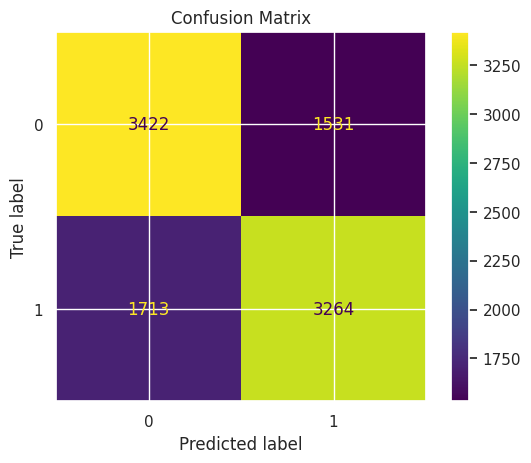

In [ ]:
y_pred_mdl1 = mdl1_hyper.predict(X_test)
# Evaluation metric

# Accuracy merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data
acc_mdl1 = accuracy_score(y_test, y_pred_mdl1)
print("Accuracy Score:", acc_mdl1)

# Precission merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf
precision_mdl1 = precision_score(y_test, y_pred_mdl1)
print("Precision Score :", precision_mdl1)

# Recall (Sensitifitas) merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif
recall_mdl1 = recall_score(y_test, y_pred_mdl1)
print("Recall Score :", recall_mdl1)

# F1 Score merupakan perbandingan rata-rata presisi dan recall yang dibobotkan
f1_mdl1 = f1_score(y_test, y_pred_mdl1)
print("F1 Score:", f1_mdl1,"\n")

# Confussion Matrix
ConfusionMatrixDisplay.from_estimator(model1_hyper, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

### CatBoost

**Hyperparameter**

In [ ]:
# Modelling, cross validation, bootstrapping untuk Model 2 (Cat Boost Classifier)
model2 = CatBoostClassifier(silent=True)

params = {'bootstrap_type': ['Bayesian', 'Bernoulli'], 'loss_function': ['Logloss', 'CrossEntropy']}

grid_search_cv = GridSearchCV(model2, params, scoring='accuracy')
grid_search_cv.fit(X, y)

parameter_terbaik = grid_search_cv.best_params_
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'bootstrap_type': 'Bernoulli', 'loss_function': 'CrossEntropy'}
0.6891641490433031


**Modelling**

In [ ]:
# Modelling dengan menggunakan DecisionTree
model2_hyper = CatBoostClassifier(bootstrap_type= 'Bernoulli', loss_function= 'CrossEntropy')
mdl2_hyper = model2_hyper.fit(X_train, y_train)

0:	learn: 0.6890293	total: 26.3ms	remaining: 26.3s
1:	learn: 0.6852471	total: 46ms	remaining: 23s
2:	learn: 0.6820493	total: 77.2ms	remaining: 25.7s
3:	learn: 0.6788625	total: 108ms	remaining: 26.8s
4:	learn: 0.6755178	total: 128ms	remaining: 25.5s
5:	learn: 0.6726683	total: 163ms	remaining: 27.1s
6:	learn: 0.6699578	total: 213ms	remaining: 30.2s
7:	learn: 0.6674112	total: 263ms	remaining: 32.6s
8:	learn: 0.6650349	total: 335ms	remaining: 36.9s
9:	learn: 0.6626618	total: 425ms	remaining: 42.1s
10:	learn: 0.6606379	total: 496ms	remaining: 44.6s
11:	learn: 0.6584035	total: 571ms	remaining: 47.1s
12:	learn: 0.6564689	total: 644ms	remaining: 48.9s
13:	learn: 0.6544466	total: 694ms	remaining: 48.9s
14:	learn: 0.6526501	total: 767ms	remaining: 50.4s
15:	learn: 0.6508666	total: 830ms	remaining: 51.1s
16:	learn: 0.6491415	total: 925ms	remaining: 53.5s
17:	learn: 0.6475475	total: 1.01s	remaining: 55s
18:	learn: 0.6459609	total: 1.1s	remaining: 56.9s
19:	learn: 0.6445469	total: 1.2s	remaining: 5

Accuracy Score: 0.6833836858006043
Precision Score : 0.6831168831168831
Recall Score : 0.6869600160739401
F1 Score: 0.6850330595071128 



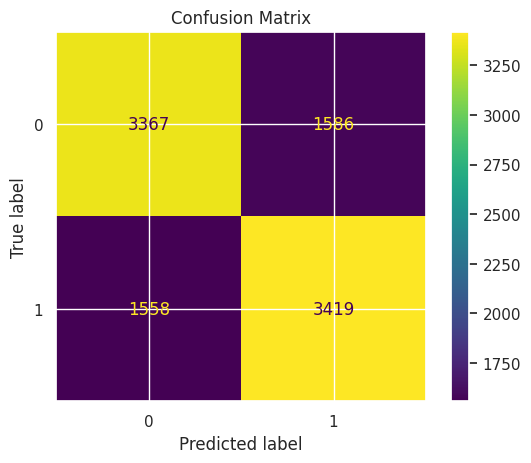

In [ ]:
y_pred_mdl2 = mdl2_hyper.predict(X_test)
# Evaluation metric

# Accuracy merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data
acc_mdl2 = accuracy_score(y_test, y_pred_mdl2)
print("Accuracy Score:", acc_mdl2)

# Precission merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf
precision_mdl2 = precision_score(y_test, y_pred_mdl2)
print("Precision Score :", precision_mdl2)

# Recall (Sensitifitas) merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif
recall_mdl2 = recall_score(y_test, y_pred_mdl2)
print("Recall Score :", recall_mdl2)

# F1 Score merupakan perbandingan rata-rata presisi dan recall yang dibobotkan
f1_mdl2 = f1_score(y_test, y_pred_mdl2)
print("F1 Score:", f1_mdl2,"\n")

# Confussion Matrix
ConfusionMatrixDisplay.from_estimator(model2_hyper, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

### XGBoost

**Hyperparameter**

In [ ]:
# Create an XGBoost classifier
model3 = xgb.XGBClassifier()

params = {'learning_rate': [0.1, 0.01], 'max_depth': [3, 7]}

grid_search_cv = GridSearchCV(model3, params, scoring='accuracy')
grid_search_cv.fit(X, y)

parameter_terbaik = grid_search_cv.best_params_
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'learning_rate': 0.1, 'max_depth': 3}
0.6816515609264854


**Modelling**

In [ ]:
# Modelling dengan menggunakan DecisionTree
model3_hyper = xgb.XGBClassifier(learning_rate= 0.1, max_depth= 3)
mdl3_hkyper = model3_hyper.fit(X_train, y_train)

Accuracy Score: 0.6806646525679758
Precision Score : 0.6833130328867235
Recall Score : 0.6763110307414105
F1 Score: 0.679794001817631 



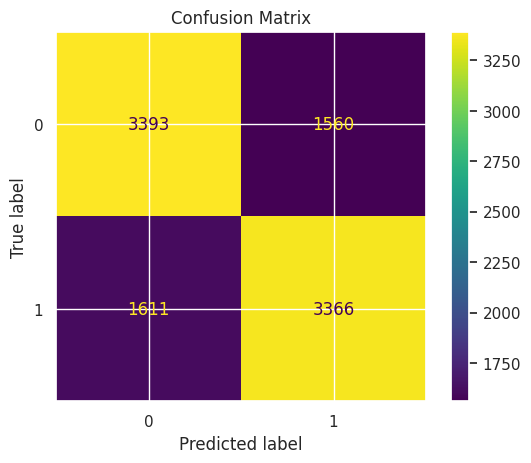

In [ ]:
# Evaluation metric
y_pred_mdl3 = mdl3_hyper.predict(X_test)

# Accuracy merupakan rasio prediksi Benar (positif dan negatif) dengan keseluruhan data
acc_mdl3 = accuracy_score(y_test, y_pred_mdl3)
print("Accuracy Score:", acc_mdl3)

# Precission merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf
precision_mdl3 = precision_score(y_test, y_pred_mdl3)
print("Precision Score :", precision_mdl3)

# Recall (Sensitifitas) merupakan rasio prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif
recall_mdl3 = recall_score(y_test, y_pred_mdl3)
print("Recall Score :", recall_mdl3)

# F1 Score merupakan perbandingan rata-rata presisi dan recall yang dibobotkan
f1_mdl3 = f1_score(y_test, y_pred_mdl3)
print("F1 Score:", f1_mdl3,"\n")

# Confussion Matrix
ConfusionMatrixDisplay.from_estimator(model3_hyper, X_test, y_test)
plt.title("Confusion Matrix")
plt.show()

## ROC-AUC

Kurva ROC (Receiver Operating Characteristic) dan AUC (Area Under the Curve) adalah alat evaluasi yang digunakan dalam pemodelan klasifikasi untuk mengukur kinerja dari seuah model.

Kurva ROC adalah grafik yang menggambarkan hubungan antara tingkat True Positive Rate (TPR) dan False Positive Rate (FPR). TPR mengukur sejauh mana model dapat mengklasifikasikan sampel positif dengan benar, sedangkan FPR mengukur sejauh mana model mengklasifikasikan sampel negatif secara keliru sebagai positif.

AUC adalah metrik numerik yang menghitung luas di bawah kurva ROC. AUC memberikan ukuran singkat tentang sejauh mana model mampu membedakan antara kelas positif dan negatif.

In [ ]:
# Memprediksi probabilitas dari kelas positif
y_pred_mdl1 = model1_hyper.predict_proba(X_test)[:, 1]
y_pred_mdl2 = model2_hyper.predict_proba(X_test)[:, 1]
y_pred_mdl3 = model3_hyper.predict_proba(X_test)[:, 1]

# Menghitug skor AUC-ROC
auc_mdl1 = roc_auc_score(y_test, y_pred_mdl1)
auc_mdl2 = roc_auc_score(y_test, y_pred_mdl2)
auc_mdl3 = roc_auc_score(y_test, y_pred_mdl3)

print(f"AUC-ROC for Random Forest : {auc_mdl1}")
print(f"AUC-ROC for CatBoost : {auc_mdl2}")
print(f"AUC-ROC for XGBoost : {auc_mdl3}")

AUC-ROC for Random Forest : 0.734013490118344
AUC-ROC for CatBoost : 0.7490197691533285
AUC-ROC for XGBoost : 0.7455143853529183


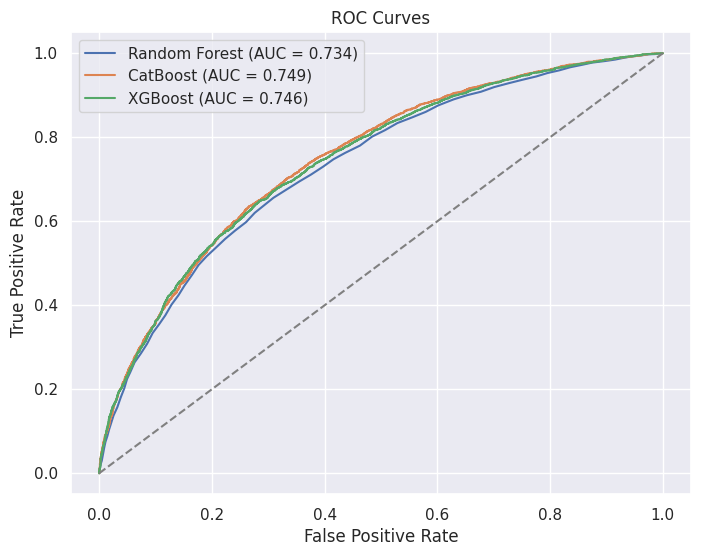

In [ ]:
# Menampilkan kurva ROC
def plot_roc_curves(y_test, y_pred_mdl1, y_pred_mdl2, y_pred_mdl3):
    plt.figure(figsize=(8, 6))

    # Calculate ROC curves for each model
    fpr_mdl1, tpr_mdl1, _ = roc_curve(y_test, y_pred_mdl1)
    fpr_mdl2, tpr_mdl2, _ = roc_curve(y_test, y_pred_mdl2)
    fpr_mdl3, tpr_mdl3, _ = roc_curve(y_test, y_pred_mdl3)

    # Plot ROC curves
    plt.plot(fpr_mdl1, tpr_mdl1, label=f'Random Forest (AUC = {auc_mdl1:.3f})')
    plt.plot(fpr_mdl2, tpr_mdl2, label=f'CatBoost (AUC = {auc_mdl2:.3f})')
    plt.plot(fpr_mdl3, tpr_mdl3, label=f'XGBoost (AUC = {auc_mdl3:.3f})')

    # Plot random classifier
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

    # Format the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend()
    plt.show()

plot_roc_curves(y_test, y_pred_mdl1, y_pred_mdl2, y_pred_mdl3)

Kurva ROC dan AUC memberikan informasi tentang kinerja model klasifikasi secara keseluruhan untuk membandingkan model yang berbeda yaitu antara model Hyperparameter Tuning Random Forest, Hyperparameter CatBoost, dan Hyperparameter XGBoost untuk menghasilkan klasifikasi yang optimal.

Dengan melihat kurva ROC dan membandingkanya dengan Area Under the Curve (AUC), akan dapat mengukur dan membandingkan kinerja relatif antara model-model yang digunakan. Yang akan membantu dalam memilih model terbaik untuk masalah klasifikasi yang spesifik.

## Comparation

In [ ]:
# Menampilkan AUC score, akurasi, dan recall
comparation = pd.DataFrame({
    'Nama Model': ['Random Forest', 'Cat Boost', 'XGBoost'],
    'AUC Score'    : [auc_mdl1, auc_mdl2, auc_mdl3],
    'Accuracy'    : [acc_mdl1, acc_mdl2, acc_mdl3],
    'Recall'    : [recall_mdl1, recall_mdl2, recall_mdl3]
    }, columns = ['Nama Model', 'AUC Score', 'Accuracy', 'Recall'])

comparation.sort_values(by='AUC Score', ascending=False)

Nama Model  AUC Score  Accuracy    Recall
1      Cat Boost   0.749020  0.683384  0.686960
2        XGBoost   0.745514  0.680665  0.676311
0  Random Forest   0.730091  0.672910  0.659634

Catboost merupakan model terbaik dengan akurasi 0.683384, recall 0.686960, dan AUC Score 0.749020.

## Feature Important

**CatBoost**

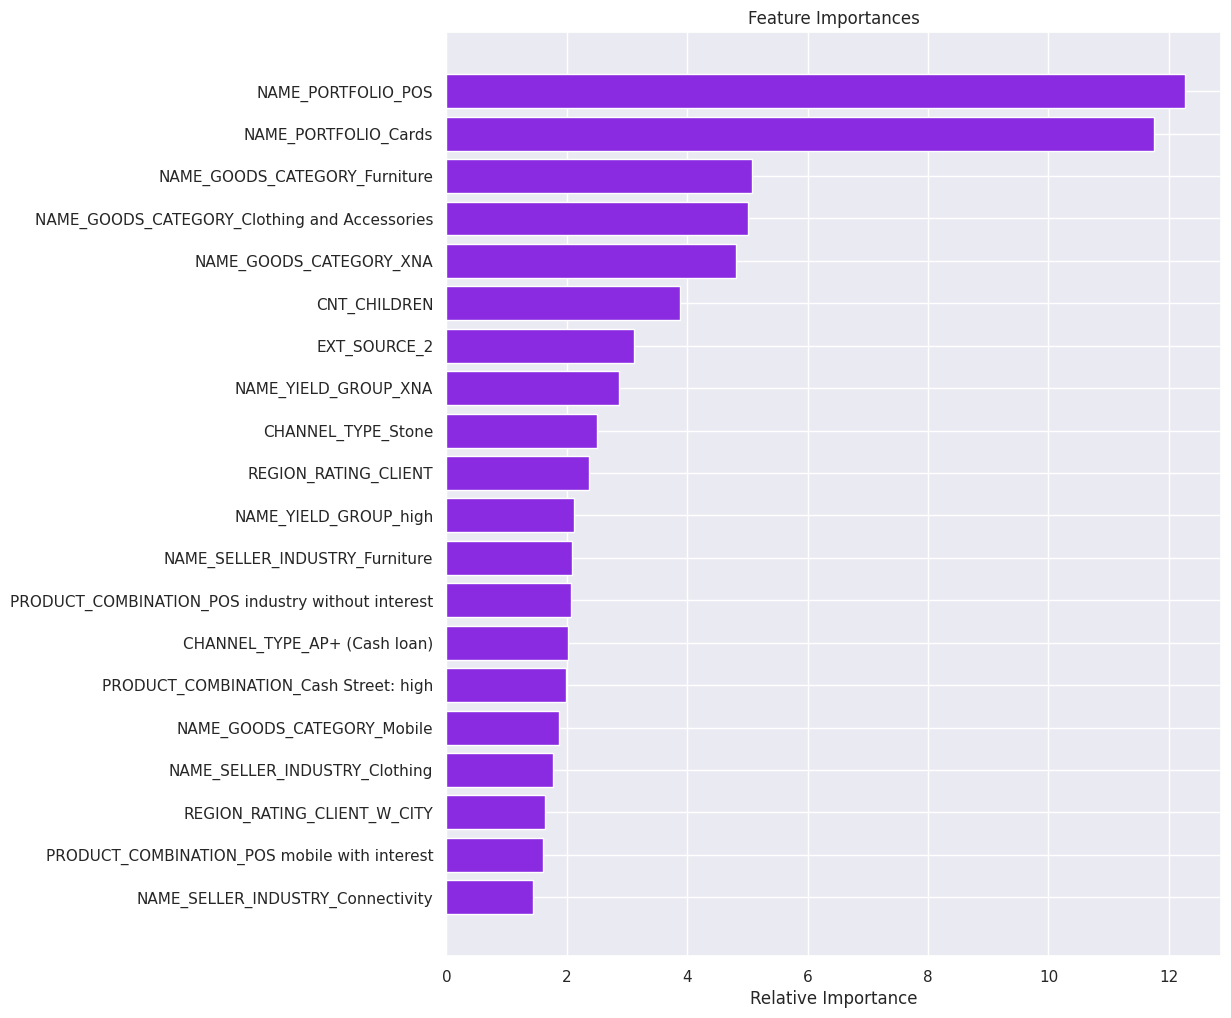

In [ ]:
#Feature Importances for our Features

features = X.columns
importances = model2_hyper.feature_importances_
indices = (np.argsort(importances))[-20:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#8A2BE2', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Menampilkan score dari 100 fitur
for i,v in enumerate(importances):
  print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 3.87781
Feature: 1, Score: 0.37678
Feature: 2, Score: 0.62304
Feature: 3, Score: 0.95311
Feature: 4, Score: 0.05228
Feature: 5, Score: 0.11578
Feature: 6, Score: 2.36743
Feature: 7, Score: 1.63825
Feature: 8, Score: 3.12009
Feature: 9, Score: 0.33986
Feature: 10, Score: 0.50900
Feature: 11, Score: 1.33642
Feature: 12, Score: 1.28350
Feature: 13, Score: 0.62803
Feature: 14, Score: 0.70782
Feature: 15, Score: 0.09249
Feature: 16, Score: 0.56586
Feature: 17, Score: 0.88830
Feature: 18, Score: 0.09652
Feature: 19, Score: 0.77506
Feature: 20, Score: 0.30997
Feature: 21, Score: 0.04681
Feature: 22, Score: 0.27413
Feature: 23, Score: 0.18483
Feature: 24, Score: 0.09080
Feature: 25, Score: 0.32633
Feature: 26, Score: 0.74248
Feature: 27, Score: 0.49873
Feature: 28, Score: 0.12582
Feature: 29, Score: 0.30375
Feature: 30, Score: 0.22057
Feature: 31, Score: 0.12699
Feature: 32, Score: 0.01444
Feature: 33, Score: 0.02627
Feature: 34, Score: 0.22311
Feature: 35, Score: 0.12172
Fe

Fitur yang paling mempengaruhi adalah :

- NAME_PORTOLIO_POS dengan score 12.26015
- NAME_PORTOLIO_Card  dengan score 11.75347
- NAME_GOOD_CATEGORY_Furniture dengan score 5. 07520